# Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import pandas as pd

D:\Programmes\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programmes\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programmes\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programmes\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('D:\\documents\\PRO\\Etudes\\MSc_U-Bordeaux\\StageInriaFlowers\\TestbedProject'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import gym
import teachDRL.gym_flowers_v2

# from teachDRL.gym_flowers_v2.envs.PCGAgents.CPPN.TanHSoftplusMixCPPN import TanHSoftplusMixCPPNanHSoftplusMixCPPN

# Utils

In [3]:
H_DIM = 200
W_DIM = 200

In [4]:
random_state = np.random.RandomState(43)

In [5]:
def clip_ceiling_values(row, clip_offset):
    if row["ceiling"] >= row["ground"] + clip_offset:
        return row["ceiling"]
    else:
        return row["ground"] + clip_offset

def plot_results(results, offset, clip, clip_offset):
    results_df = pd.DataFrame(results, columns=["ground", "ceiling"])
    results_df["ceiling"] = results_df["ceiling"].apply(lambda val: val + offset)
    if clip:
        results_df["ceiling"] = results_df.apply(lambda row: clip_ceiling_values(row, clip_offset), axis=1)
    sns.lineplot(data=results_df)
    plt.ylim(-H_DIM, H_DIM*3)
    plt.show()

In [6]:
def plot_env(img):
    fig, ax = plt.subplots(figsize=(18, 12))
    ax.imshow(img)
    plt.axis('off')
    plt.show()

In [31]:
def get_sampled_input(input_generator, sampler_args):
    sampled_input = []
    for args in sampler_args:
        values = input_generator(**args)
        if len(values) == 1:
            values = values[0]
        sampled_input.append(values)
    return sampled_input

In [38]:
def perform_experiment(env, input_generator, sampler_args, 
                       nb_of_samples = 5, plot_offset=200, clip=False, clip_offset=80):
    for i in range(nb_of_samples):
        sampled_input = get_sampled_input(input_generator, sampler_args)
        print("Sample nb {0}".format(i))
        print("Sampled input :")
        print(sampled_input)
        
        env.set_environment(*sampled_input)
        env.reset()

        plot_env(env.render(mode='rgb_array'))
        
#         plot_results(env.terrain_CPPN.generate(sampled_input), plot_offset, clip, clip_offset)

# Experiments

In [8]:
env = gym.make('parametric-continuous-parkour-v0', 
               CPPN_weights_path="weights/same_ground_ceiling_cppn/", 
               agent_body_type='classic_bipedal')
env._SET_VIEWPORT(3000, 1500)

INFO:tensorflow:Restoring parameters from weights/same_ground_ceiling_cppn/


D:\Programmes\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### Initial function

Sample nb 0
Sampled input :
[[0, 0, 0], 0.8, 0.2, 5.5, 5.0]


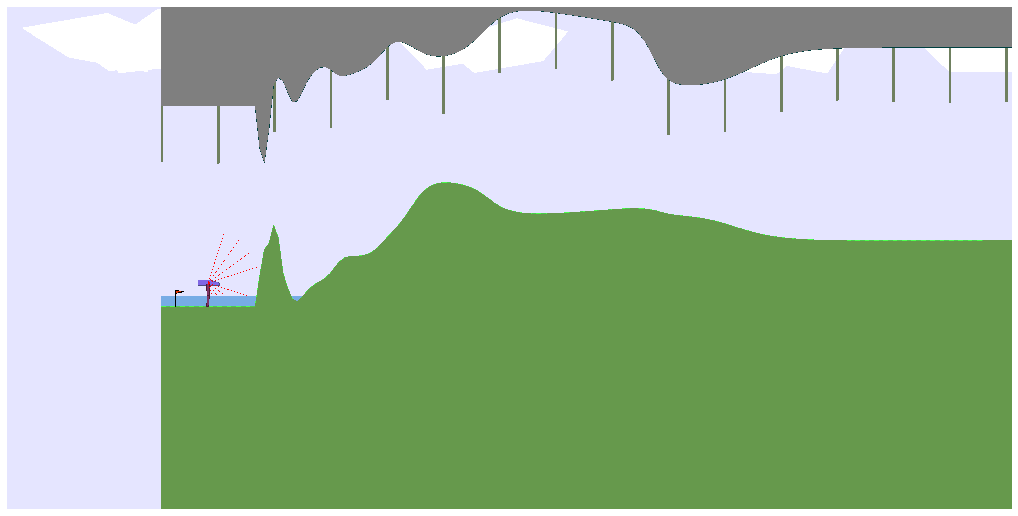

ValueError: operands could not be broadcast together with shapes (200,3) (5,) 

In [37]:
perform_experiment(env, lambda vals: vals, 
                   [{"vals": [0, 0, 0]}, 
                    {"vals": [0.8]},
                    {"vals": [0.2]},
                    {"vals": [5.5]},
                    {"vals": [5.0]}],
                   nb_of_samples = 1)

Sample nb 0
Sampled input :
[0, 0, 0]
Sampled water level :
0.3


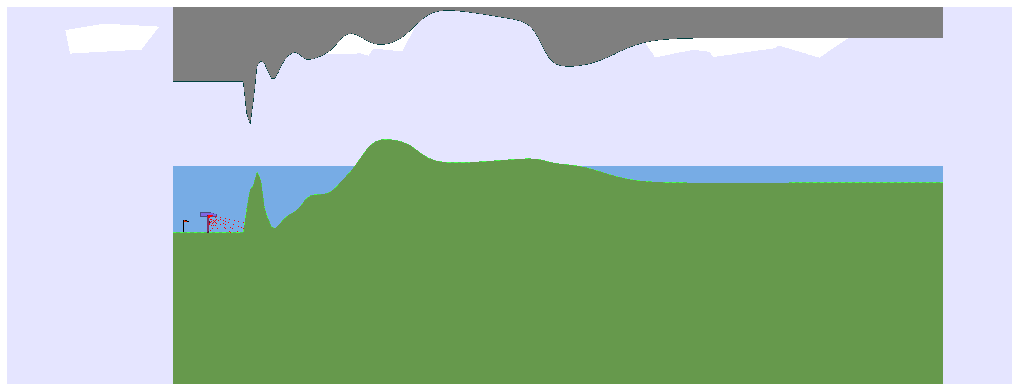

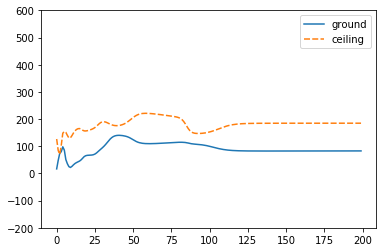

In [23]:
perform_experiment(env, lambda vals: vals, 
                   {"vals": [0, 0, 0]}, {"vals": [0.3]},
                   nb_of_samples = 1)

### Input space explo

In [9]:
widget_dim1 = widgets.FloatSlider(min=-1.0, max=1.0, step=0.01)
widget_dim2 = widgets.FloatSlider(min=-1.0, max=1.0, step=0.01)
widget_dim3 = widgets.FloatSlider(min=-1.0, max=1.0, step=0.01)
widget_dim4 = widgets.FloatSlider(min=0, max=1.0, step=0.01)

def printer(dim1, dim2, dim3, water_dim):
    perform_experiment(env, lambda vals: vals, 
                       {"vals": [dim1, dim2, dim3]}, {"vals": [water_dim]},
                       nb_of_samples = 1)
widgets.interact(printer, dim1=widget_dim1, dim2=widget_dim2, dim3=widget_dim3, water_dim=widget_dim4);

interactive(children=(FloatSlider(value=0.0, description='dim1', max=1.0, min=-1.0, step=0.01), FloatSlider(va…

### Sampling

In [10]:
def input_sampler(size = 3, min = -1.0, max = 1.0):
    return random_state.uniform(min, max, size=(size)).astype(np.float)
#     return np.clip(random_state.normal(mean, std, size=(size)).astype(np.float32), -1.0, 1.0)

Sample nb 0
Sampled input :
[array([-0.24288932, -0.84488439, -0.02618765]), 0.7702290859104888, 0.2, 3.350679672316186, 6.0168018642928125]


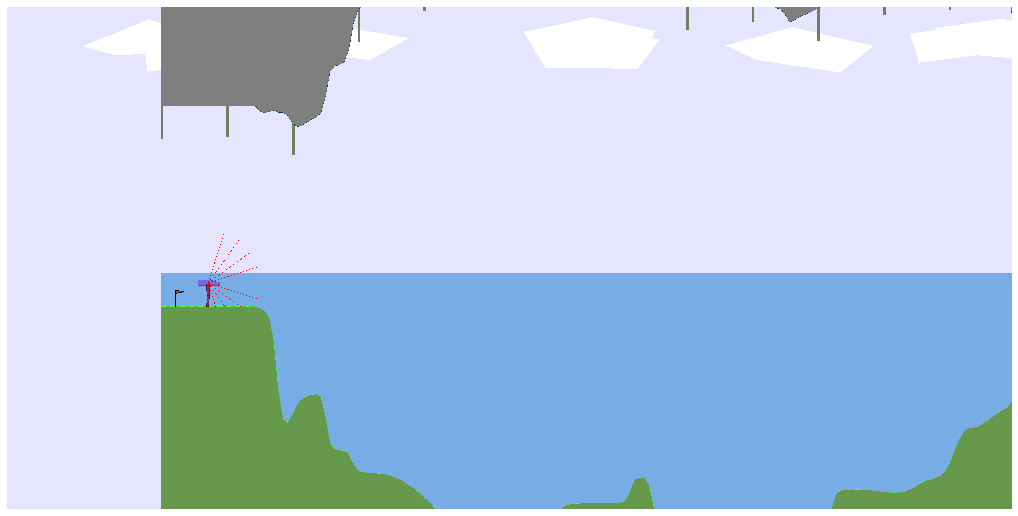

Sample nb 1
Sampled input :
[array([-0.33629653, -0.57100436, -0.81068621]), 0.8256895793004575, 0.2, 7.133925361112066, 5.05192453846389]


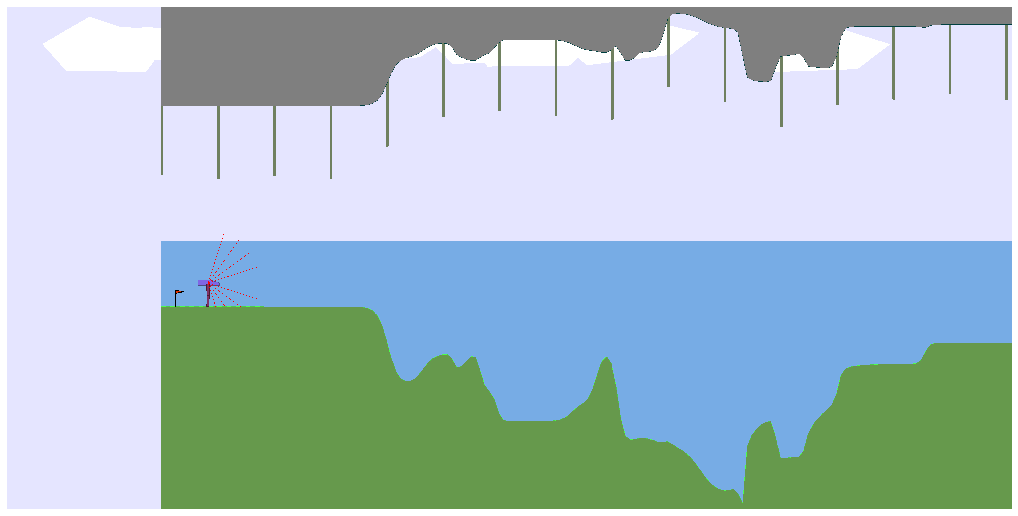

Sample nb 2
Sampled input :
[array([-0.99552085,  0.8488355 ,  0.3478665 ]), 0.8492221870159312, 0.2, 3.7956874827699068, 6.904566105556793]


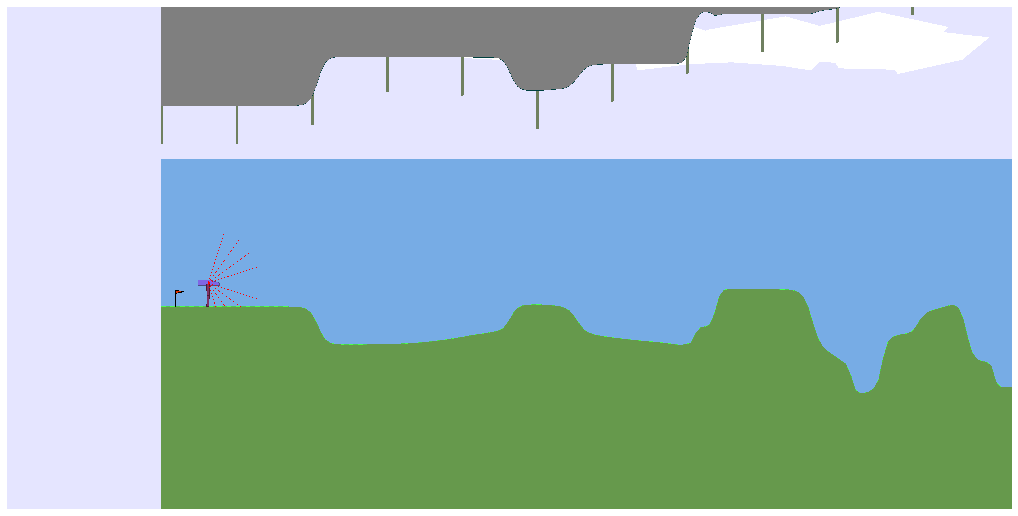

Sample nb 3
Sampled input :
[array([-0.66785965, -0.26142939,  0.86911997]), 0.7122461704337721, 0.2, 7.436452958302517, 5.638810120571275]


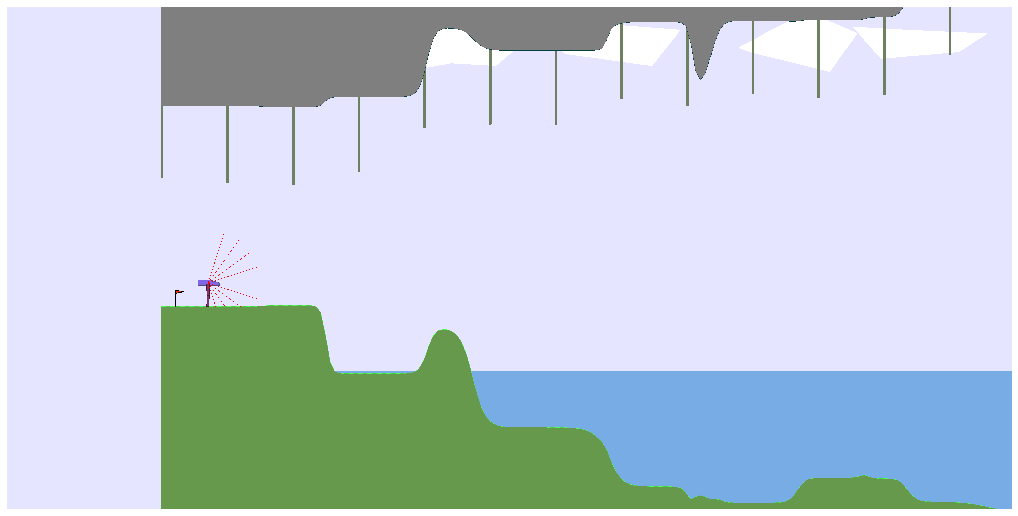

Sample nb 4
Sampled input :
[array([ 0.92531588,  0.9947452 , -0.02796895]), 0.7481937382651019, 0.2, 7.9935926815444285, 5.890426200264487]


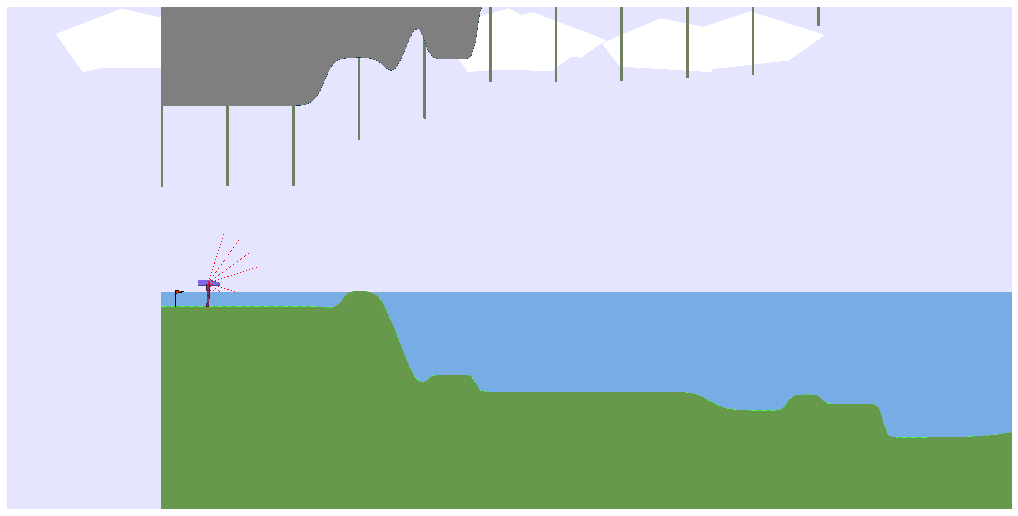

Sample nb 5
Sampled input :
[array([-0.91050861, -0.10587775,  0.4203496 ]), 0.7939106991445063, 0.2, 7.8595942992334615, 6.323942481771672]


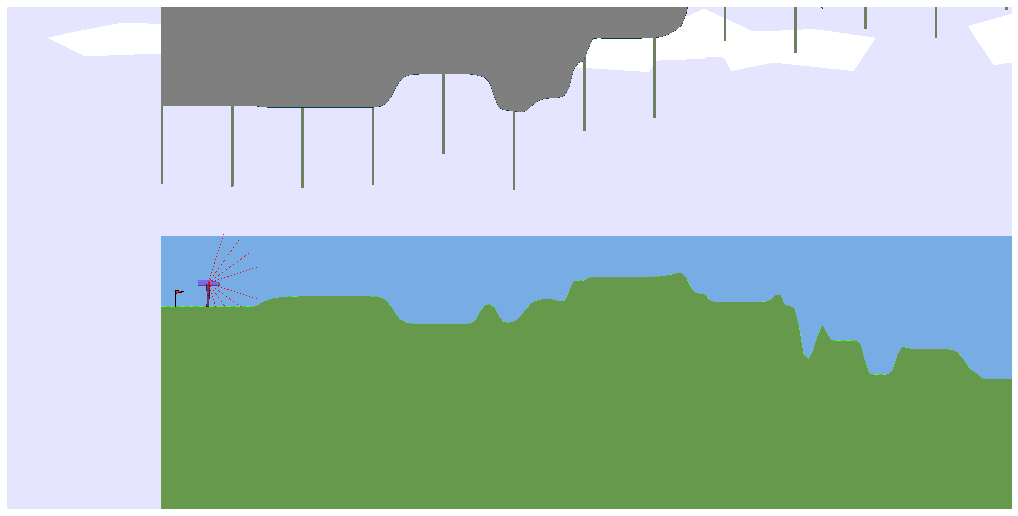

Sample nb 6
Sampled input :
[array([-0.8170996 ,  0.17946202, -0.57683799]), 0.8192613452499344, 0.2, 5.512182388215782, 6.407078292263184]


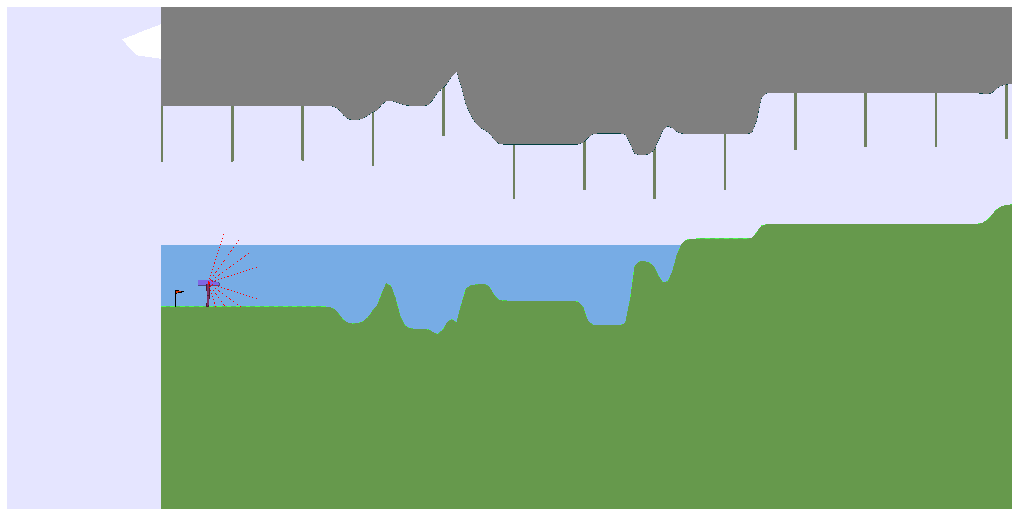

Sample nb 7
Sampled input :
[array([-0.65674465,  0.20211888, -0.67993078]), 0.8239867602018387, 0.2, 5.7334859330829655, 6.6614212092846765]


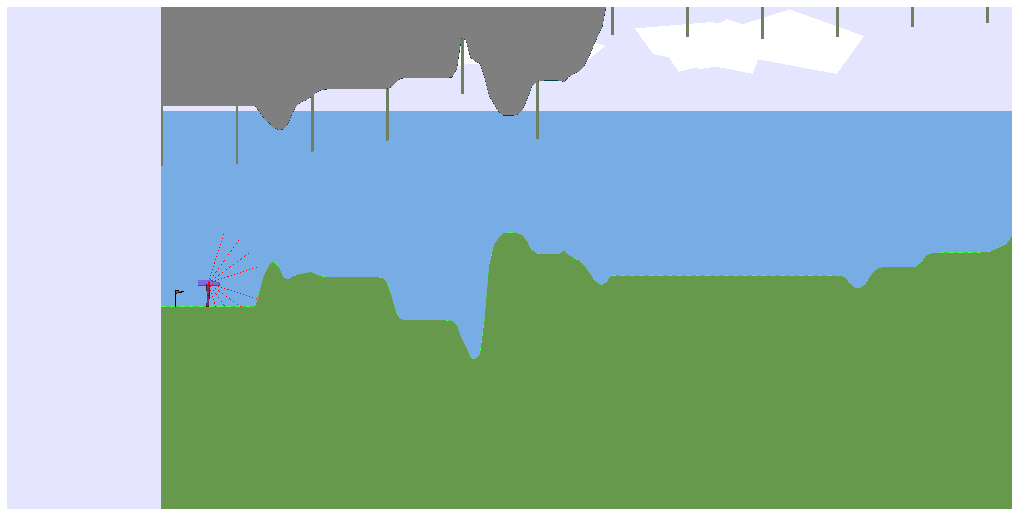

Sample nb 8
Sampled input :
[array([ 0.93813412, -0.34493004, -0.82325236]), 0.8445233685669371, 0.2, 7.595385435279976, 6.700971380106664]


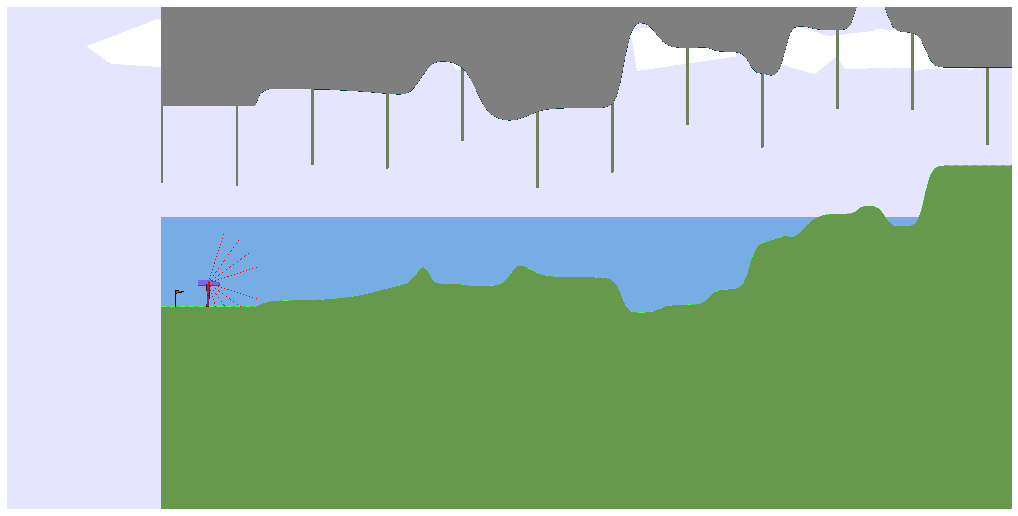

Sample nb 9
Sampled input :
[array([-0.01261451, -0.06276688,  0.11790561]), 0.7160353307320702, 0.2, 6.075736037442861, 6.9840916288182795]


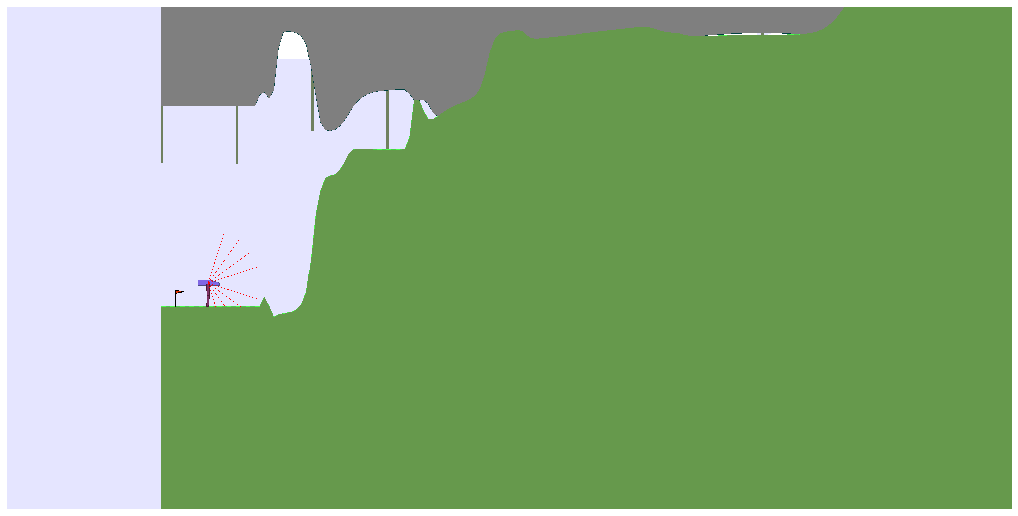

Sample nb 10
Sampled input :
[array([ 0.38515279, -0.2905303 , -0.65307328]), 0.7069252086562856, 0.2, 4.778972131562462, 5.958774420183589]


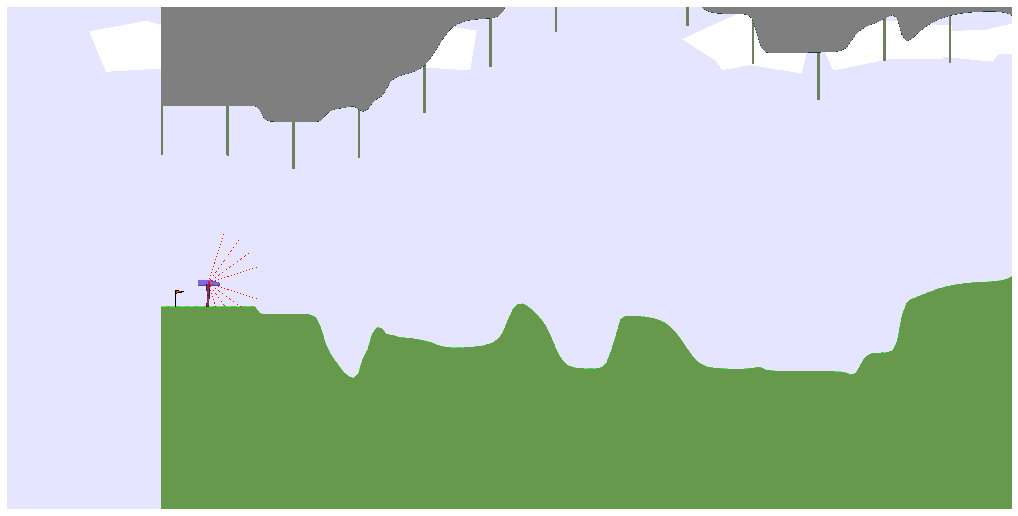

Sample nb 11
Sampled input :
[array([ 0.31795625, -0.82811558, -0.40710878]), 0.730513470373252, 0.2, 5.885781847145541, 6.363604272830386]


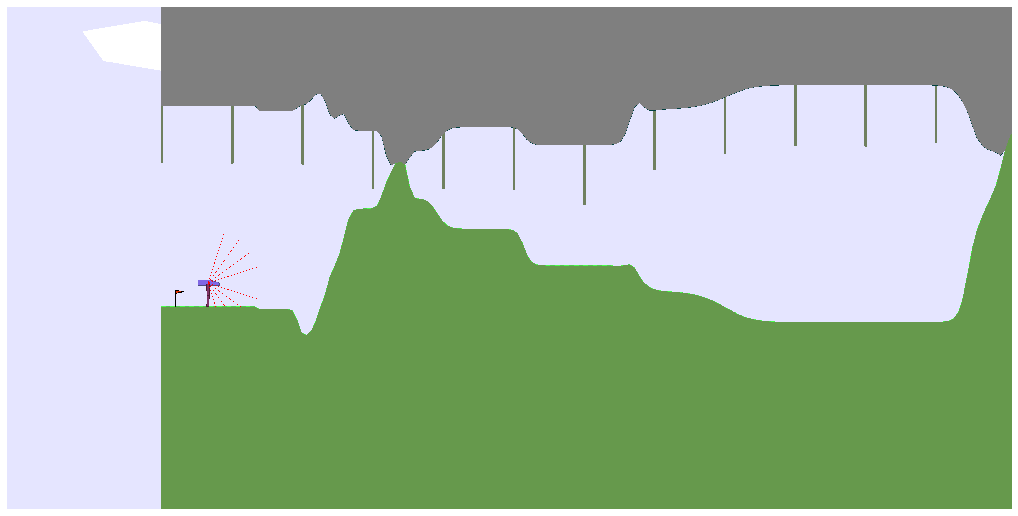

Sample nb 12
Sampled input :
[array([-0.56614006, -0.9554605 , -0.92205165]), 0.7685070684440585, 0.2, 5.695785929417539, 6.050986566334036]


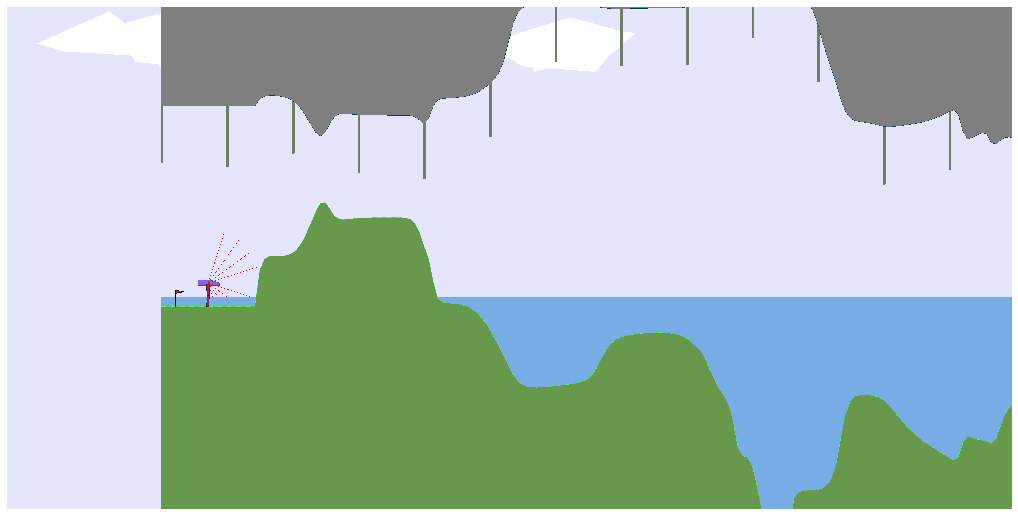

Sample nb 13
Sampled input :
[array([0.08845255, 0.03283796, 0.77270472]), 0.7615291597849759, 0.2, 7.161085021814809, 6.188361983279859]


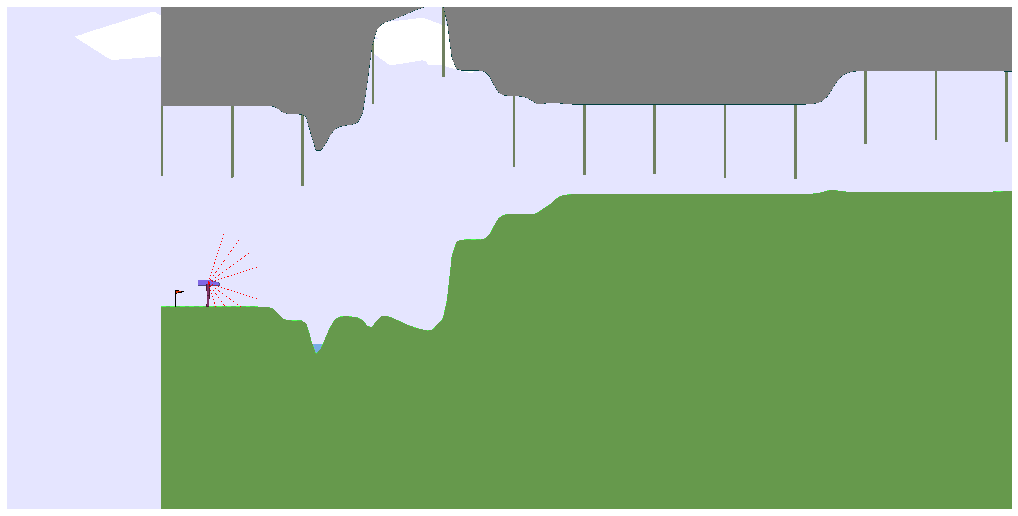

Sample nb 14
Sampled input :
[array([-0.60316664,  0.55060856, -0.98913739]), 0.7079119515300129, 0.2, 4.259867244240999, 5.528343874768157]


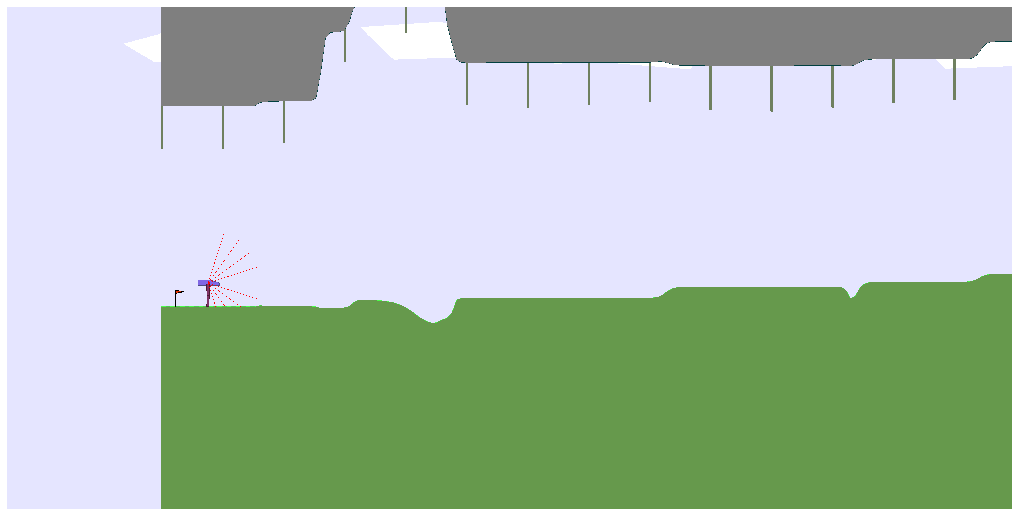

Sample nb 15
Sampled input :
[array([-0.91197349,  0.79364173,  0.11489707]), 0.7035403289776556, 0.2, 6.51505390132743, 6.429511139849183]


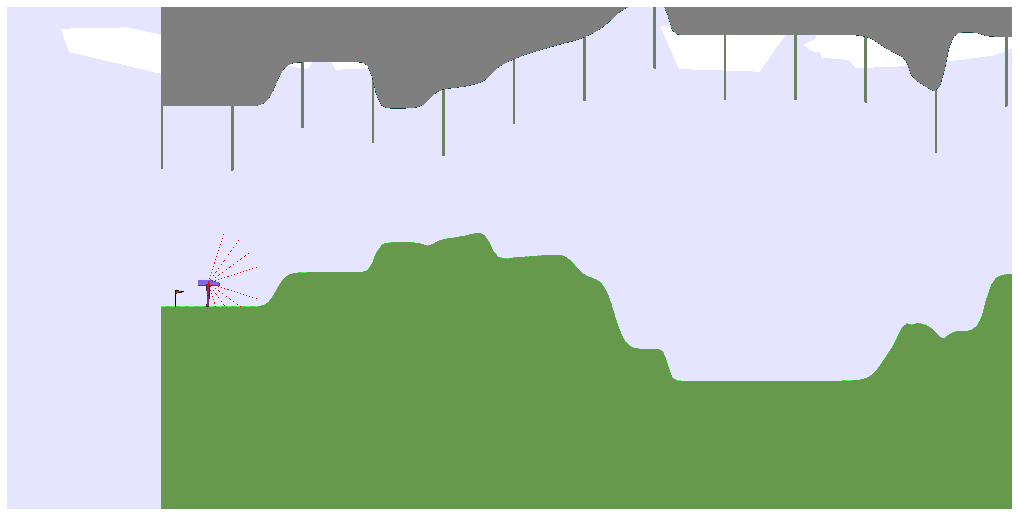

Sample nb 16
Sampled input :
[array([-0.10793569, -0.1498617 , -0.44661404]), 0.8416629313657458, 0.2, 7.9594911624401865, 6.815815369008606]


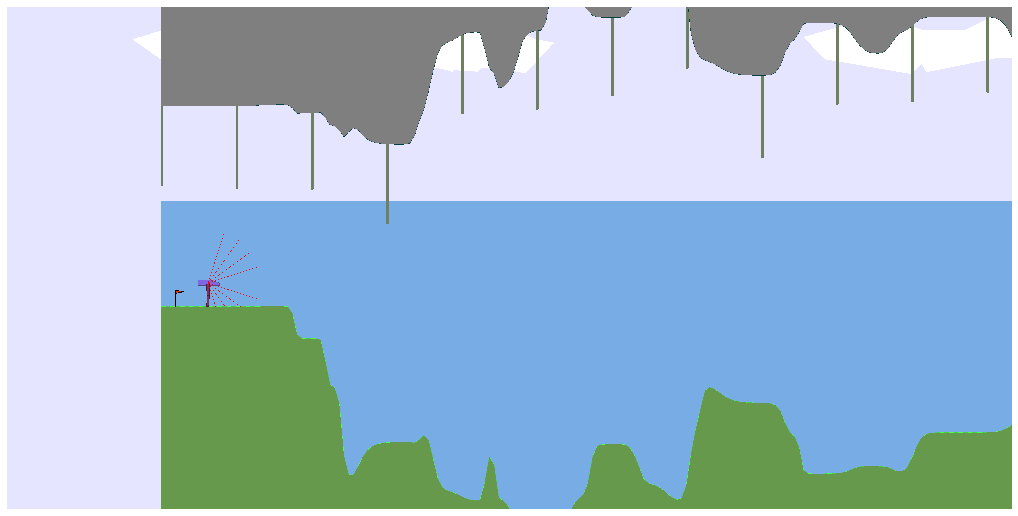

Sample nb 17
Sampled input :
[array([-0.18514293, -0.12647123,  0.24713076]), 0.7486431798024702, 0.2, 3.8220858023603106, 6.112603197673476]


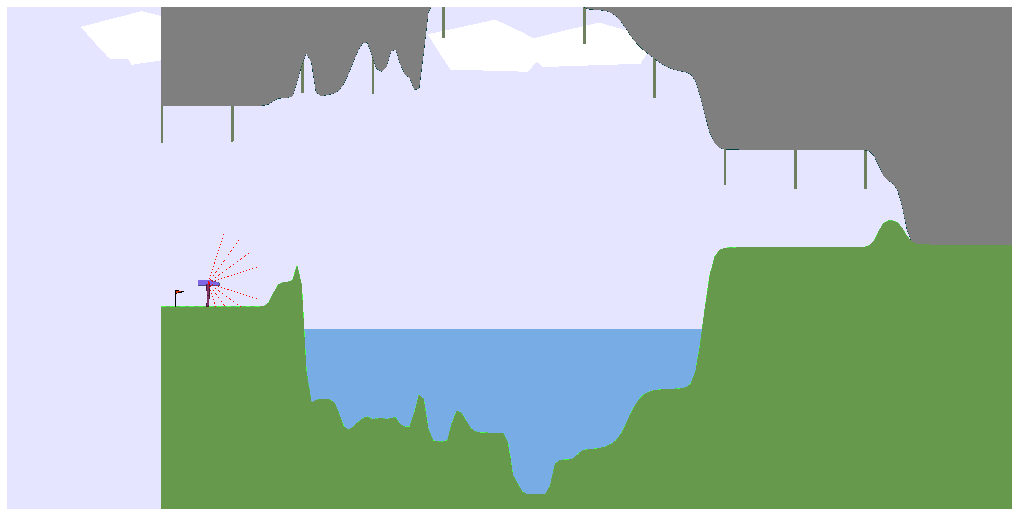

Sample nb 18
Sampled input :
[array([0.07408981, 0.94361939, 0.06321513]), 0.8001206477042901, 0.2, 4.964866597459126, 5.140457597890989]


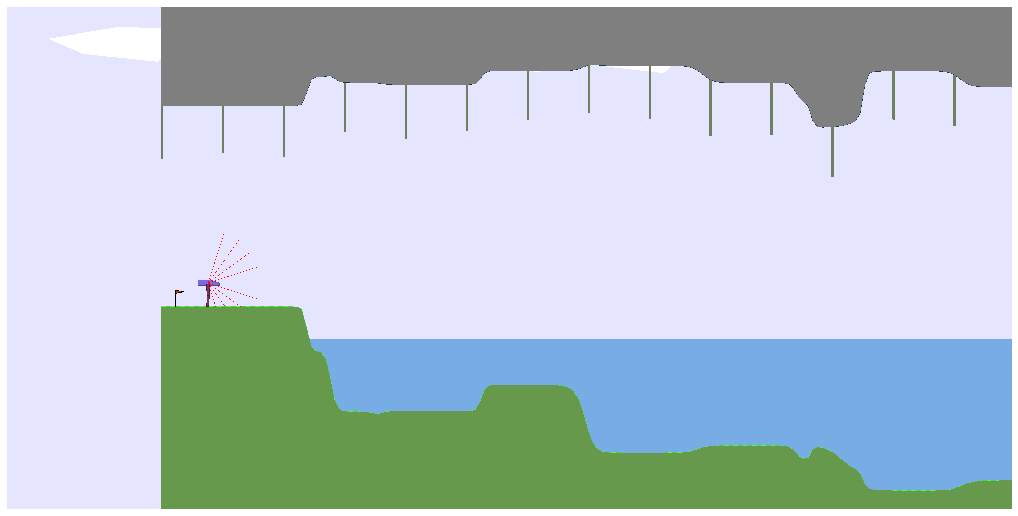

Sample nb 19
Sampled input :
[array([-0.11230265, -0.60237516, -0.87480856]), 0.8189971745137683, 0.2, 7.465801872464947, 5.365070952842402]


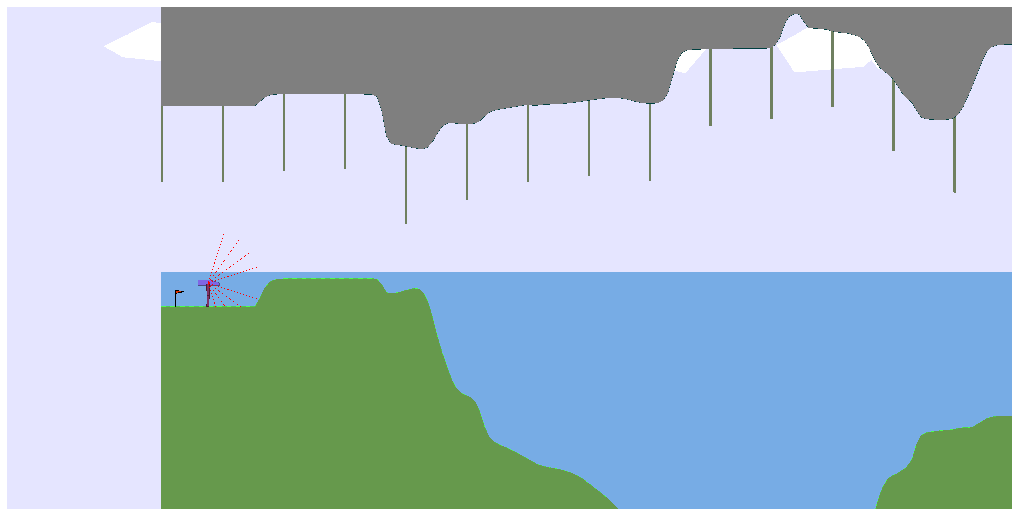

In [40]:
perform_experiment(env, input_sampler, 
                   [{"size": 3, "min": -1.0, "max": 1.0},
                   {"size": 1, "min": 0.7, "max": 0.85},
                   {"size": 1, "min": 0.2, "max": 0.2},
                   {"size": 1, "min": 3.0, "max": 8.0},
                   {"size": 1, "min": 5.0, "max": 7.0}],
                    nb_of_samples = 20)

Sample nb 0
Sampled input :
[-0.22698909  0.92181331  0.02667819]
Sampled water level :
0.0


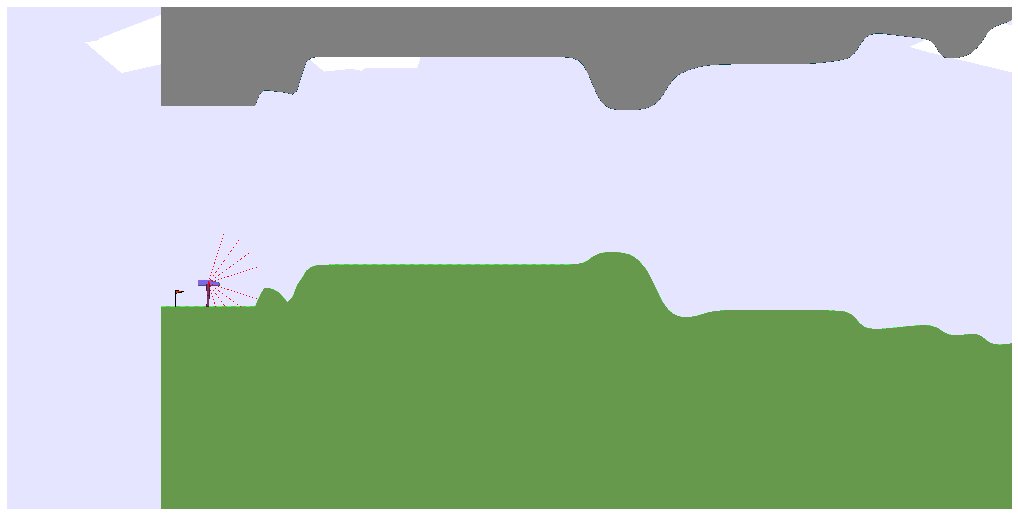

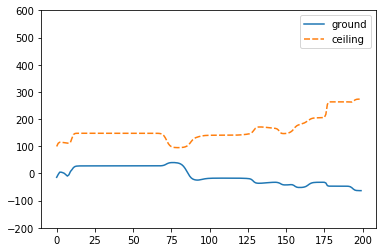

Sample nb 1
Sampled input :
[-0.18457219  0.9718275   0.13321804]
Sampled water level :
0.0


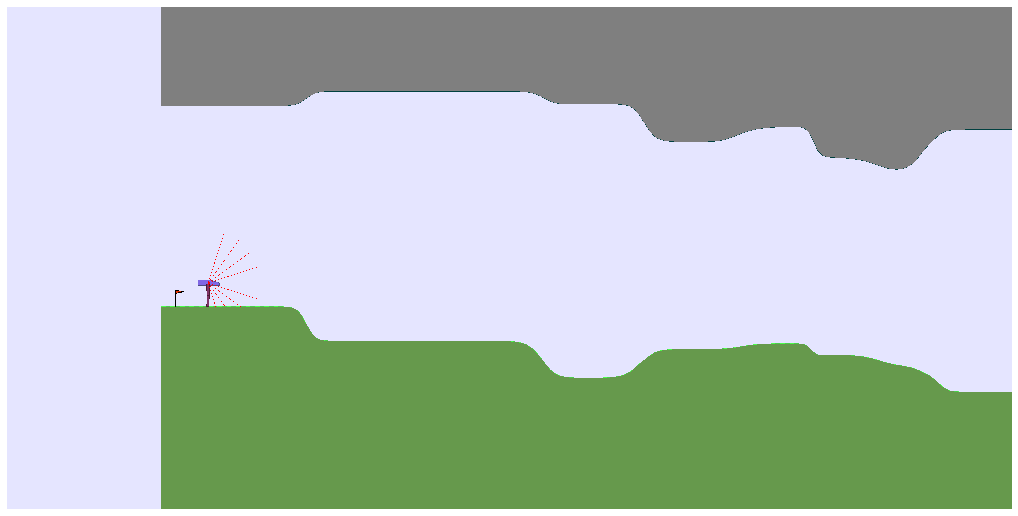

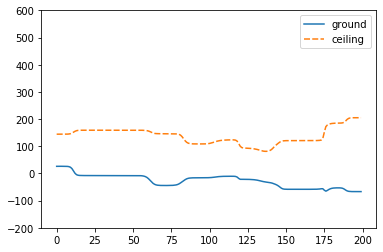

Sample nb 2
Sampled input :
[-0.24419724  0.94674966  0.07899   ]
Sampled water level :
0.0


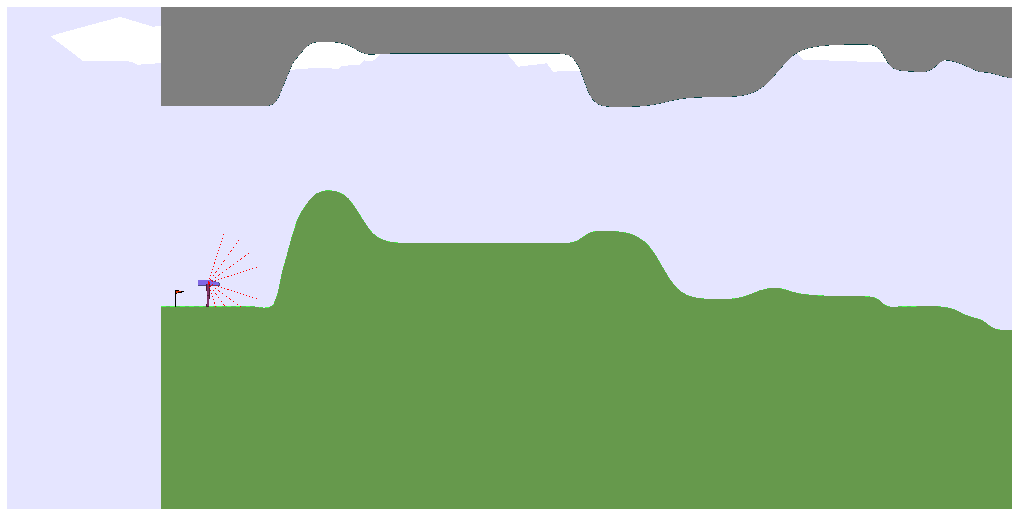

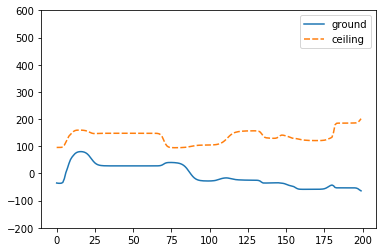

Sample nb 3
Sampled input :
[-0.19911577  0.81137699  0.17332973]
Sampled water level :
0.0


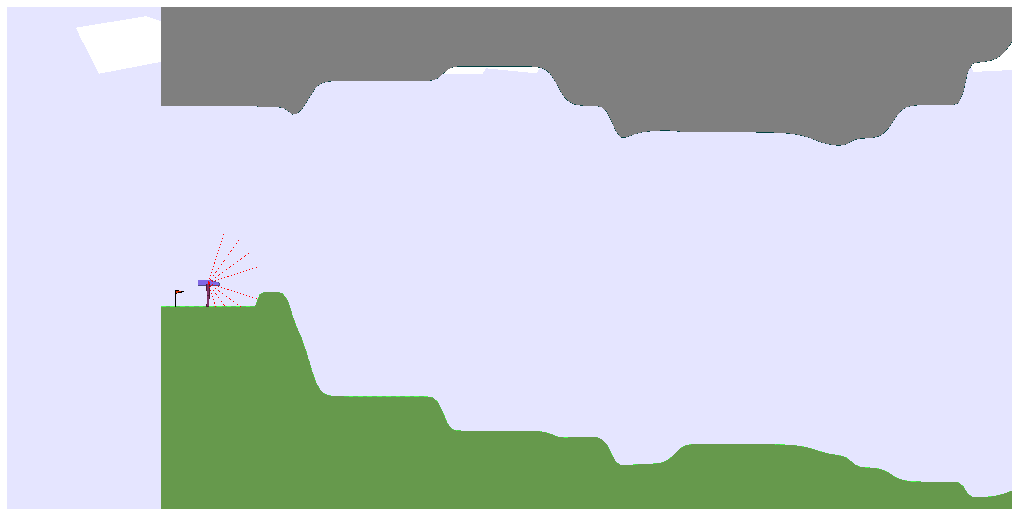

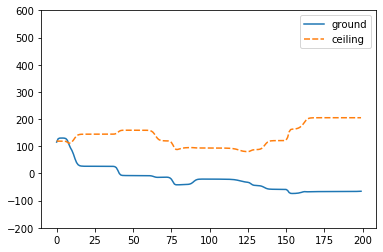

Sample nb 4
Sampled input :
[-0.16900211  0.86321929  0.01533254]
Sampled water level :
0.0


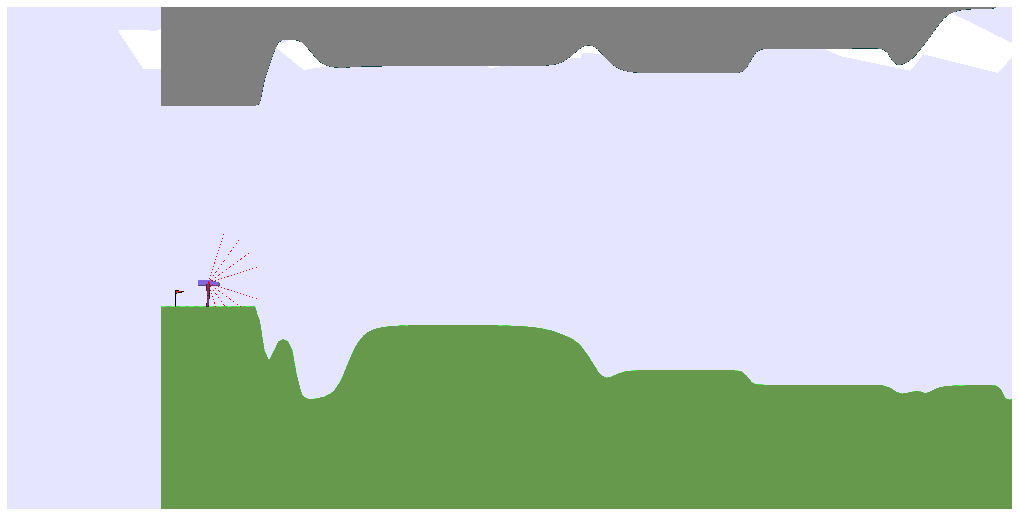

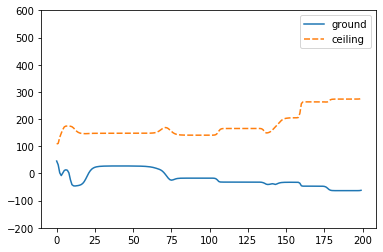

Sample nb 5
Sampled input :
[-0.08021217  0.99429302  0.07707538]
Sampled water level :
0.0


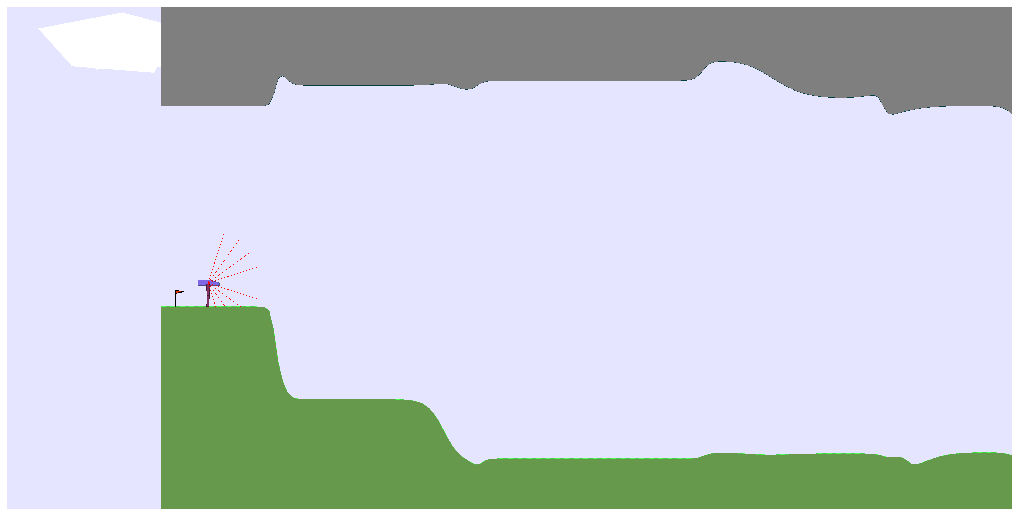

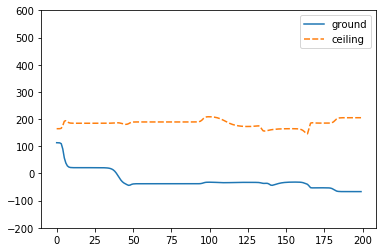

Sample nb 6
Sampled input :
[-0.16084833  0.93394493  0.01650001]
Sampled water level :
0.0


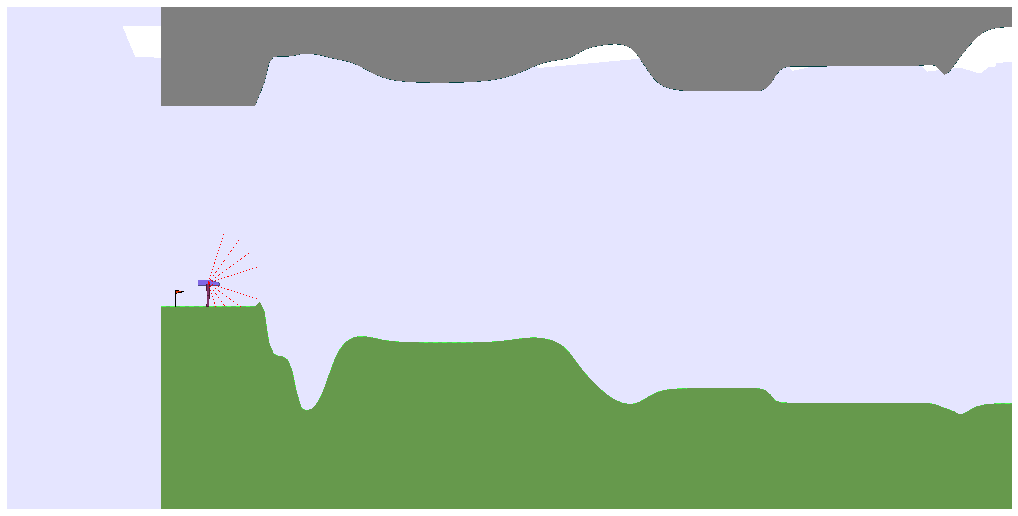

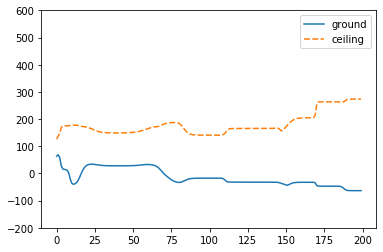

Sample nb 7
Sampled input :
[-0.1903993   0.85246096  0.00102591]
Sampled water level :
0.0


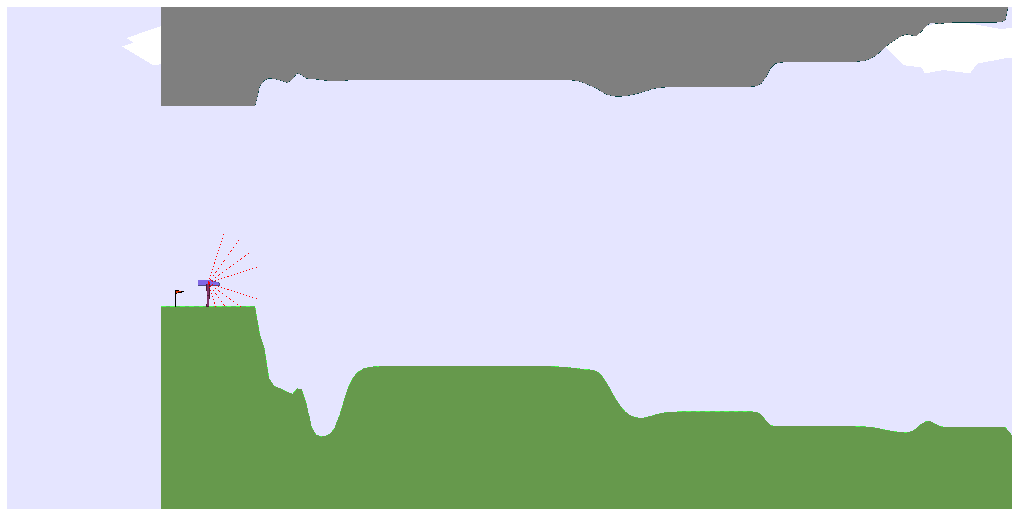

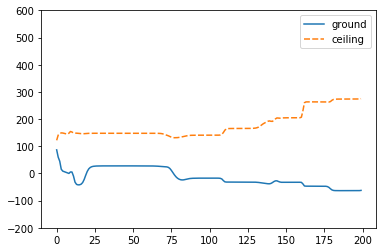

Sample nb 8
Sampled input :
[-0.15488073  0.92727474  0.19564083]
Sampled water level :
0.0


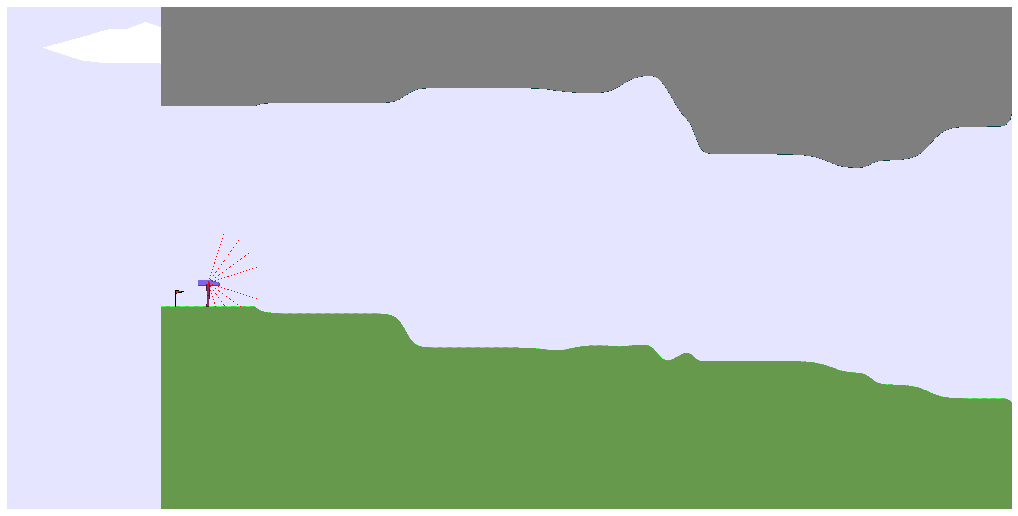

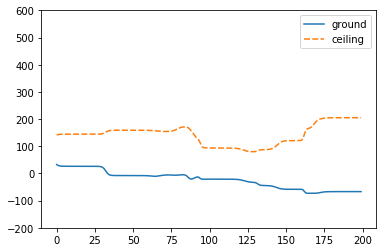

Sample nb 9
Sampled input :
[-0.06796938  0.90505113  0.02080379]
Sampled water level :
0.0


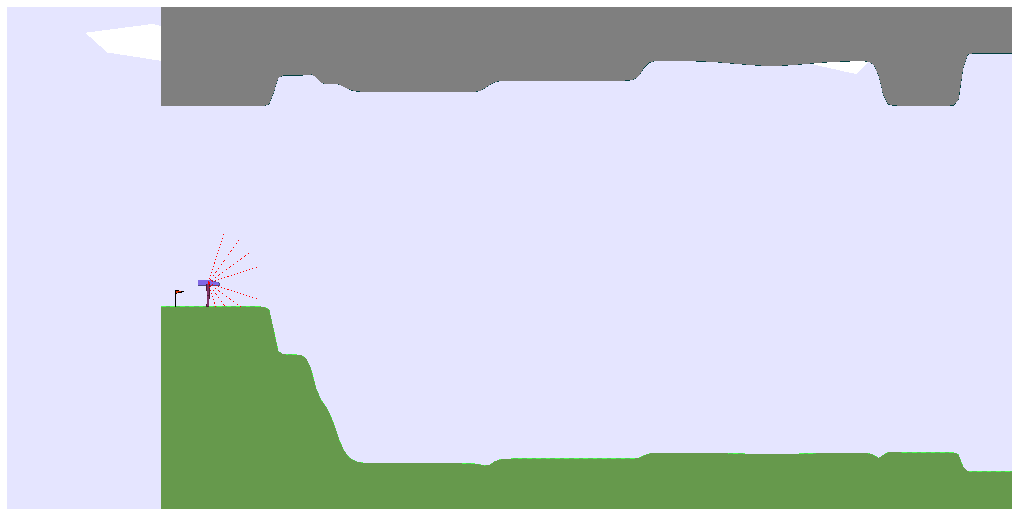

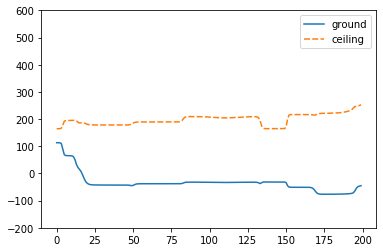

Sample nb 10
Sampled input :
[-0.05939196  0.8823906   0.17300342]
Sampled water level :
0.0


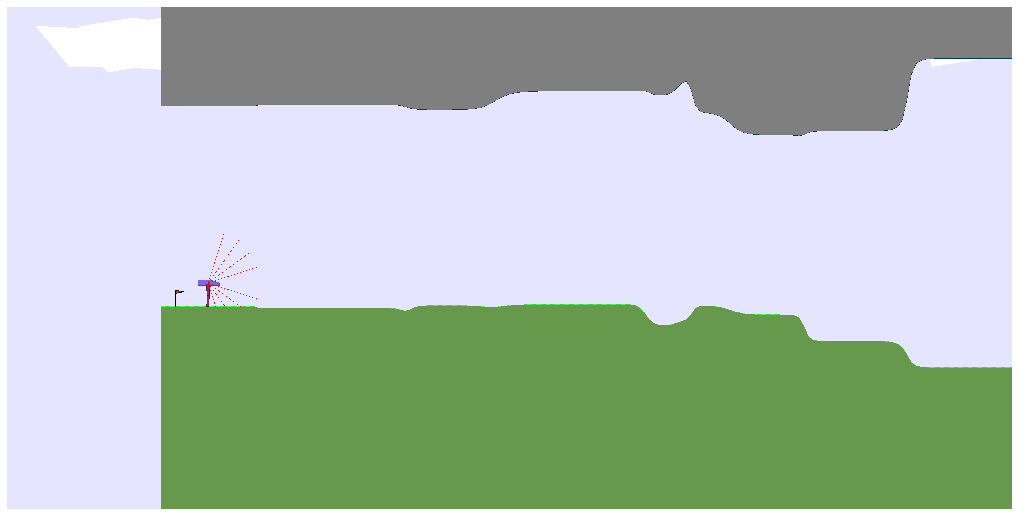

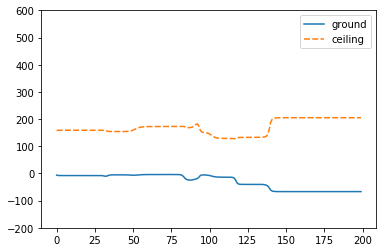

Sample nb 11
Sampled input :
[-0.12424284  0.85511176  0.17934945]
Sampled water level :
0.0


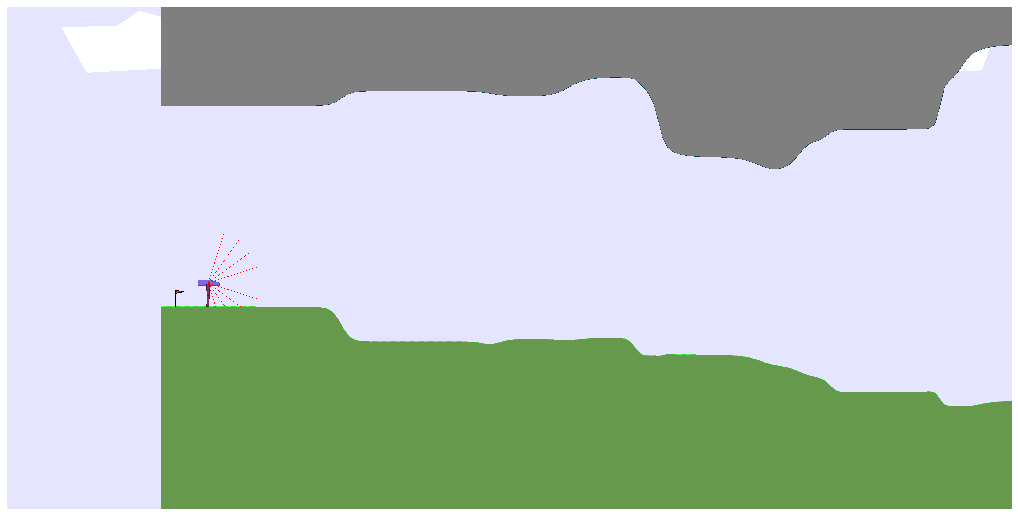

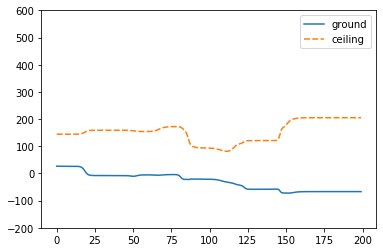

Sample nb 12
Sampled input :
[-0.16911895  0.9987145   0.14714542]
Sampled water level :
0.0


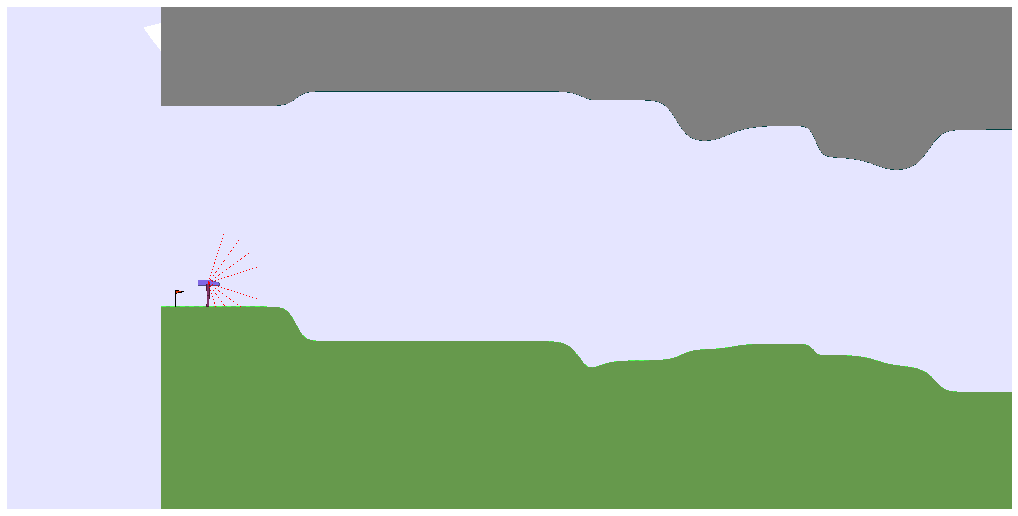

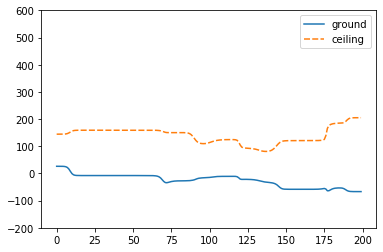

Sample nb 13
Sampled input :
[-0.13786737  0.8822511   0.1453976 ]
Sampled water level :
0.0


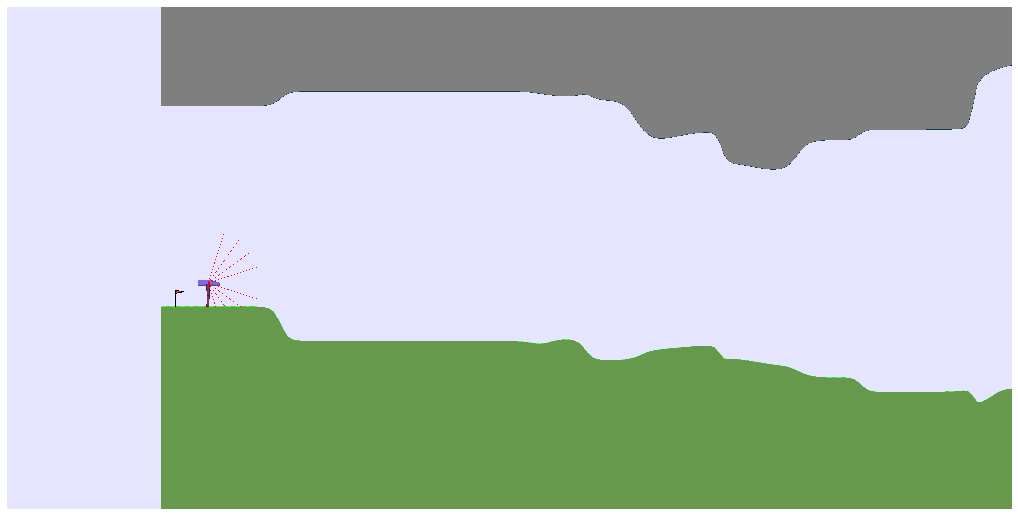

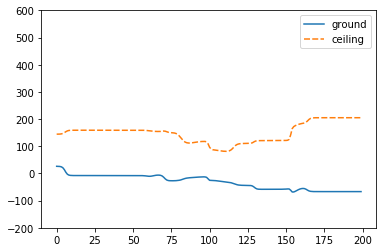

Sample nb 14
Sampled input :
[-0.11597097  0.94094312  0.12191197]
Sampled water level :
0.0


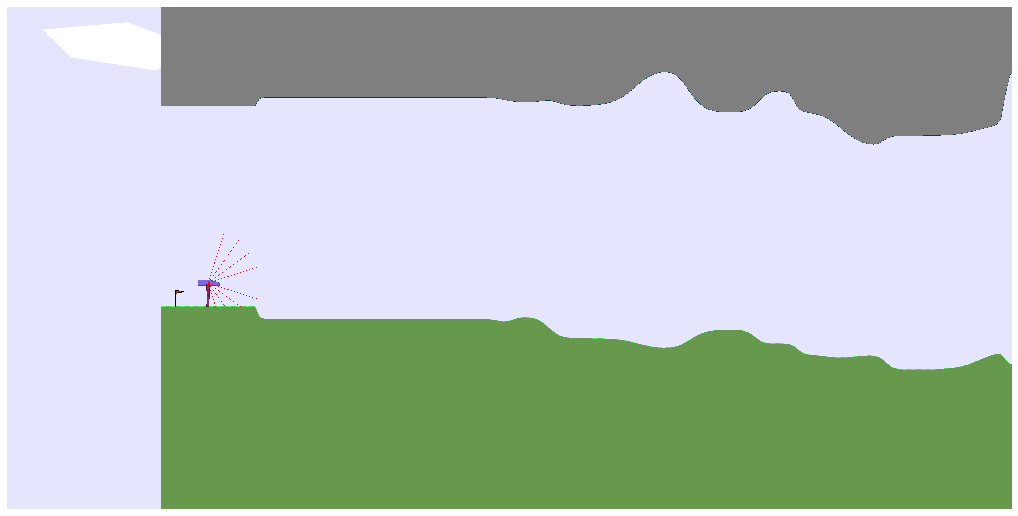

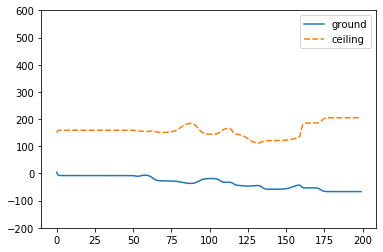

Sample nb 15
Sampled input :
[-0.20878363  0.8398323   0.15914777]
Sampled water level :
0.0


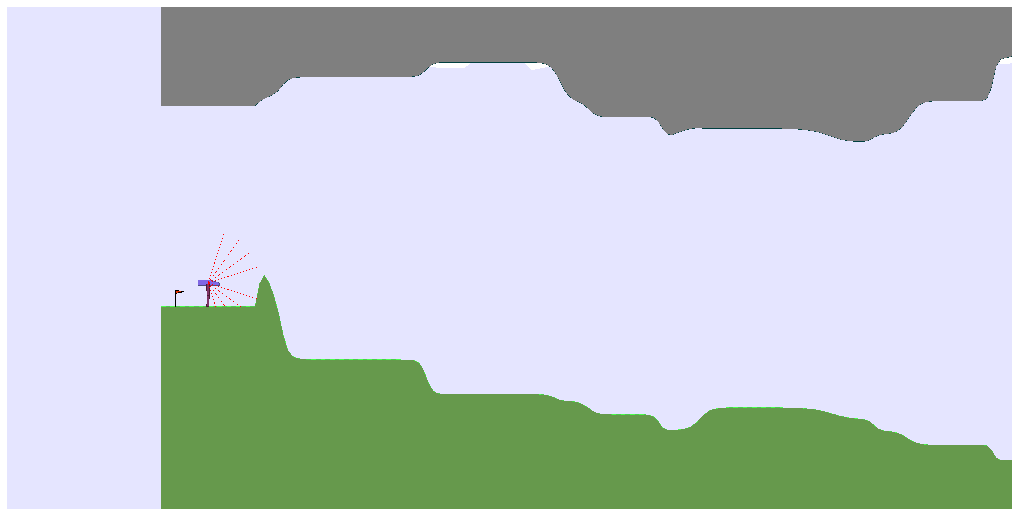

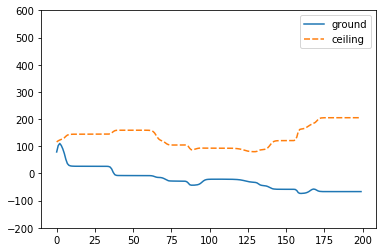

Sample nb 16
Sampled input :
[-0.11880743  0.85992336  0.02889568]
Sampled water level :
0.0


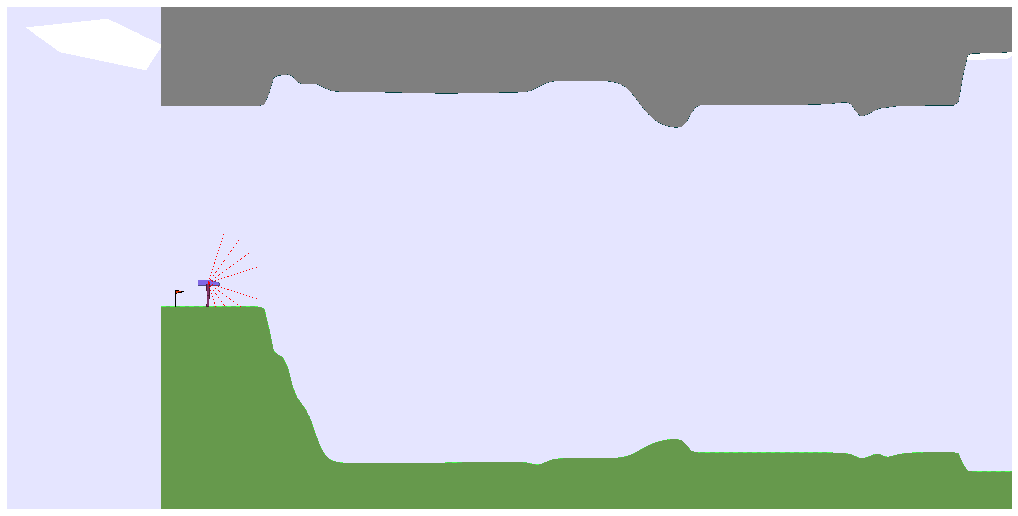

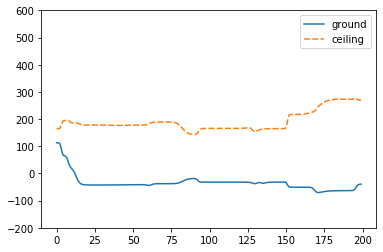

Sample nb 17
Sampled input :
[-0.18794609  0.8486796   0.11762081]
Sampled water level :
0.0


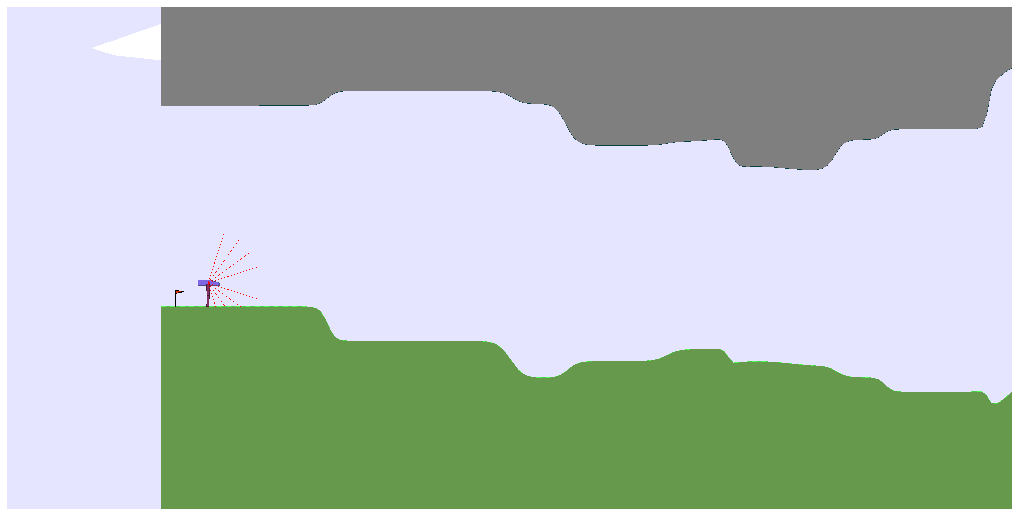

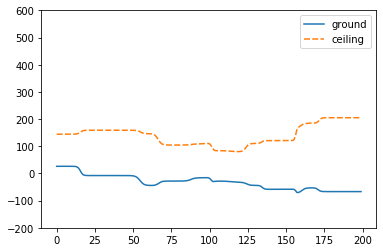

Sample nb 18
Sampled input :
[-0.10044588  0.94402933  0.13905217]
Sampled water level :
0.0


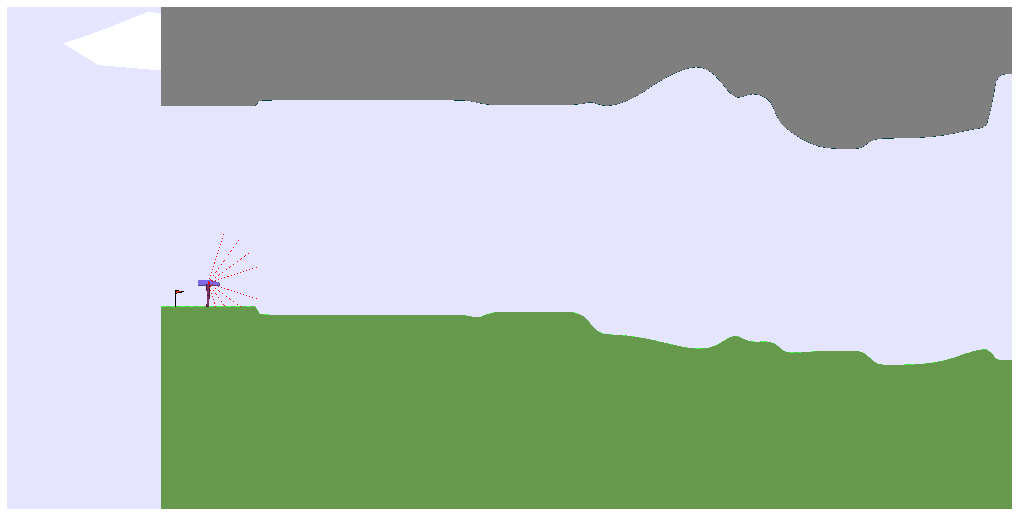

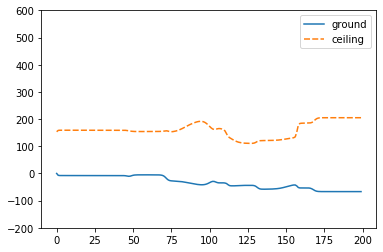

Sample nb 19
Sampled input :
[-0.06127151  0.90066793  0.17993472]
Sampled water level :
0.0


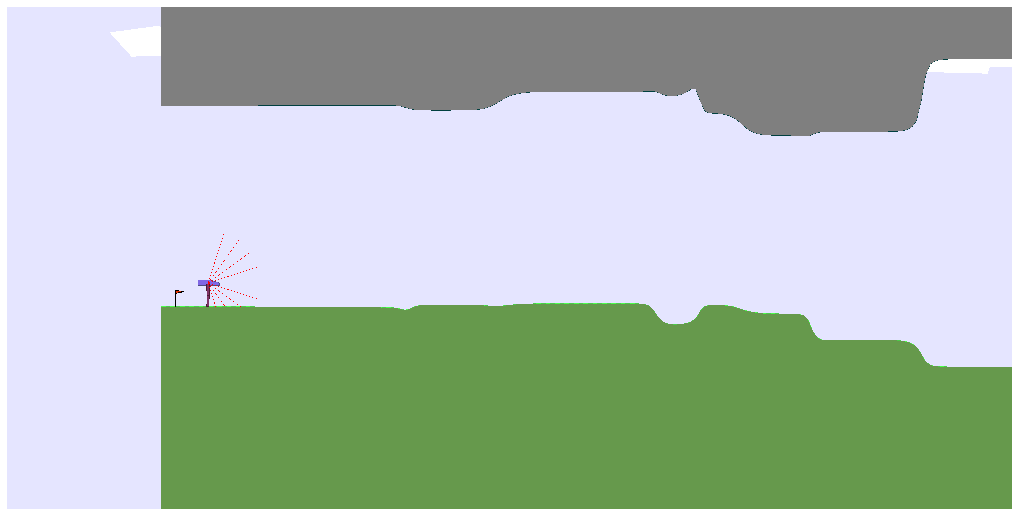

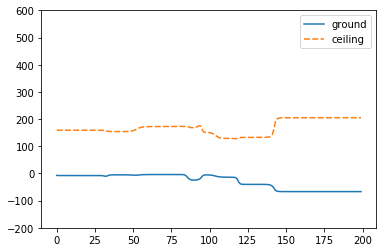

Sample nb 20
Sampled input :
[-0.13111016  0.99308172  0.19973965]
Sampled water level :
0.0


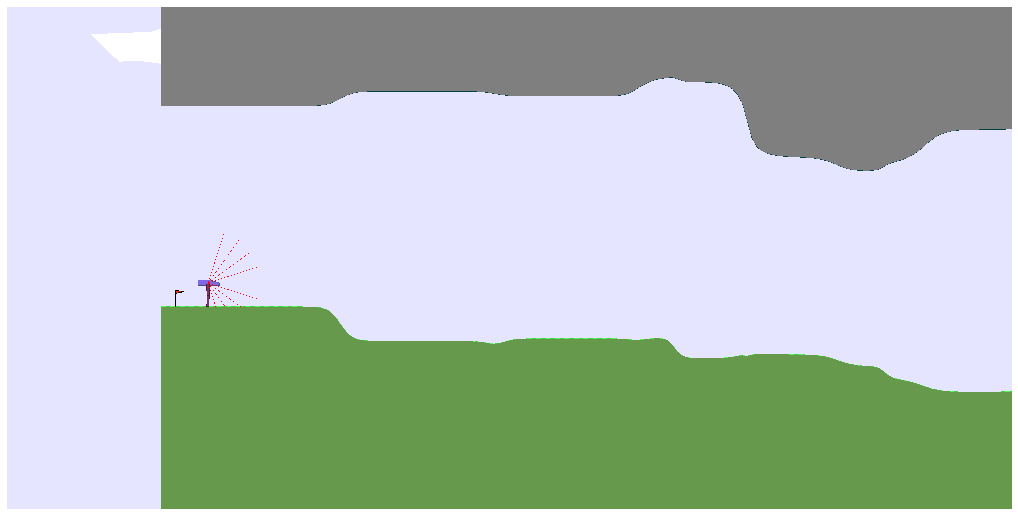

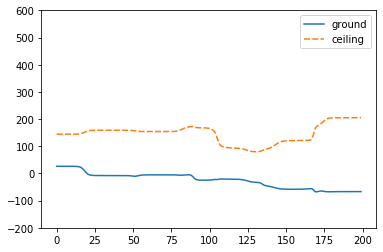

Sample nb 21
Sampled input :
[-0.15373933  0.85828454  0.01274411]
Sampled water level :
0.0


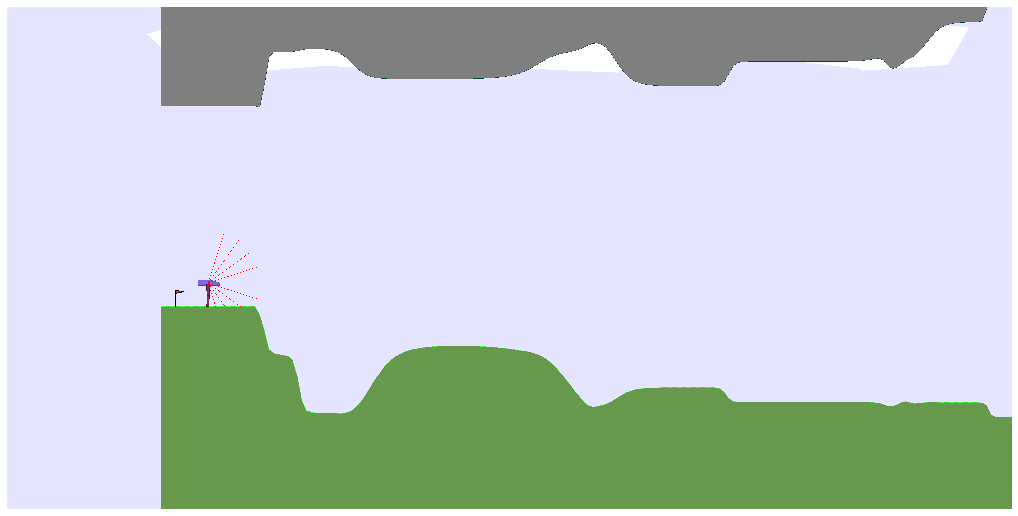

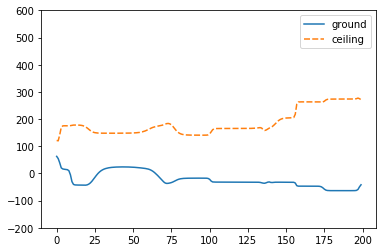

Sample nb 22
Sampled input :
[-0.24898334  0.92225552  0.1740363 ]
Sampled water level :
0.0


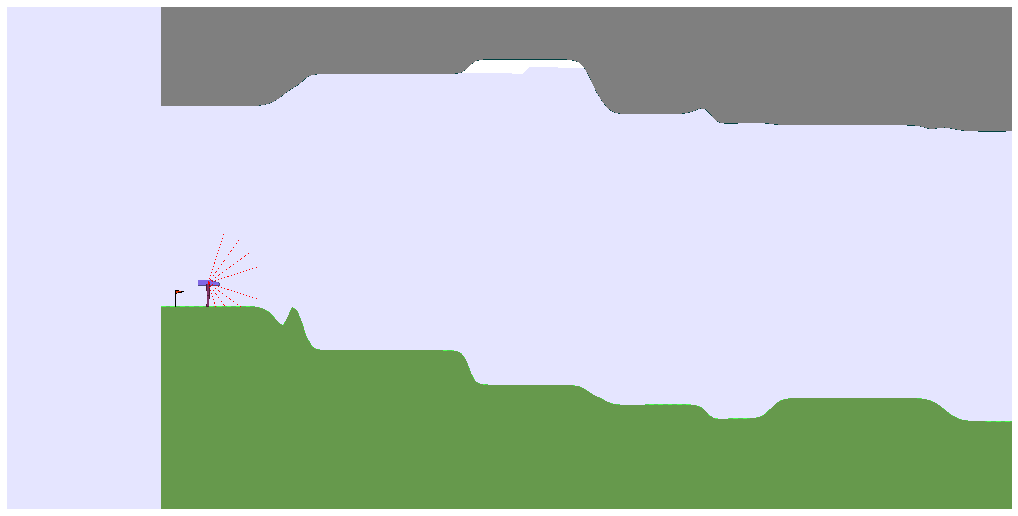

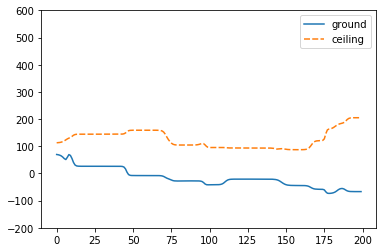

Sample nb 23
Sampled input :
[-0.0591361   0.94797276  0.03694259]
Sampled water level :
0.0


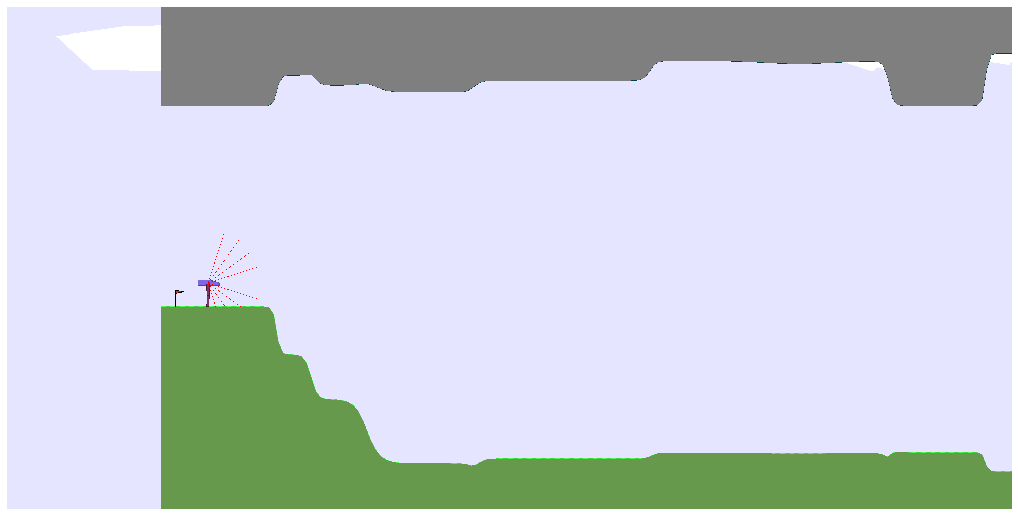

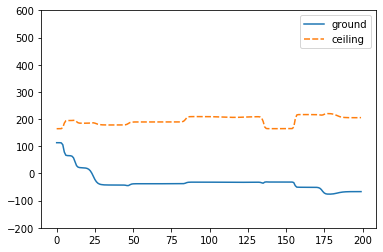

Sample nb 24
Sampled input :
[-0.0728201   0.85100926  0.08866254]
Sampled water level :
0.0


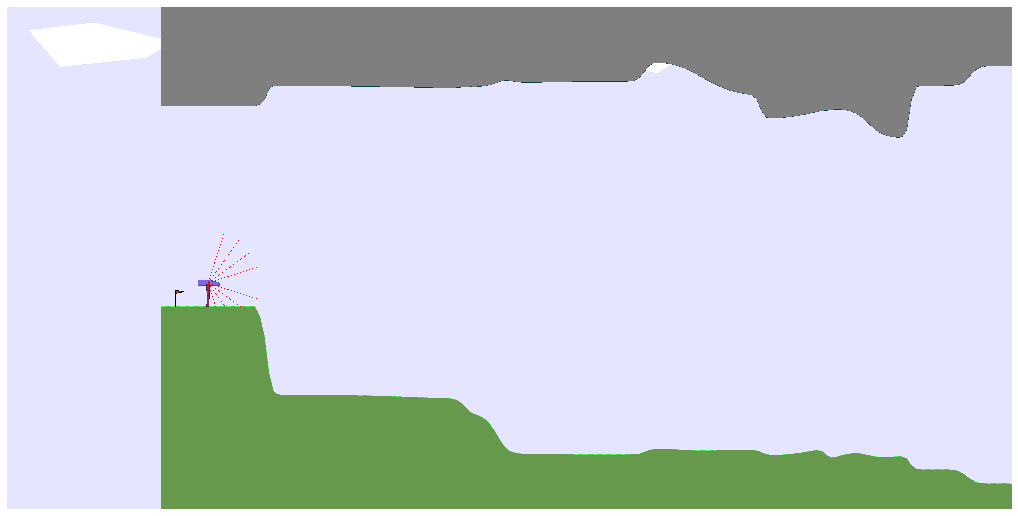

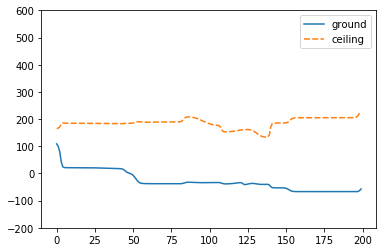

Sample nb 25
Sampled input :
[-0.2293295   0.89802193  0.00894088]
Sampled water level :
0.0


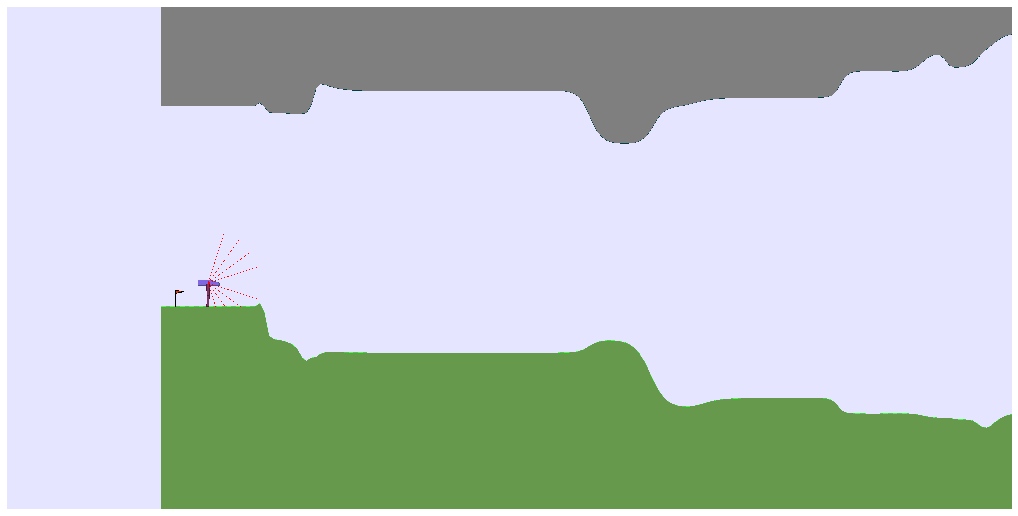

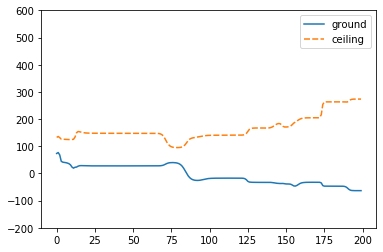

Sample nb 26
Sampled input :
[-0.09959206  0.94309982  0.18831085]
Sampled water level :
0.0


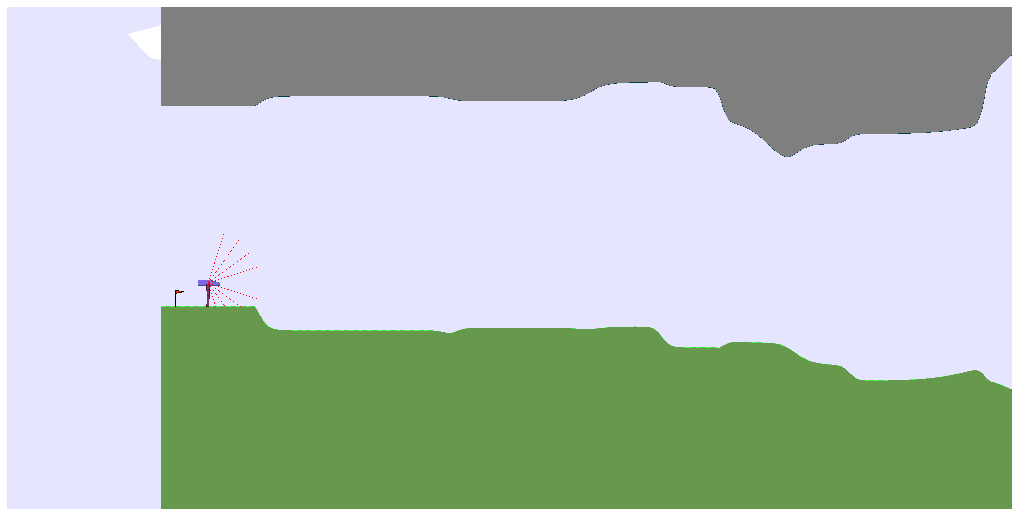

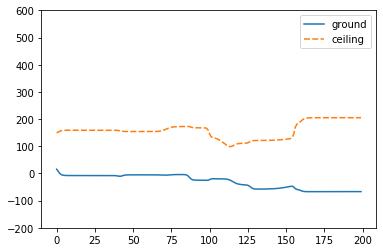

Sample nb 27
Sampled input :
[-0.2069543   0.98099424  0.11045283]
Sampled water level :
0.0


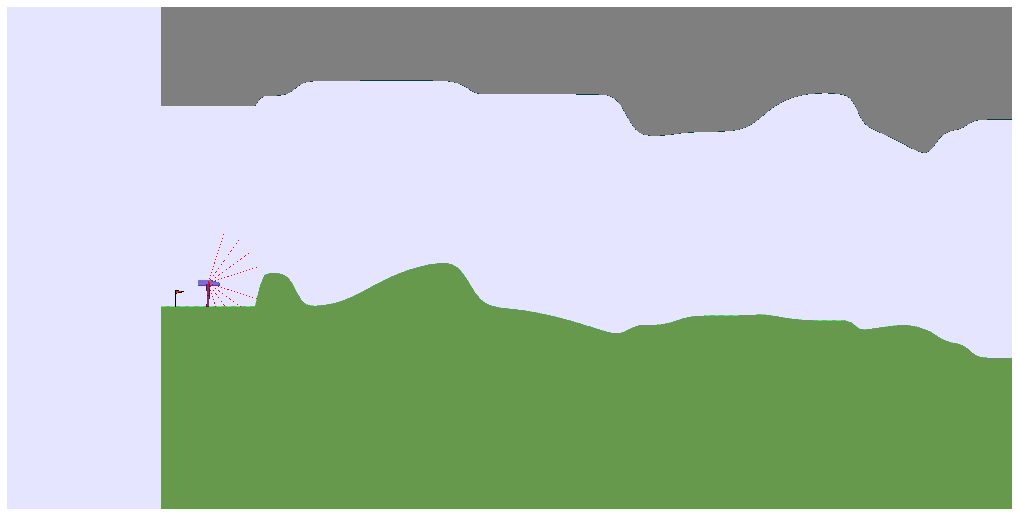

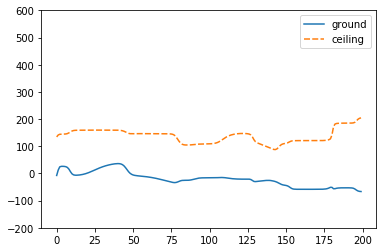

Sample nb 28
Sampled input :
[-0.0655021   0.96579226  0.0788396 ]
Sampled water level :
0.0


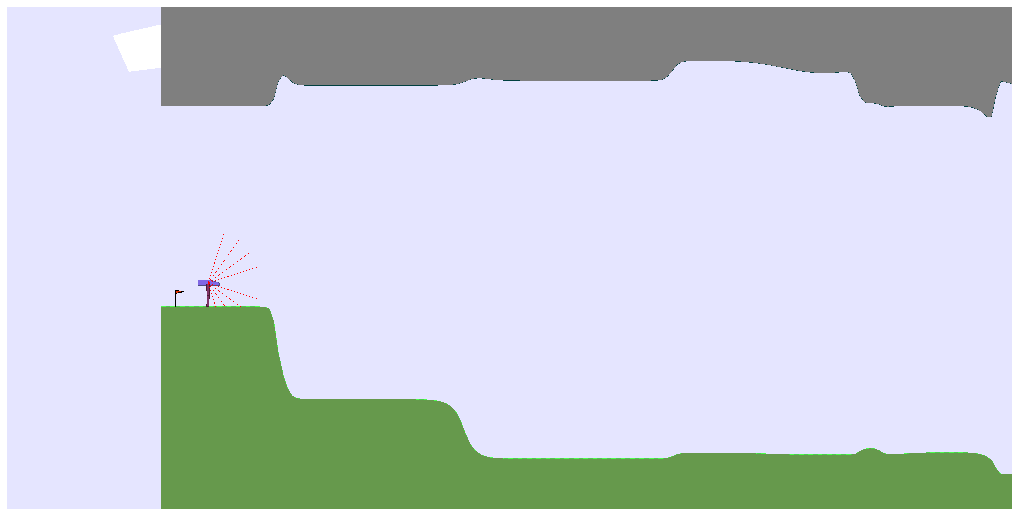

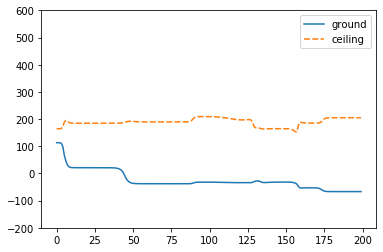

Sample nb 29
Sampled input :
[-0.16346038  0.93882943  0.0969373 ]
Sampled water level :
0.0


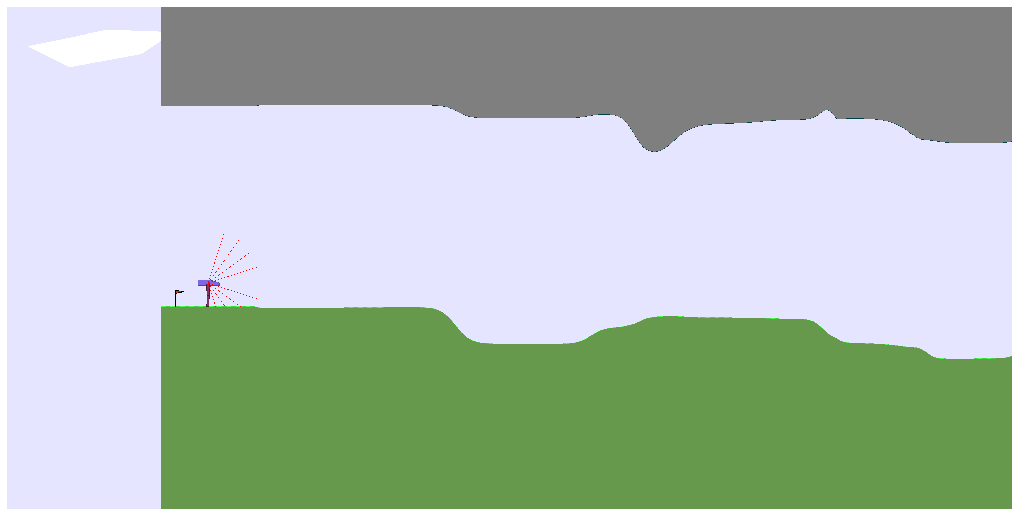

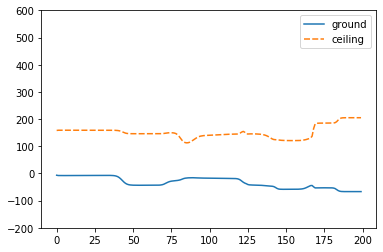

Sample nb 30
Sampled input :
[-0.1211259   0.84094124  0.14899143]
Sampled water level :
0.0


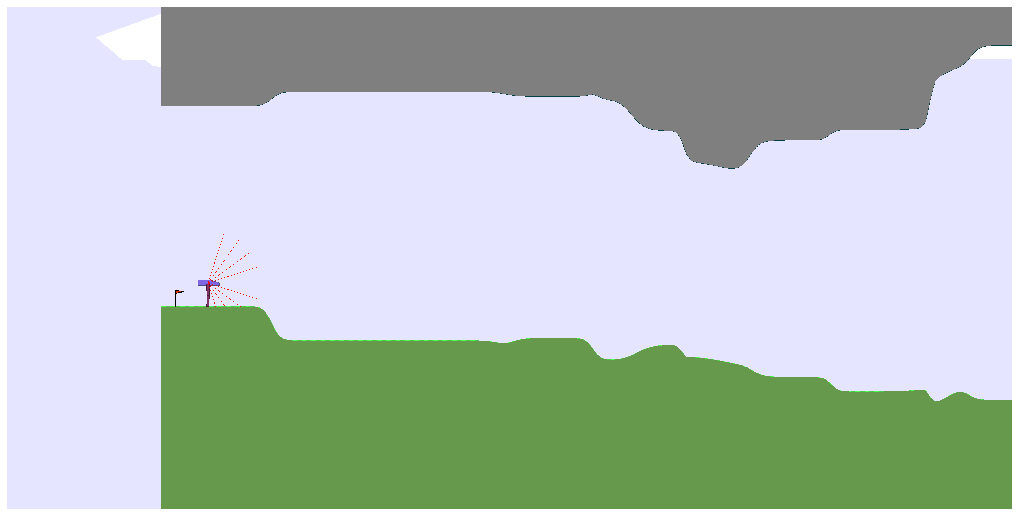

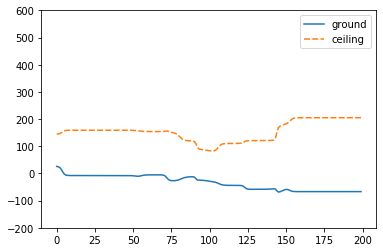

Sample nb 31
Sampled input :
[-0.2485381  0.8668978  0.1938511]
Sampled water level :
0.0


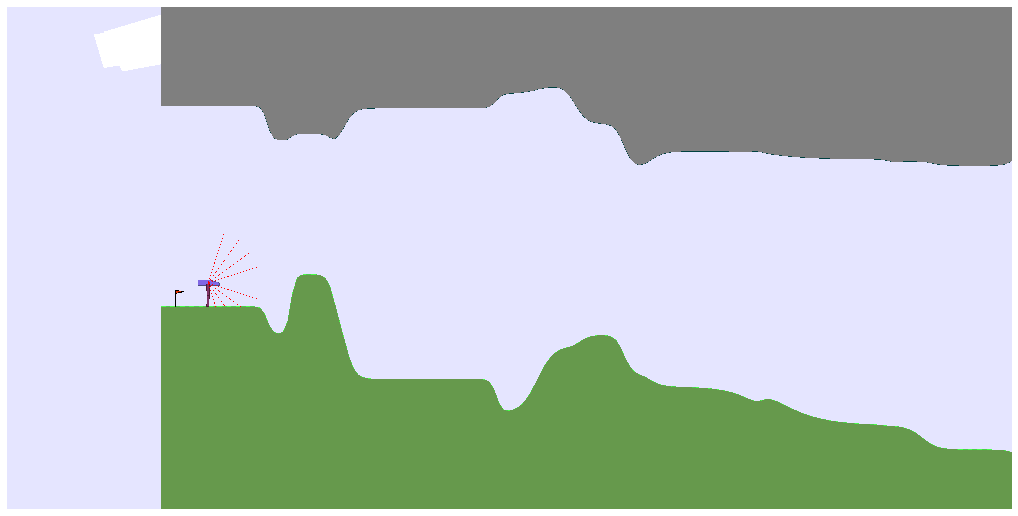

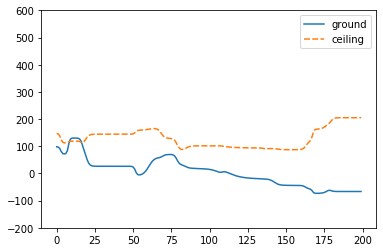

Sample nb 32
Sampled input :
[-0.16726289  0.82415043  0.01207271]
Sampled water level :
0.0


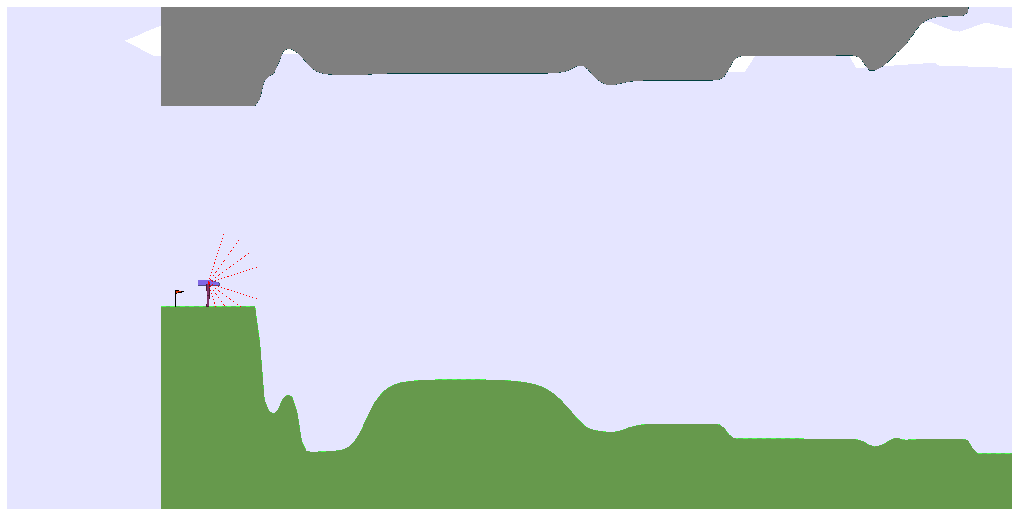

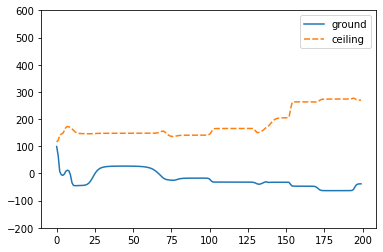

Sample nb 33
Sampled input :
[-0.0689098   0.80320518  0.11682817]
Sampled water level :
0.0


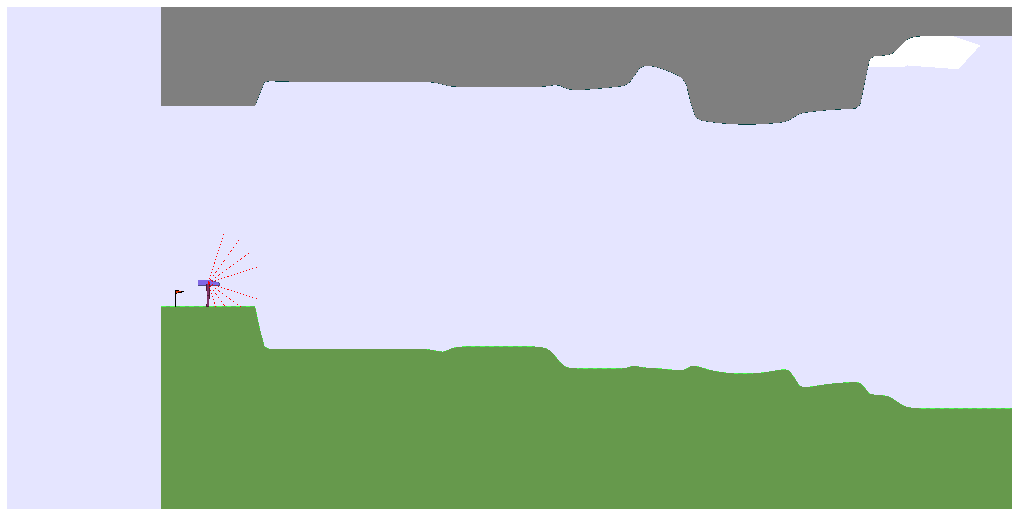

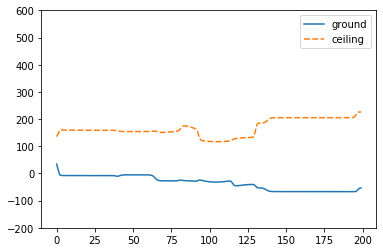

Sample nb 34
Sampled input :
[-0.19156049  0.90455952  0.16297038]
Sampled water level :
0.0


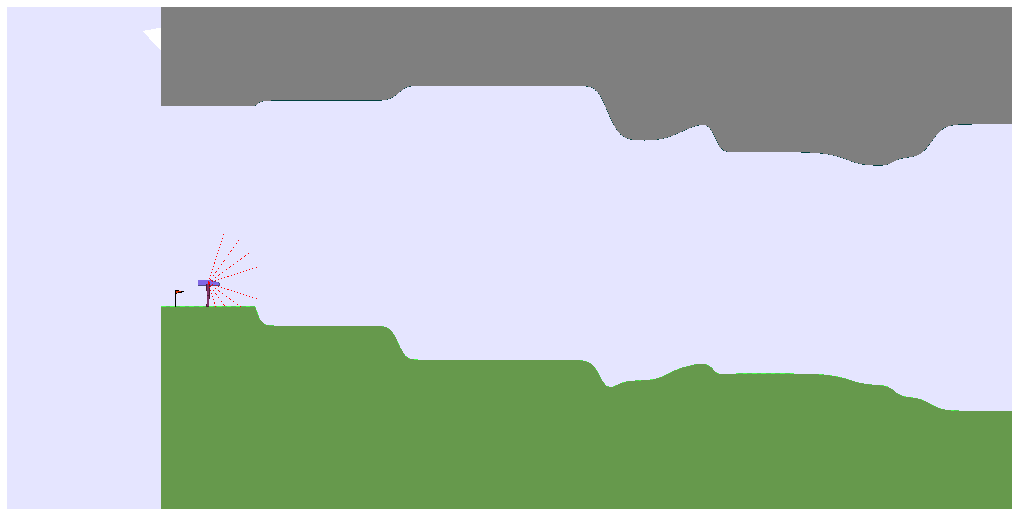

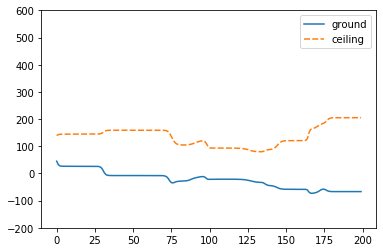

Sample nb 35
Sampled input :
[-0.17428893  0.81551156  0.09738124]
Sampled water level :
0.0


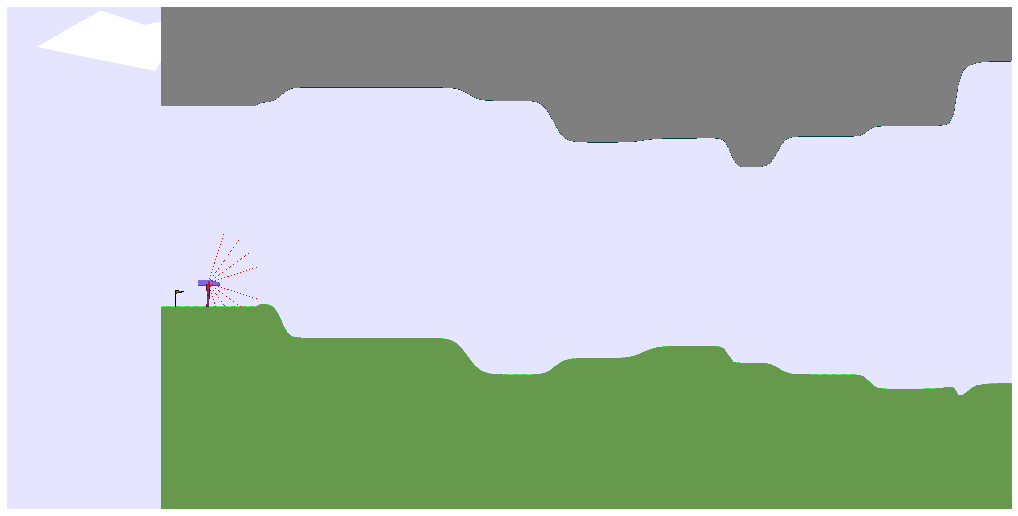

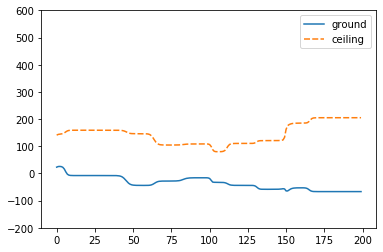

Sample nb 36
Sampled input :
[-0.21369305  0.81402719  0.10168019]
Sampled water level :
0.0


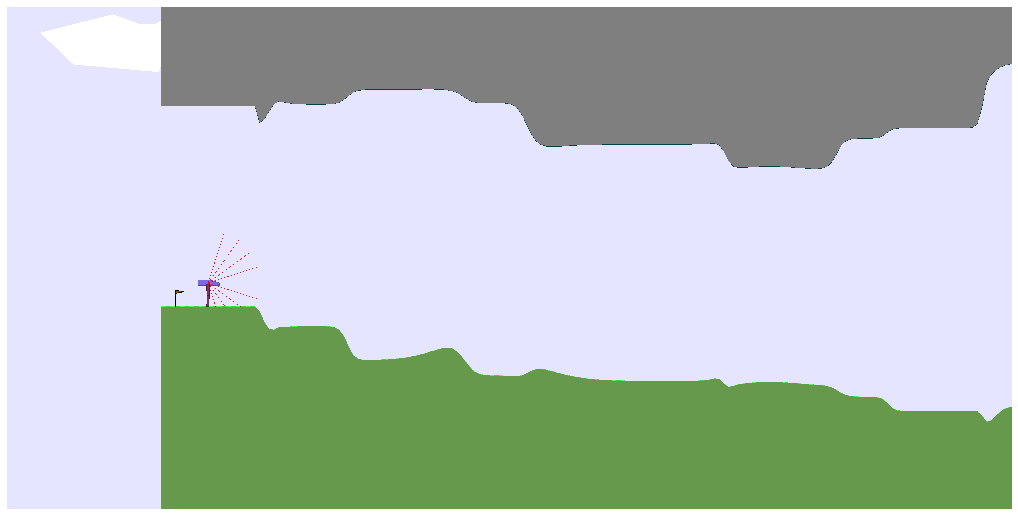

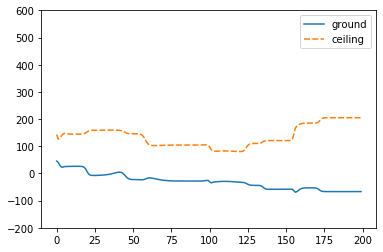

Sample nb 37
Sampled input :
[-0.20710044  0.81893138  0.16758611]
Sampled water level :
0.0


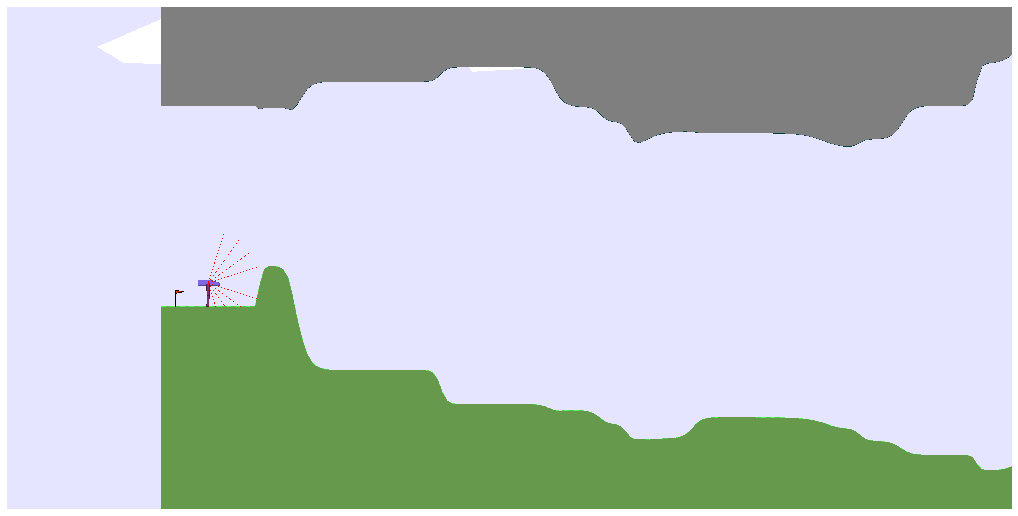

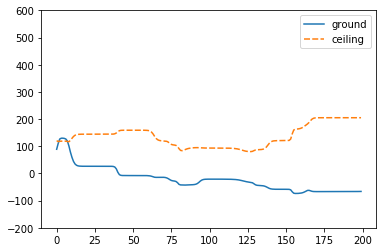

Sample nb 38
Sampled input :
[-8.46429856e-02  8.05192454e-01  4.47915431e-04]
Sampled water level :
0.0


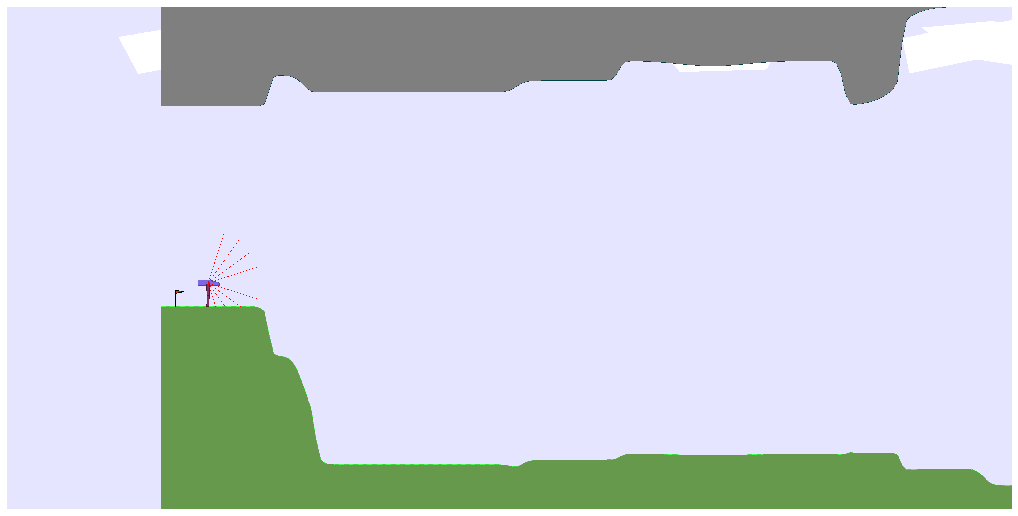

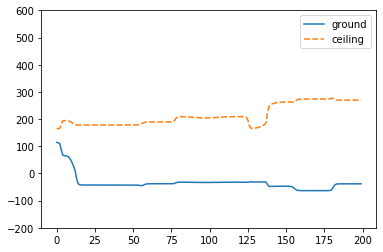

Sample nb 39
Sampled input :
[-0.11521335  0.99896292  0.095901  ]
Sampled water level :
0.0


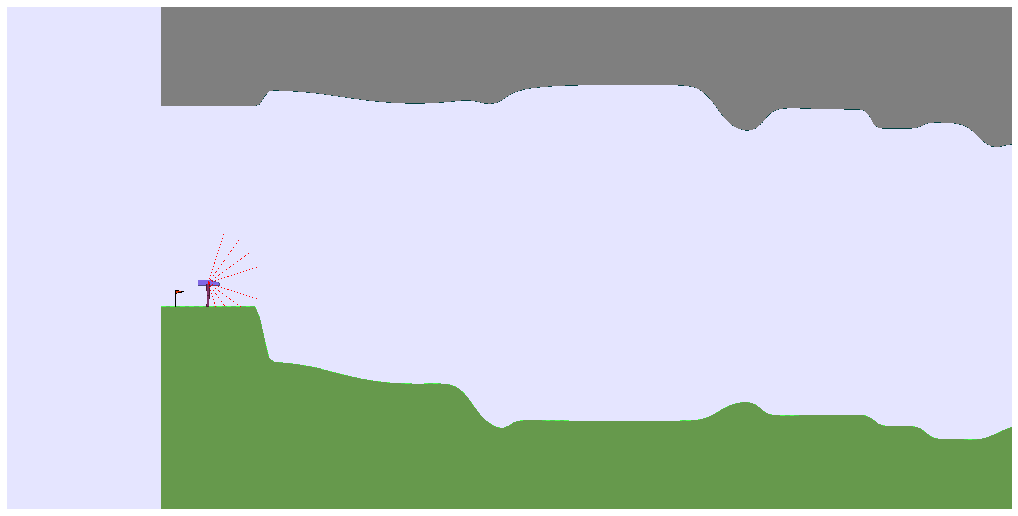

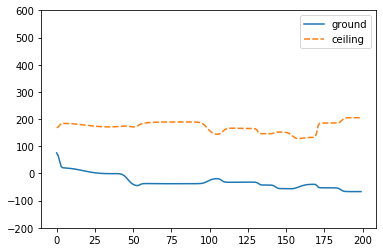

Sample nb 40
Sampled input :
[-0.05954339  0.83321403  0.07385706]
Sampled water level :
0.0


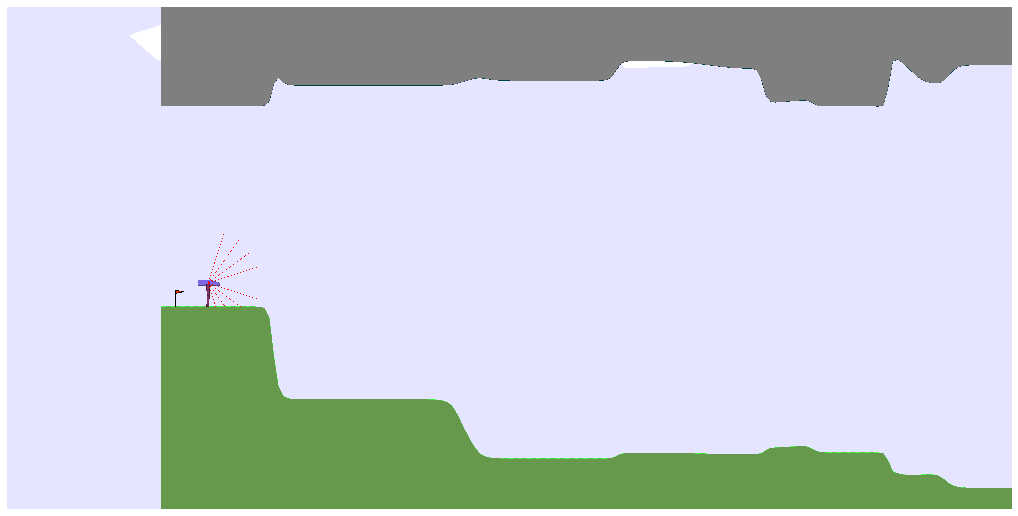

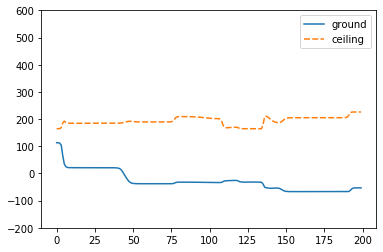

Sample nb 41
Sampled input :
[-0.23367177  0.89079242  0.17745812]
Sampled water level :
0.0


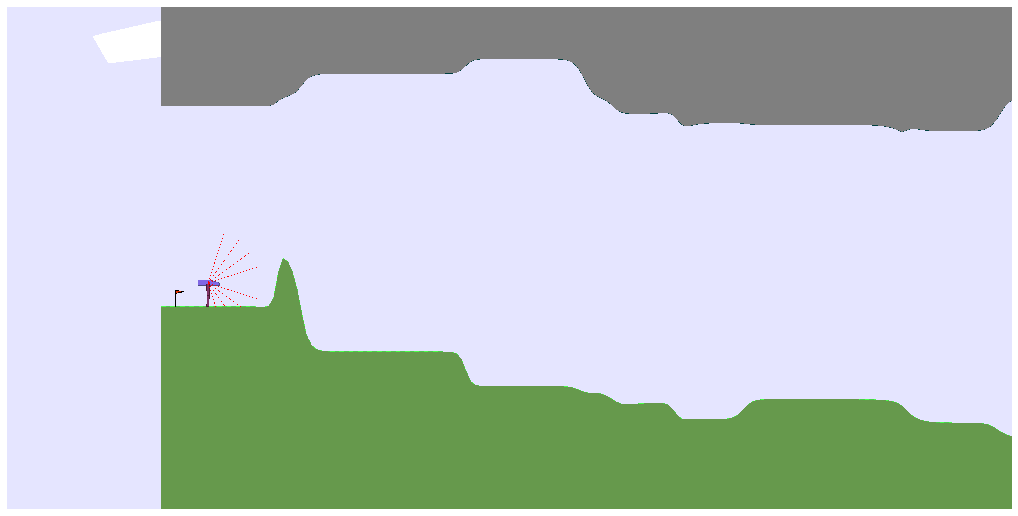

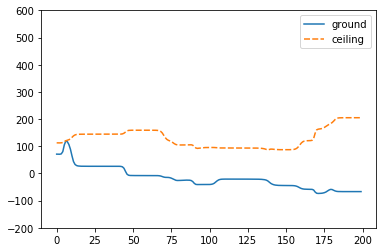

Sample nb 42
Sampled input :
[-0.05746841  0.99947452  0.0972031 ]
Sampled water level :
0.0


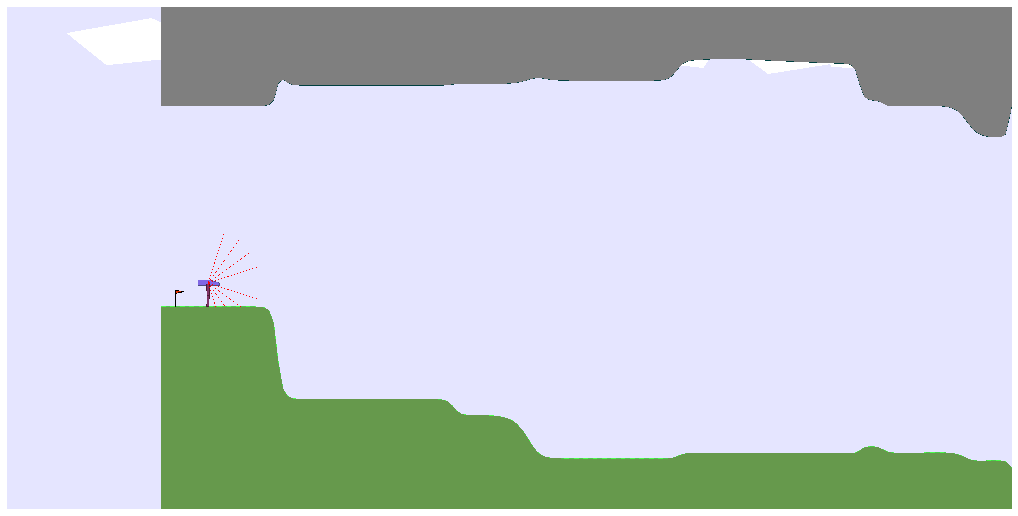

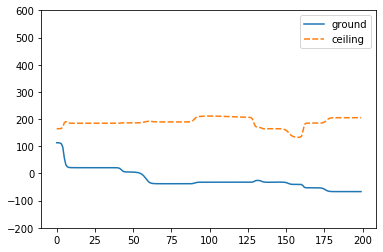

Sample nb 43
Sampled input :
[-0.0553122   0.99974371  0.08904262]
Sampled water level :
0.0


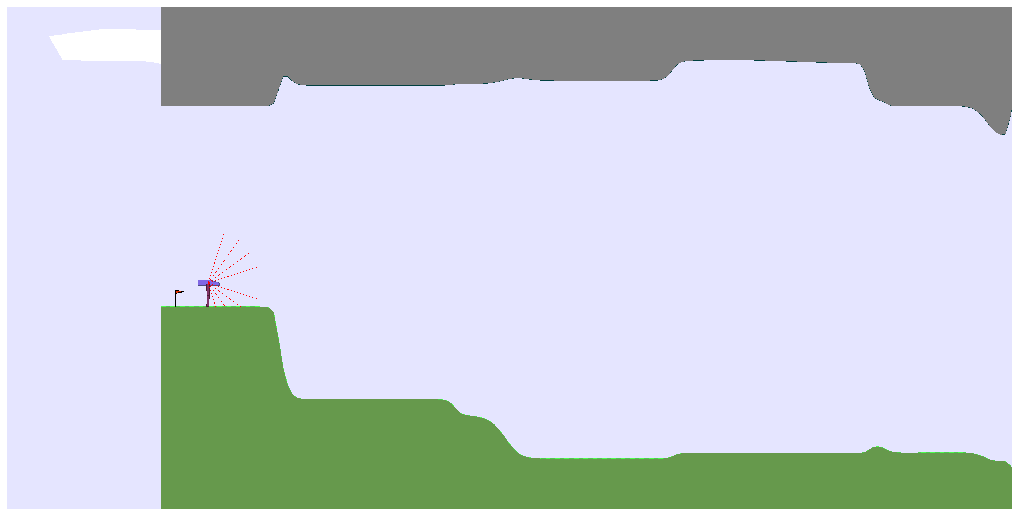

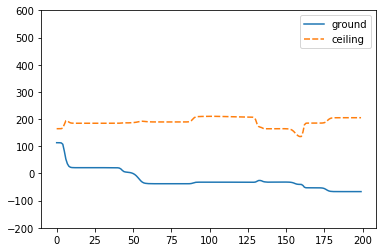

Sample nb 44
Sampled input :
[-0.16058778  0.94203496  0.12521427]
Sampled water level :
0.0


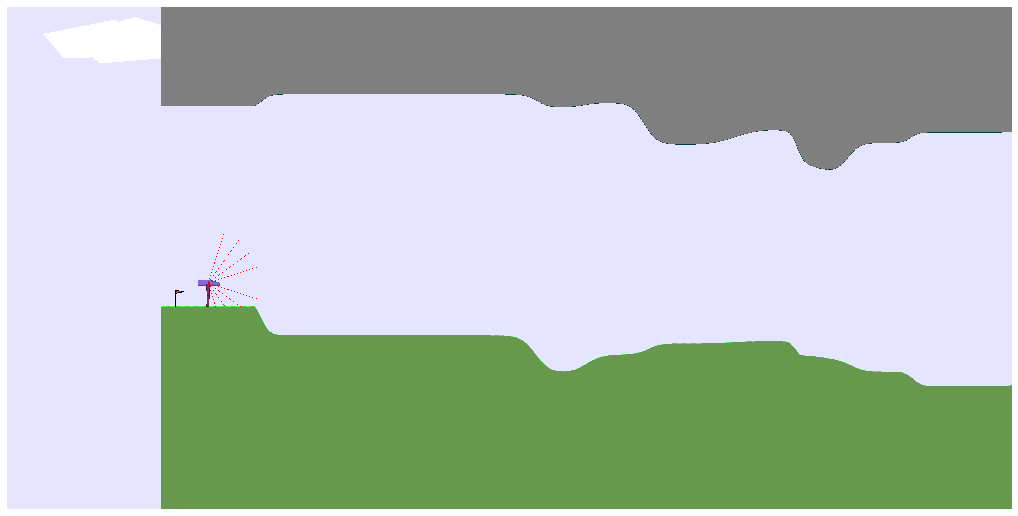

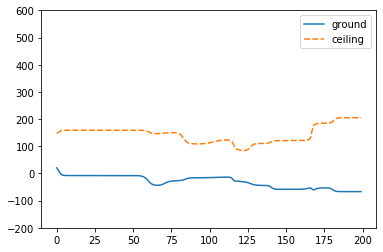

Sample nb 45
Sampled input :
[-0.05561623  0.93239425  0.01829004]
Sampled water level :
0.0


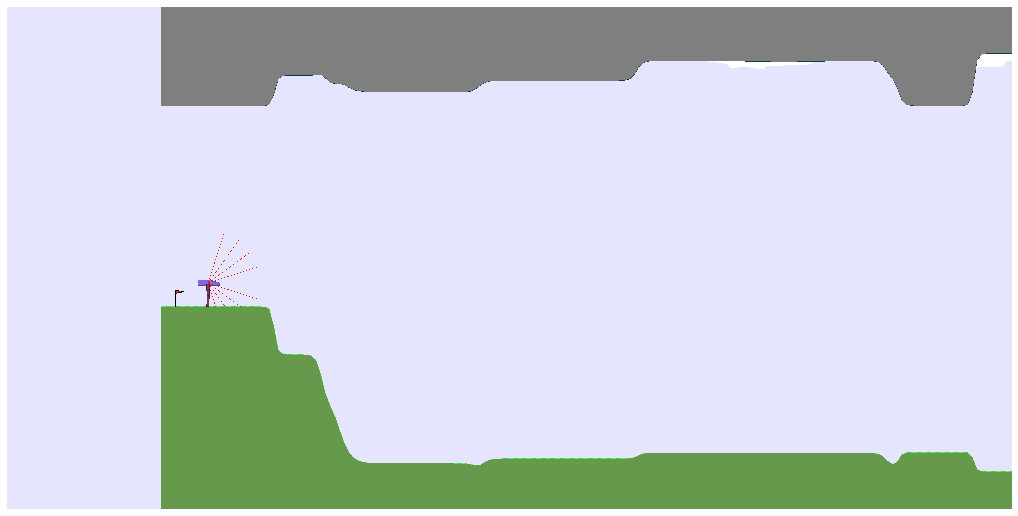

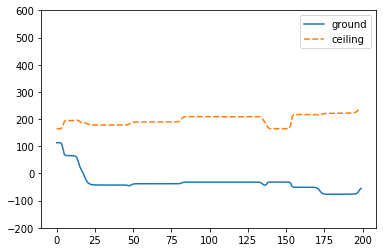

Sample nb 46
Sampled input :
[-0.2076838   0.95901513  0.0700612 ]
Sampled water level :
0.0


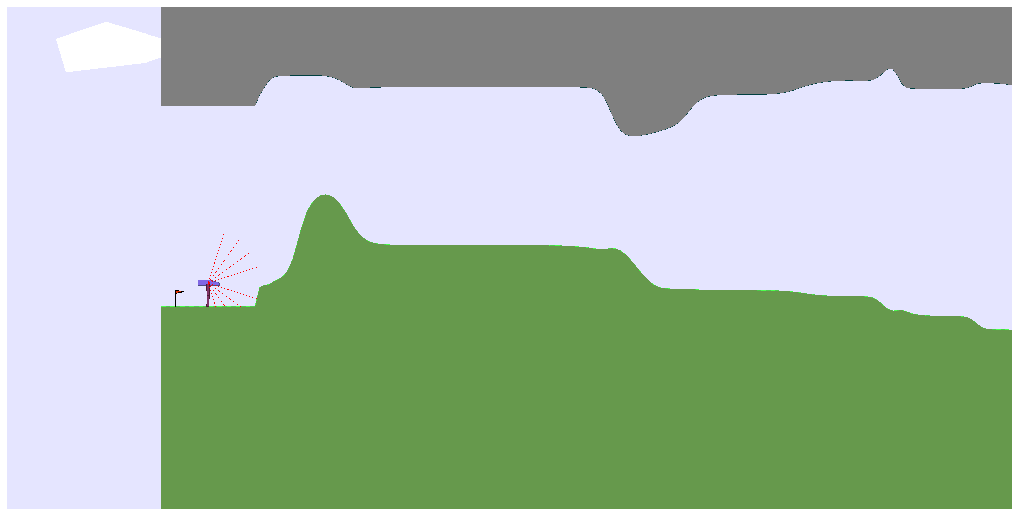

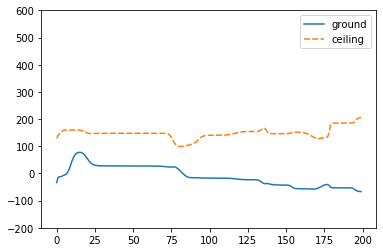

Sample nb 47
Sampled input :
[-0.10929217  0.83432554  0.12021189]
Sampled water level :
0.0


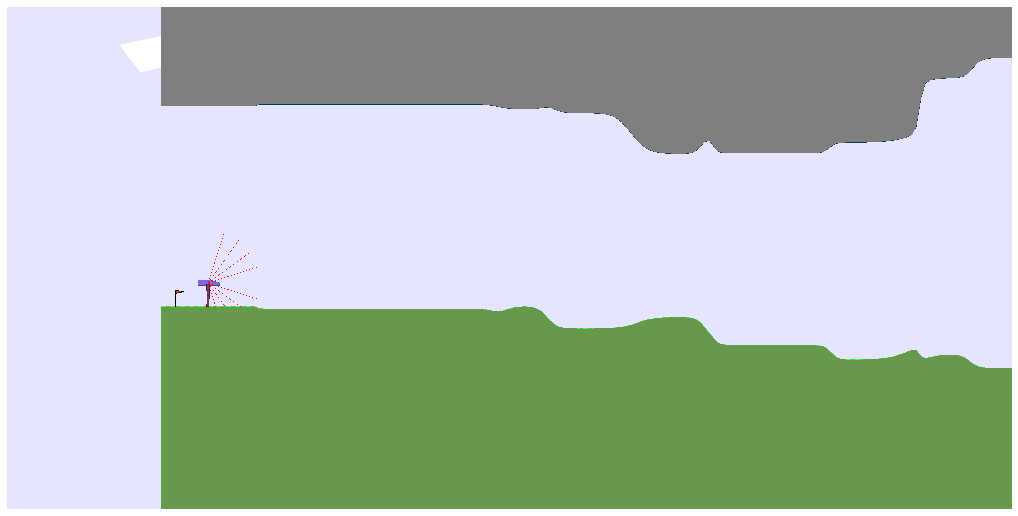

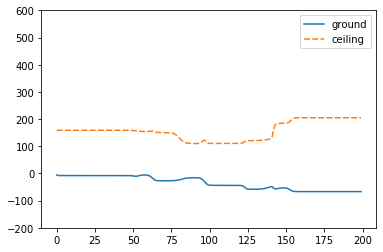

Sample nb 48
Sampled input :
[-0.08468432  0.86654033  0.10933944]
Sampled water level :
0.0


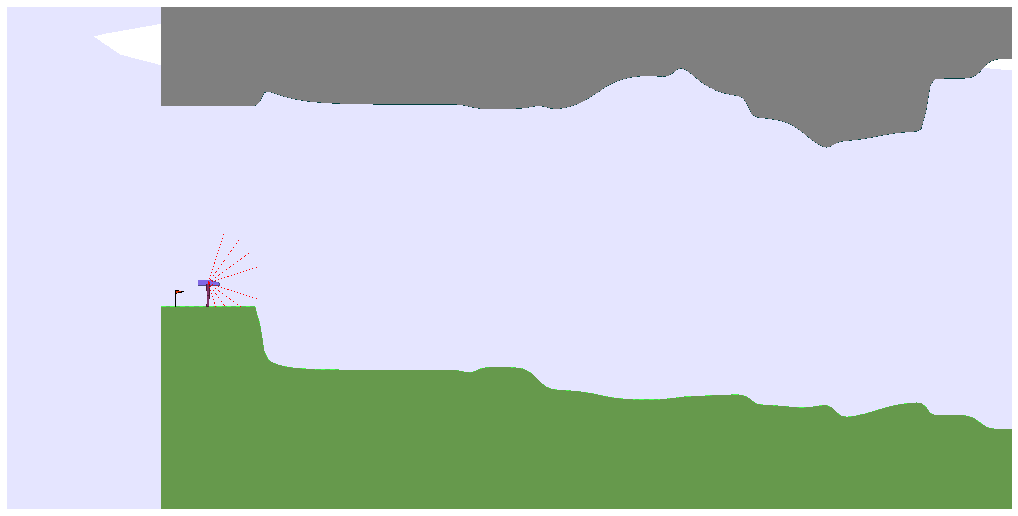

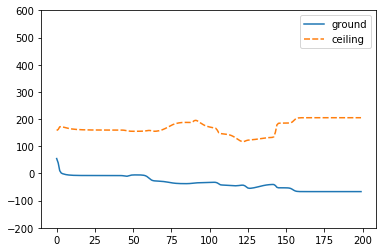

Sample nb 49
Sampled input :
[-0.05618659  0.865507    0.01767476]
Sampled water level :
0.0


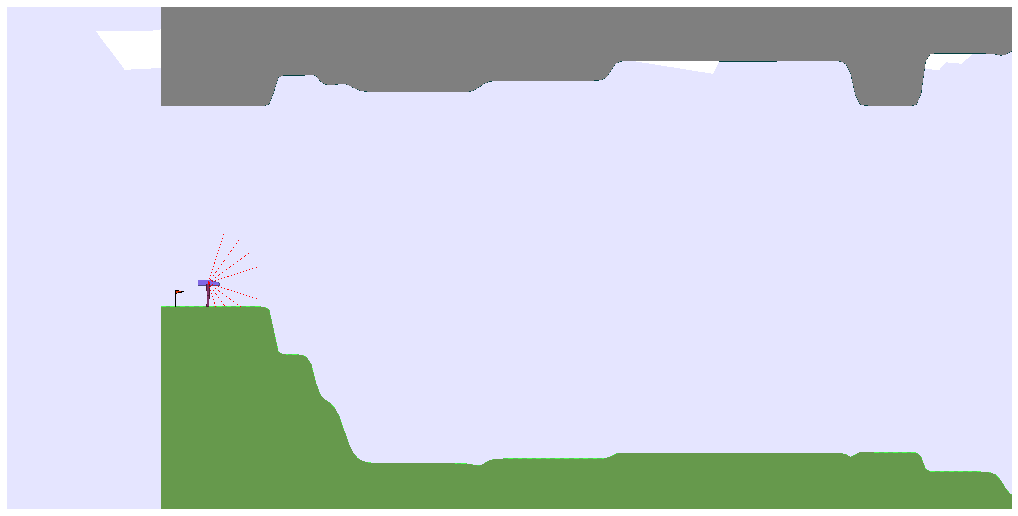

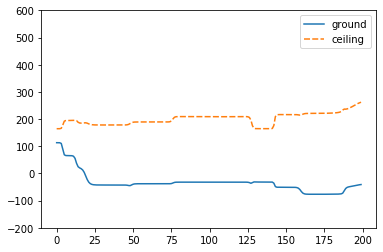

Sample nb 50
Sampled input :
[-0.05213931  0.98381542  0.17009714]
Sampled water level :
0.0


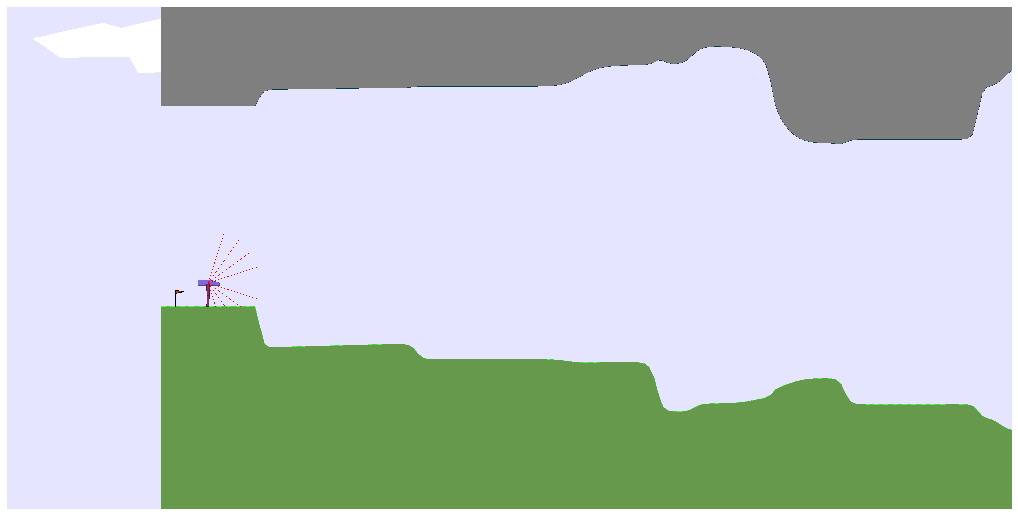

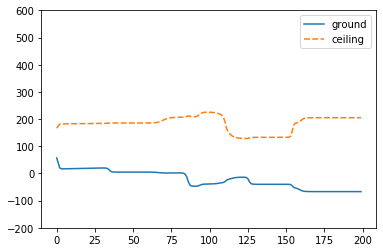

Sample nb 51
Sampled input :
[-0.15627669  0.91179056  0.02138044]
Sampled water level :
0.0


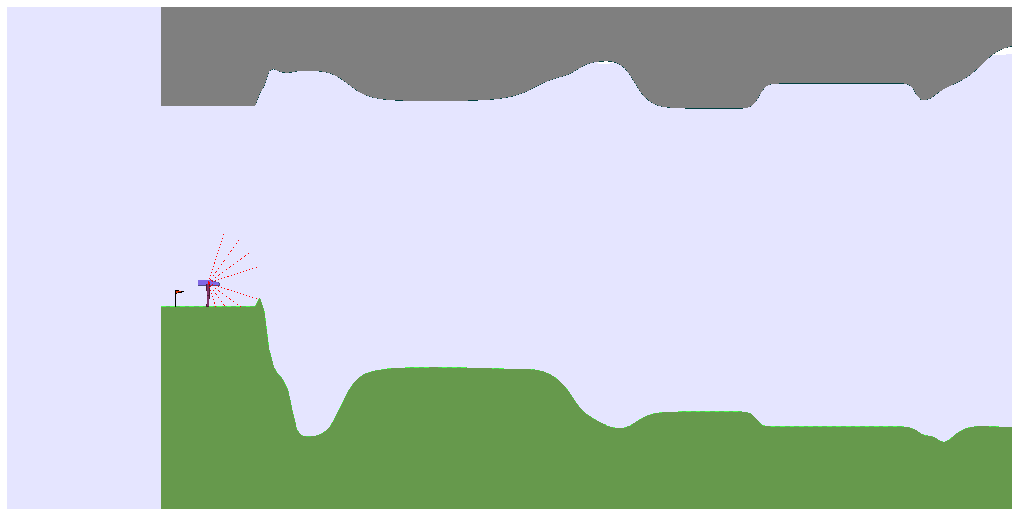

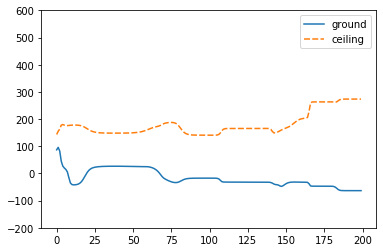

Sample nb 52
Sampled input :
[-0.12697056  0.99840916  0.13851528]
Sampled water level :
0.0


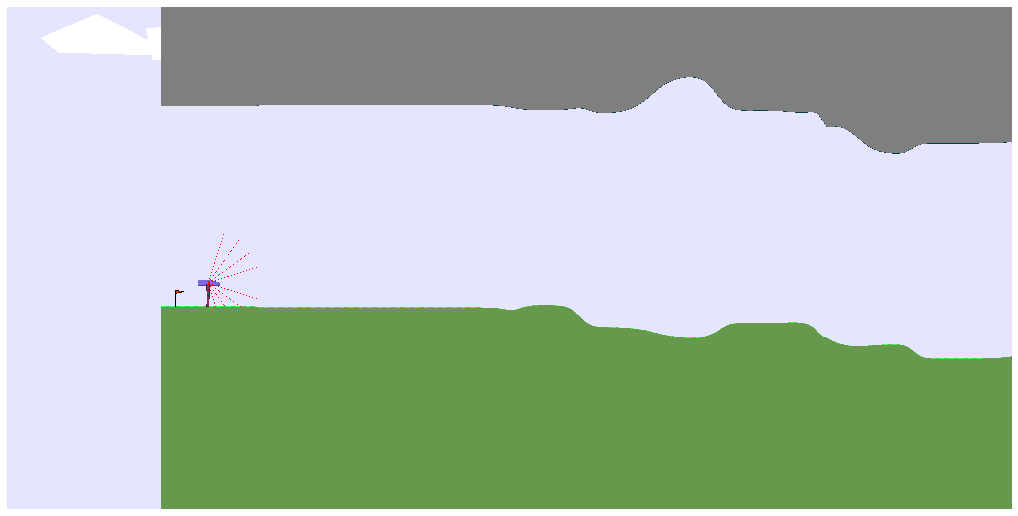

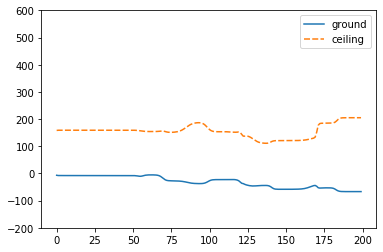

Sample nb 53
Sampled input :
[-0.21530733  0.80923361  0.06535794]
Sampled water level :
0.0


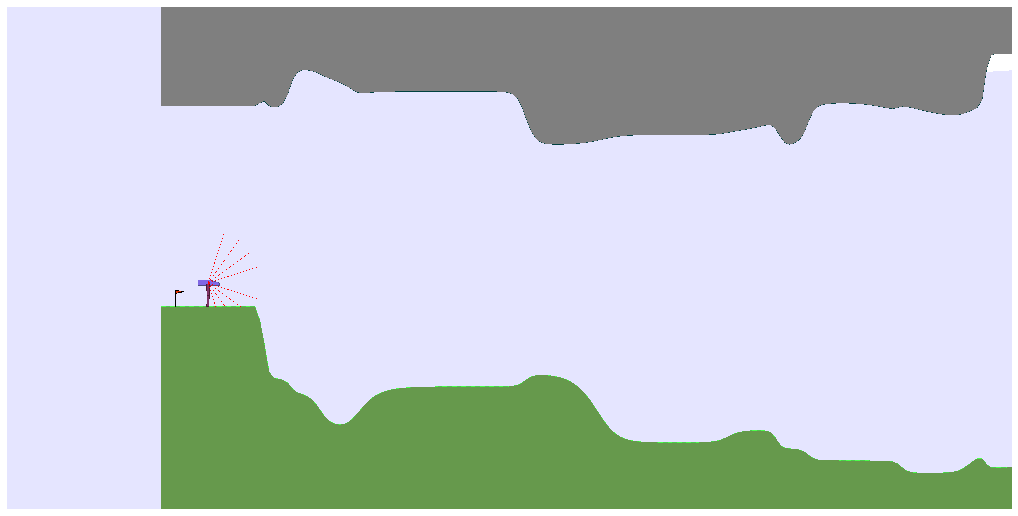

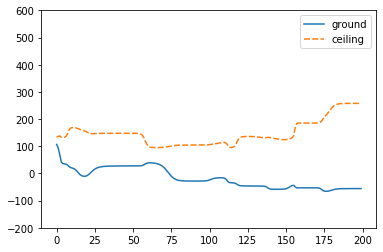

Sample nb 54
Sampled input :
[-0.15412256  0.93179562  0.01718844]
Sampled water level :
0.0


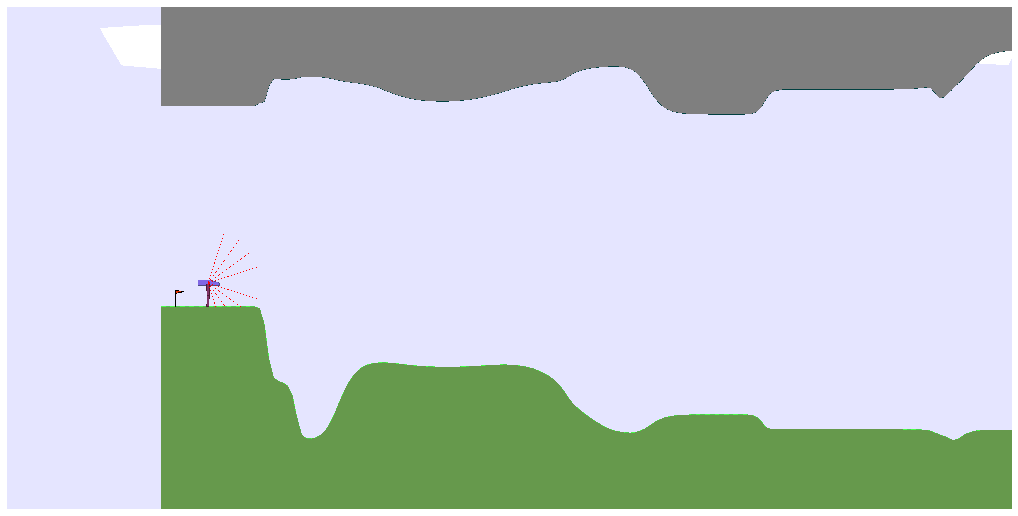

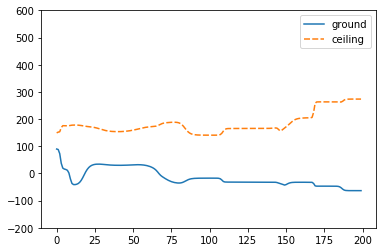

Sample nb 55
Sampled input :
[-0.20931537  0.93043195  0.11543127]
Sampled water level :
0.0


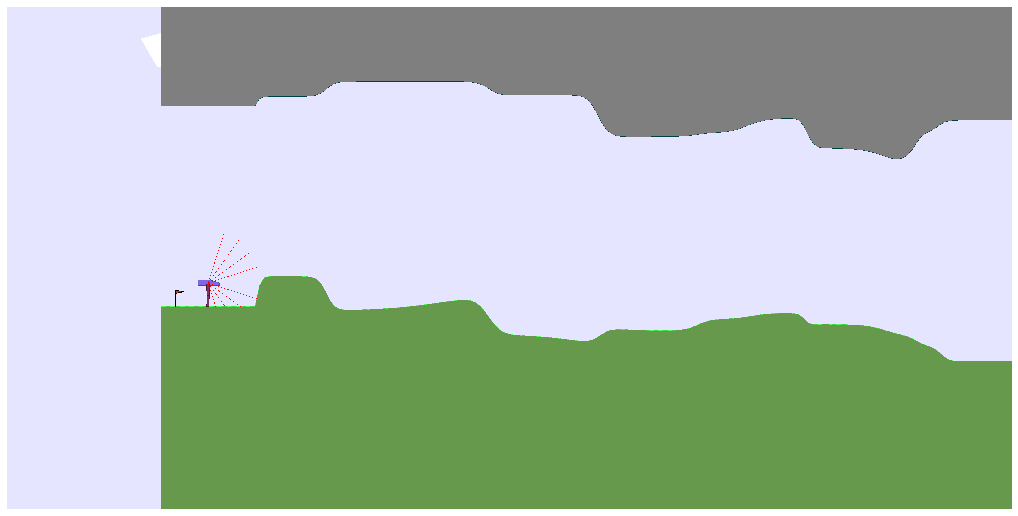

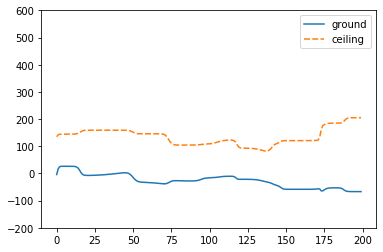

Sample nb 56
Sampled input :
[-0.20661401  0.80445395  0.00779483]
Sampled water level :
0.0


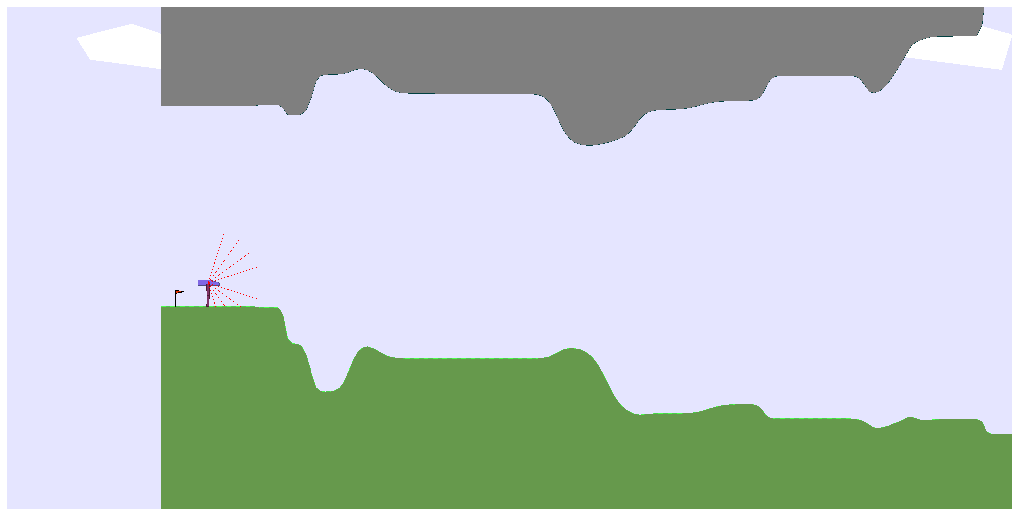

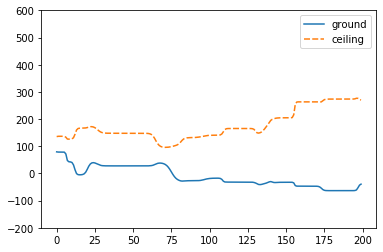

Sample nb 57
Sampled input :
[-0.07447798  0.90783144  0.10509866]
Sampled water level :
0.0


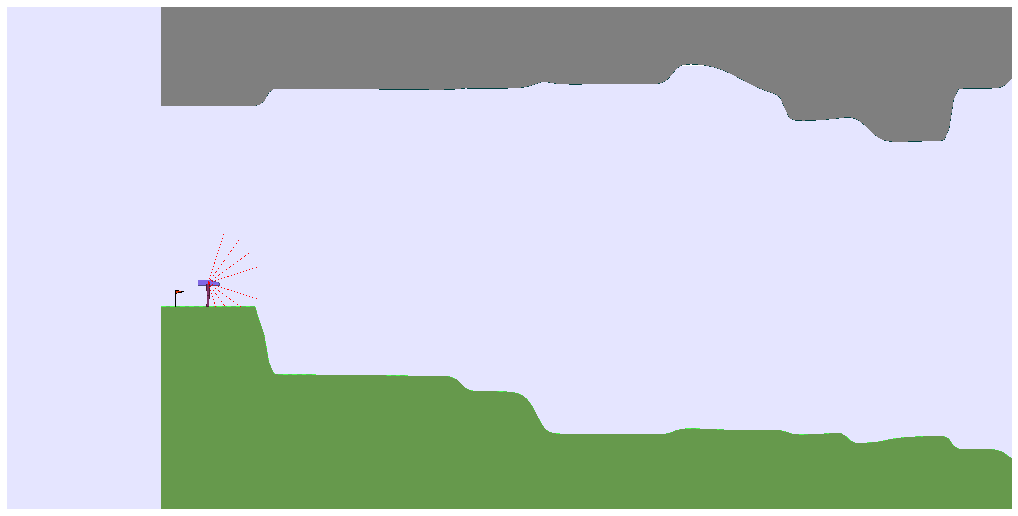

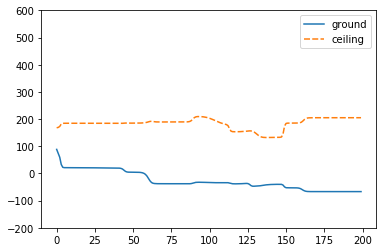

Sample nb 58
Sampled input :
[-0.1467162   0.97727047  0.08203888]
Sampled water level :
0.0


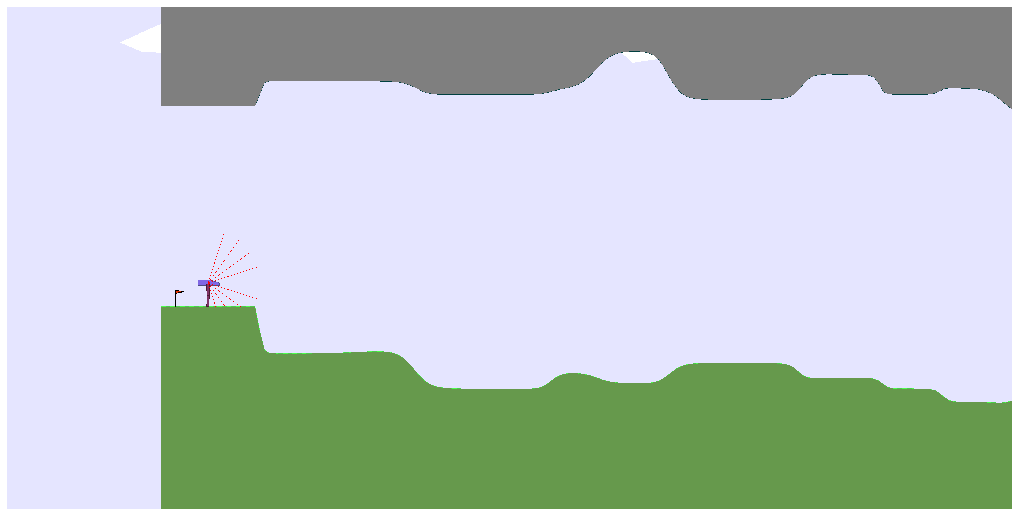

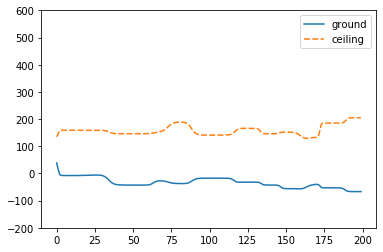

Sample nb 59
Sampled input :
[-0.0835566   0.9188362   0.03968334]
Sampled water level :
0.0


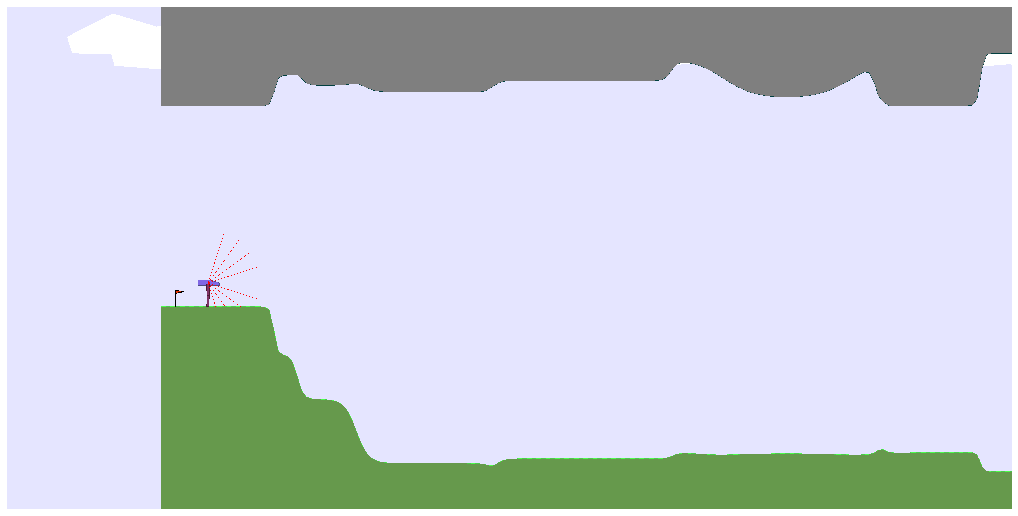

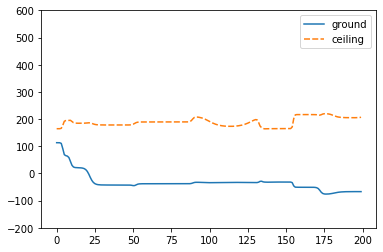

Sample nb 60
Sampled input :
[-0.24891374  0.81054927  0.11622998]
Sampled water level :
0.0


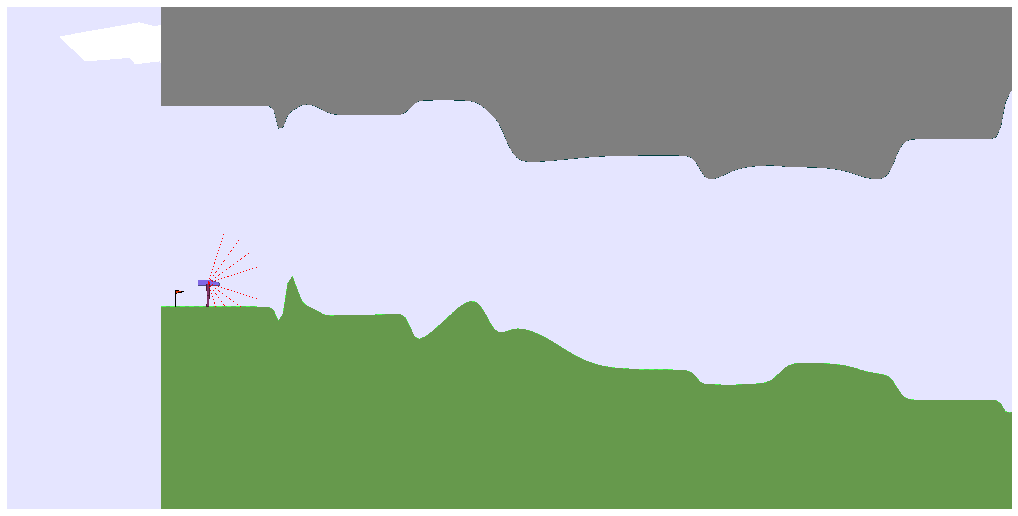

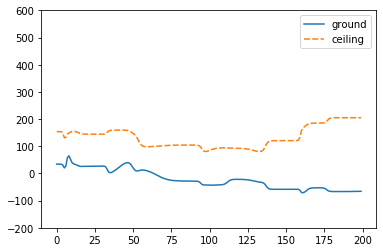

Sample nb 61
Sampled input :
[-0.19716561  0.80880265  0.17936417]
Sampled water level :
0.0


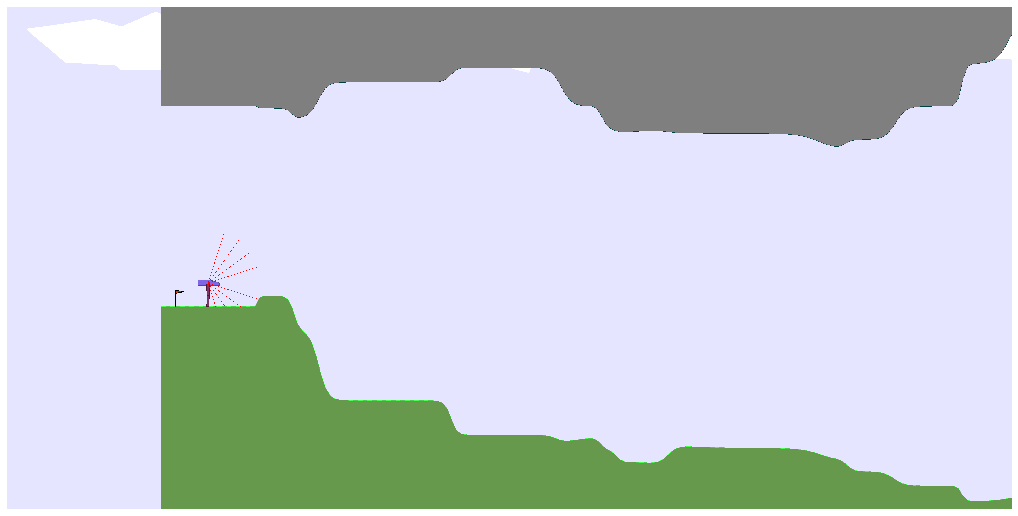

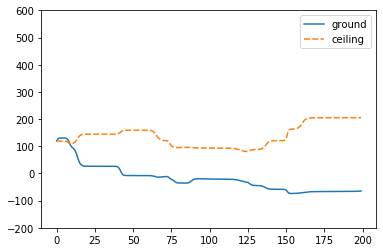

Sample nb 62
Sampled input :
[-0.24527956  0.91453088  0.14060216]
Sampled water level :
0.0


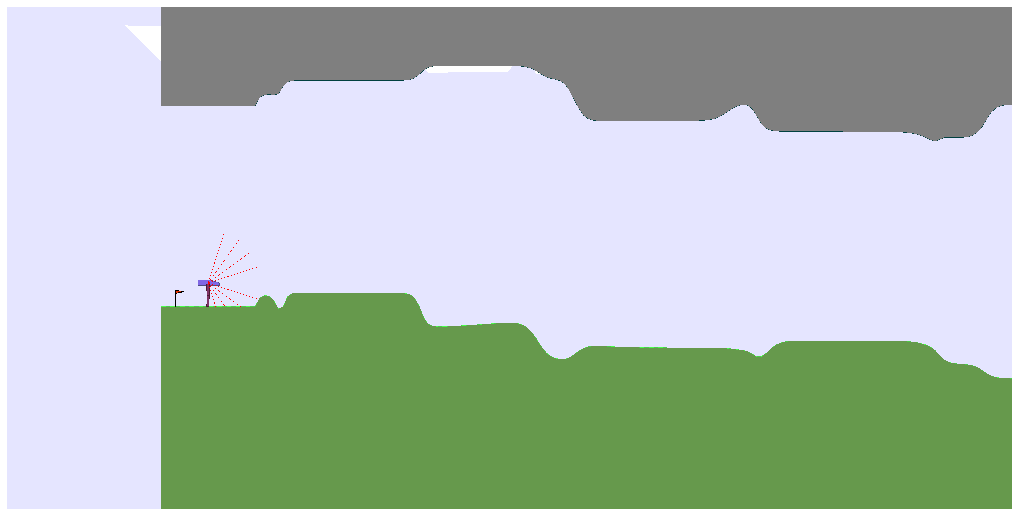

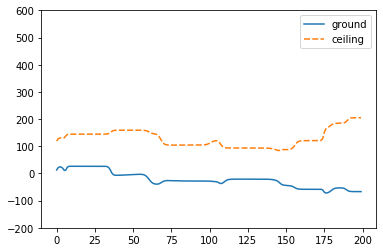

Sample nb 63
Sampled input :
[-0.16079357  0.88501383  0.0553386 ]
Sampled water level :
0.0


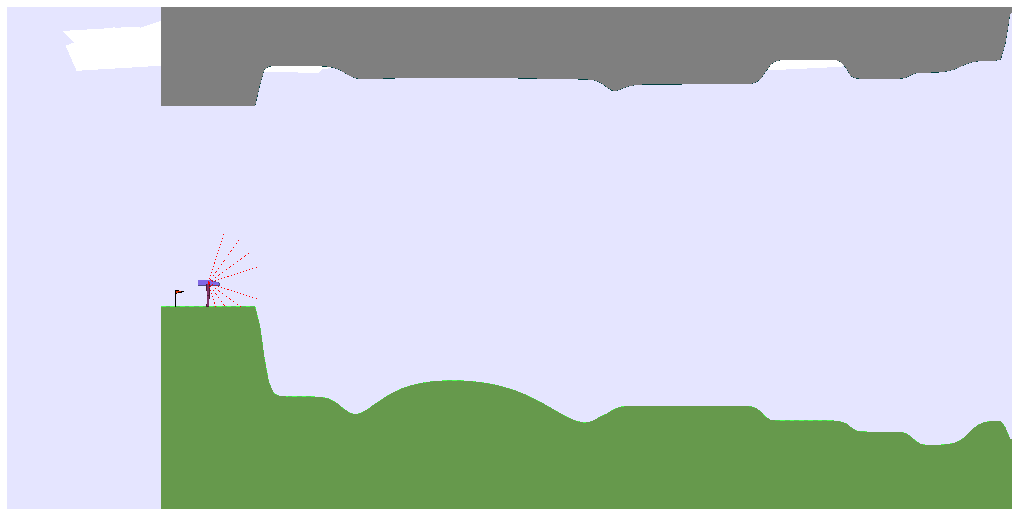

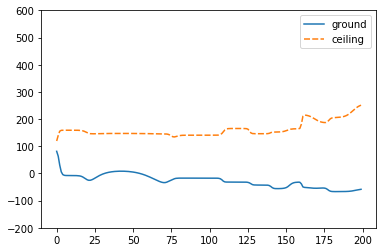

Sample nb 64
Sampled input :
[-0.09210842  0.99837965  0.18158154]
Sampled water level :
0.0


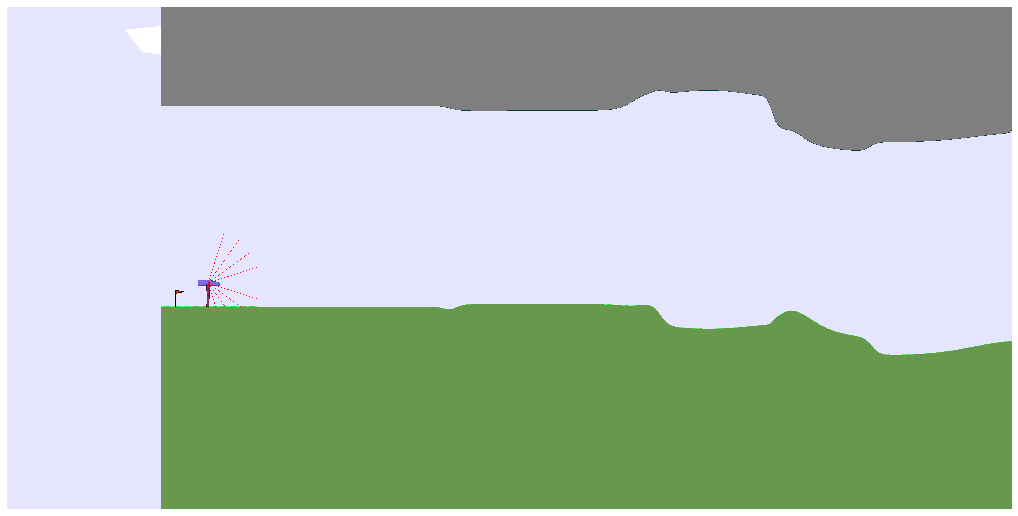

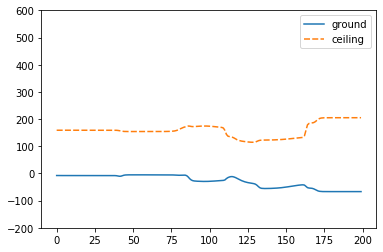

Sample nb 65
Sampled input :
[-0.16264712  0.92471308  0.06485757]
Sampled water level :
0.0


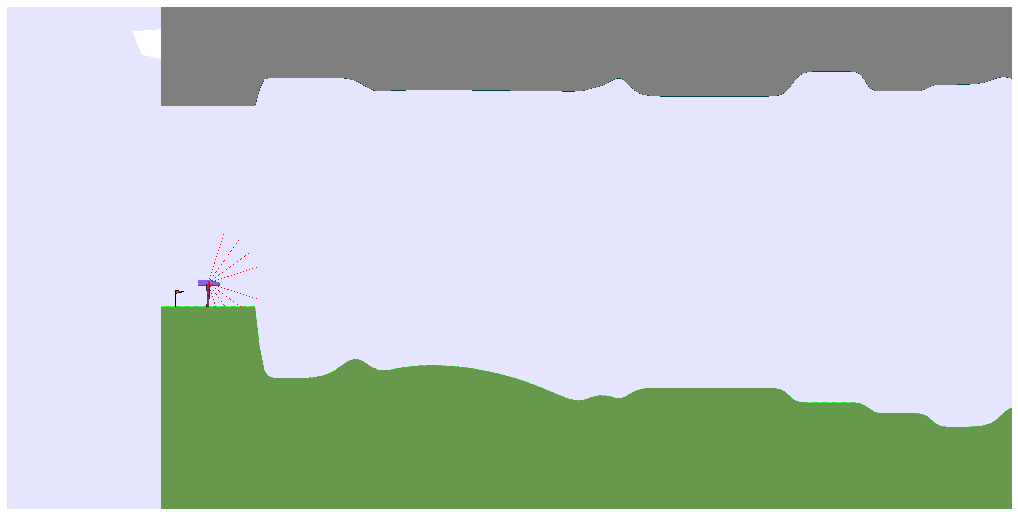

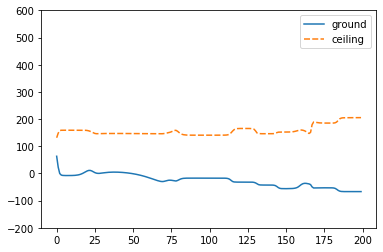

Sample nb 66
Sampled input :
[-0.21711657  0.91126032  0.10740898]
Sampled water level :
0.0


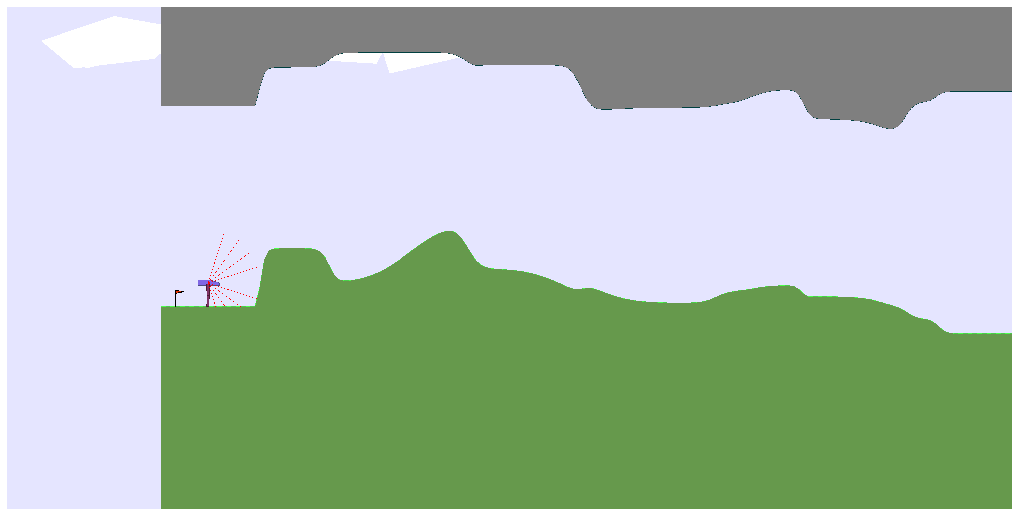

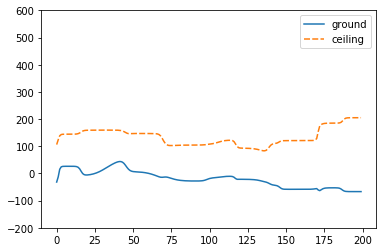

Sample nb 67
Sampled input :
[-0.14367849  0.9334942   0.05425291]
Sampled water level :
0.0


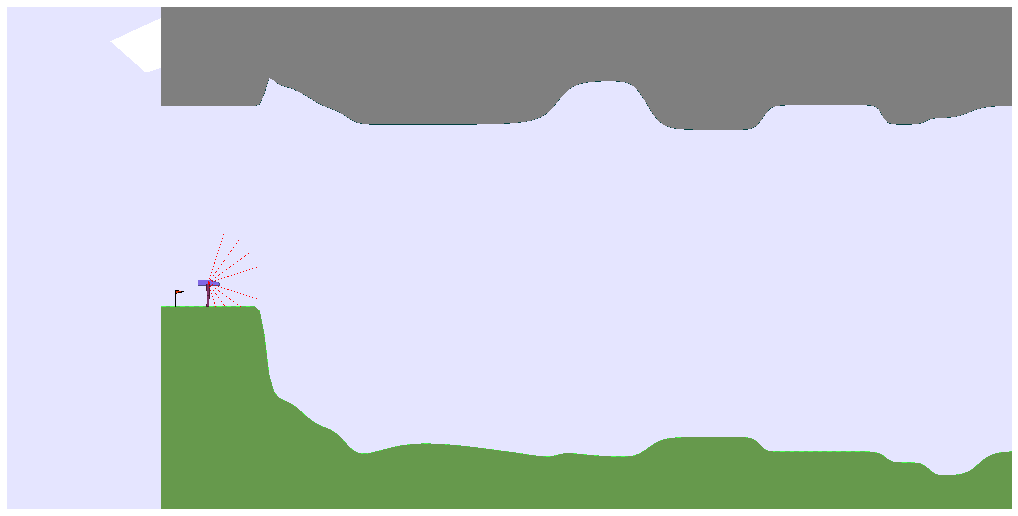

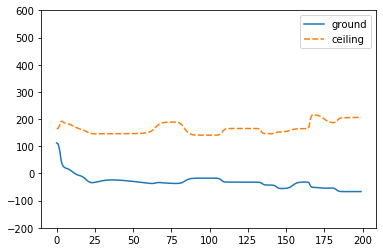

Sample nb 68
Sampled input :
[-0.23595424  0.88876973  0.03976248]
Sampled water level :
0.0


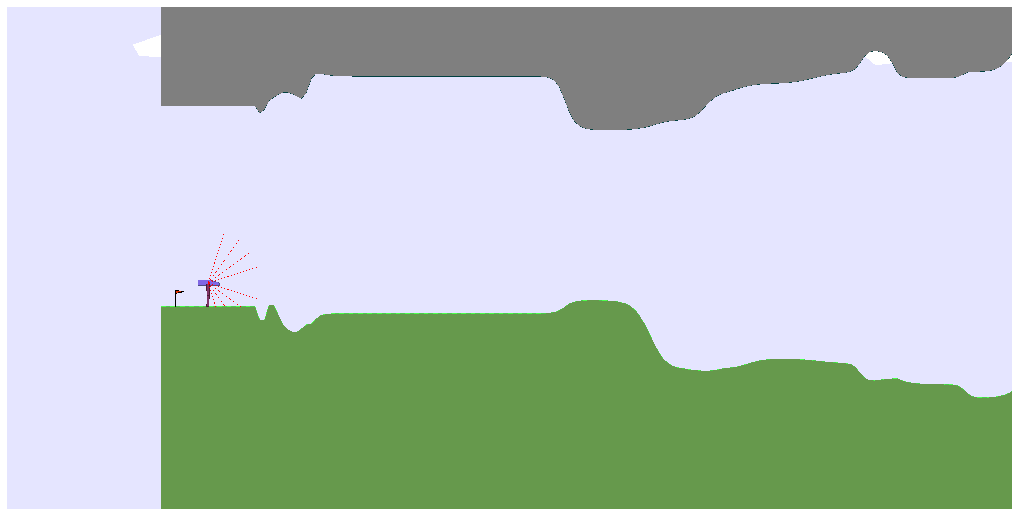

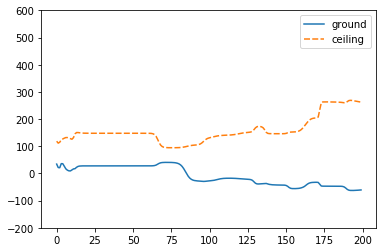

Sample nb 69
Sampled input :
[-0.0913371   0.82809613  0.17863207]
Sampled water level :
0.0


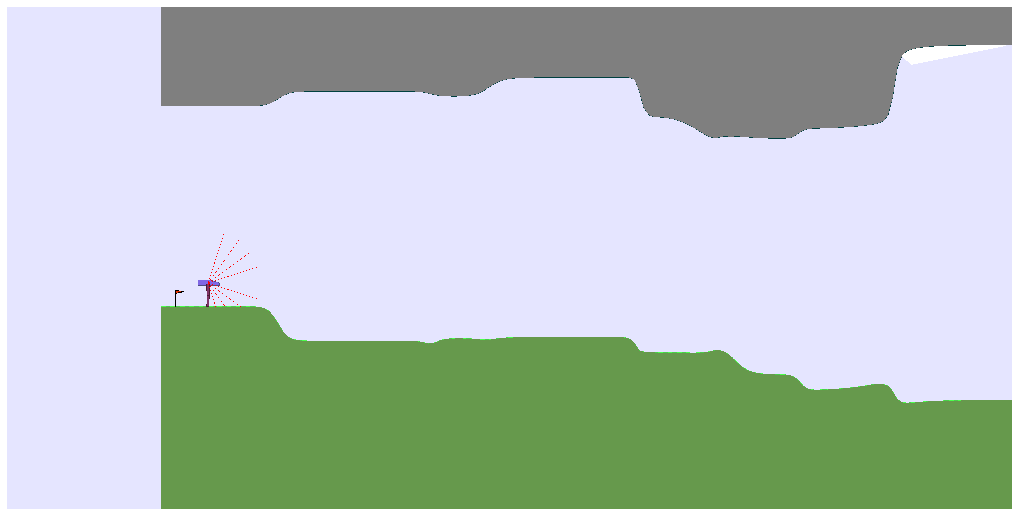

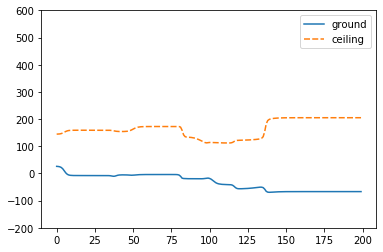

Sample nb 70
Sampled input :
[-0.08781953  0.97536606  0.00177318]
Sampled water level :
0.0


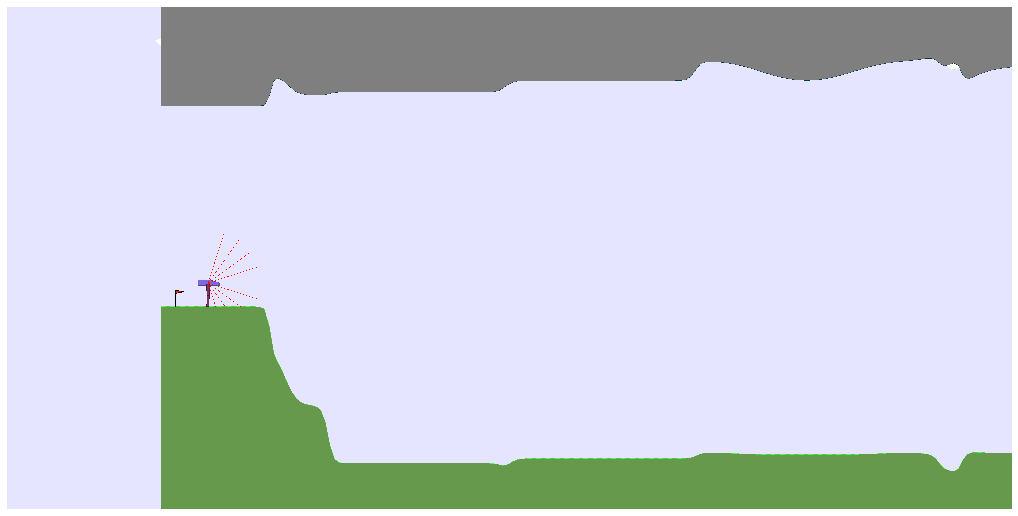

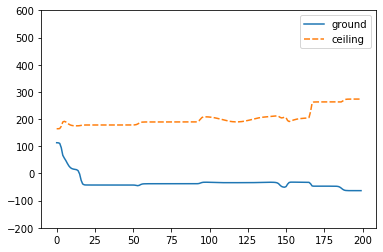

Sample nb 71
Sampled input :
[-0.08803728  0.98559261  0.11661411]
Sampled water level :
0.0


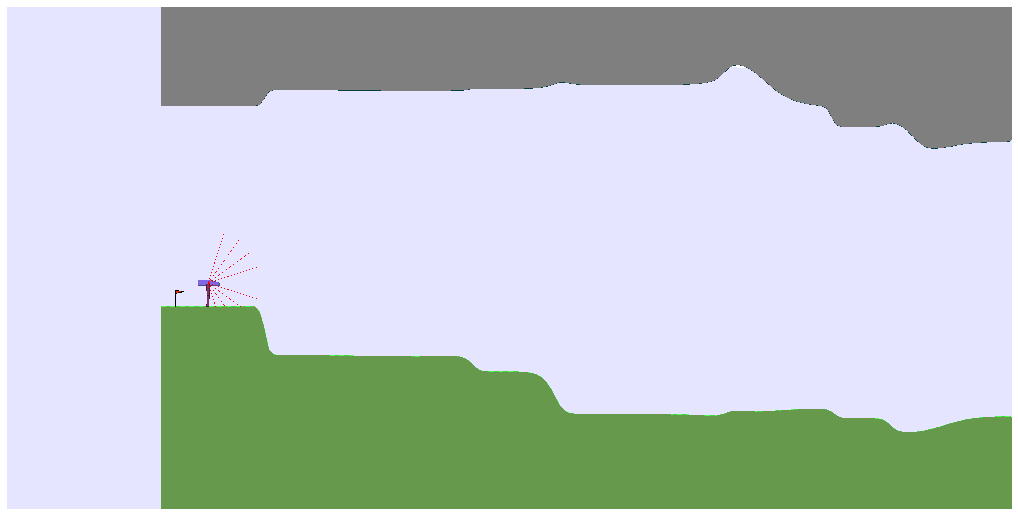

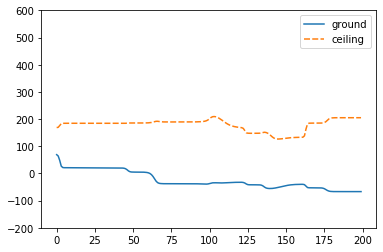

Sample nb 72
Sampled input :
[-0.1490642   0.9157392   0.04713073]
Sampled water level :
0.0


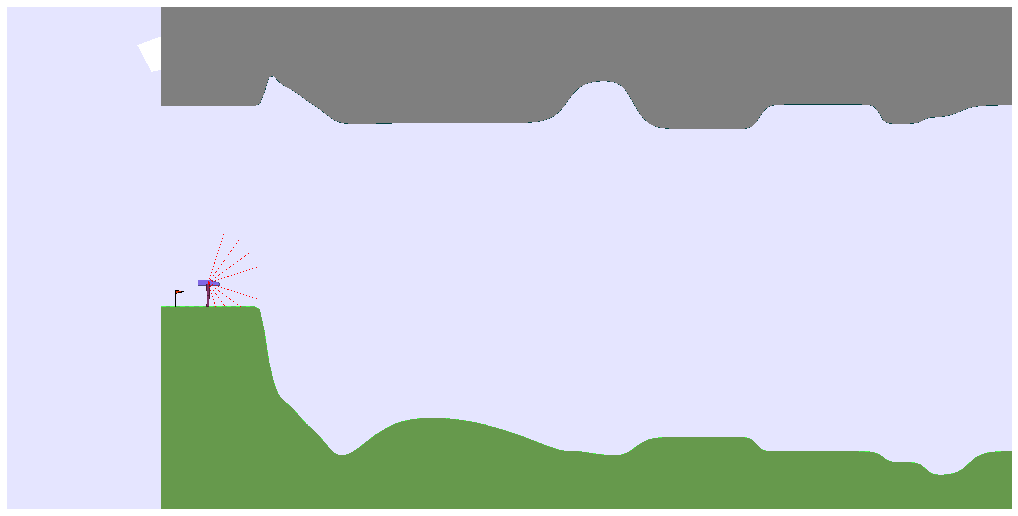

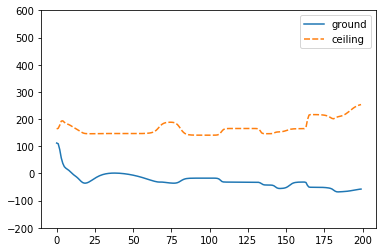

Sample nb 73
Sampled input :
[-0.11998019  0.85648817  0.08770066]
Sampled water level :
0.0


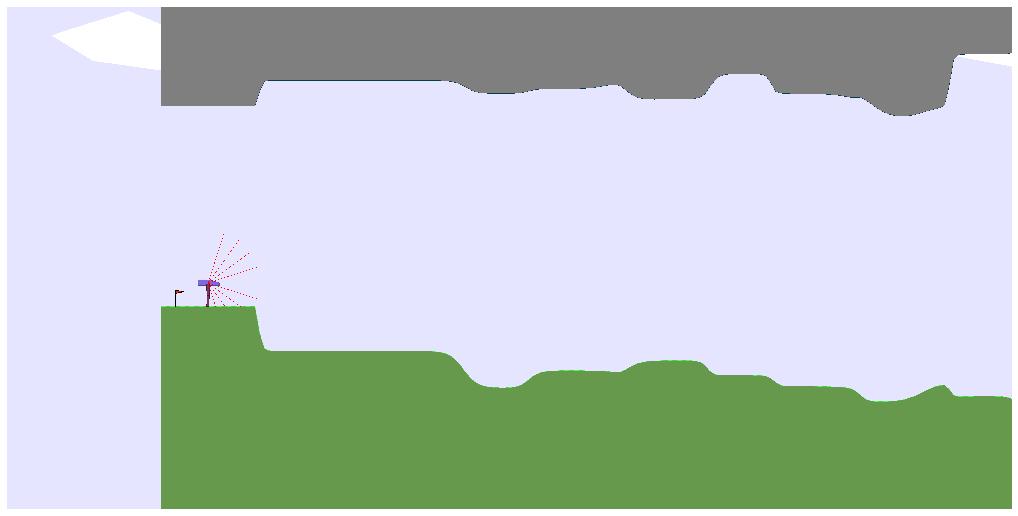

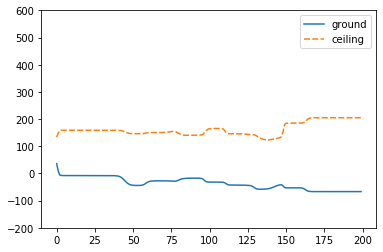

Sample nb 74
Sampled input :
[-0.22862194  0.88012505  0.15896558]
Sampled water level :
0.0


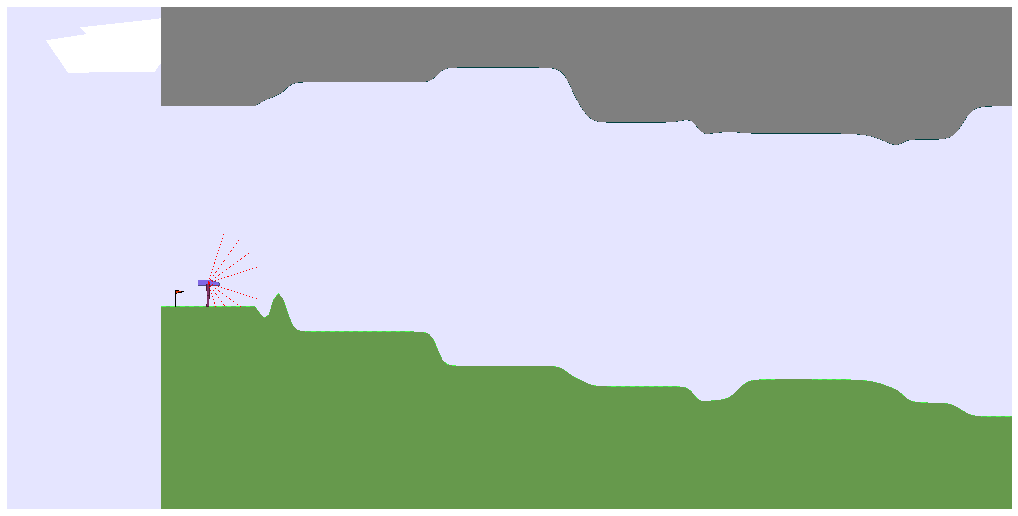

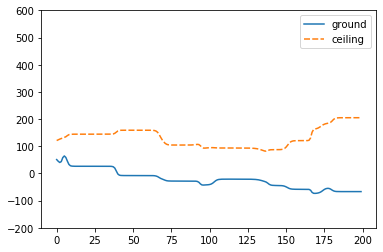

Sample nb 75
Sampled input :
[-0.13928211  0.87017988  0.10570481]
Sampled water level :
0.0


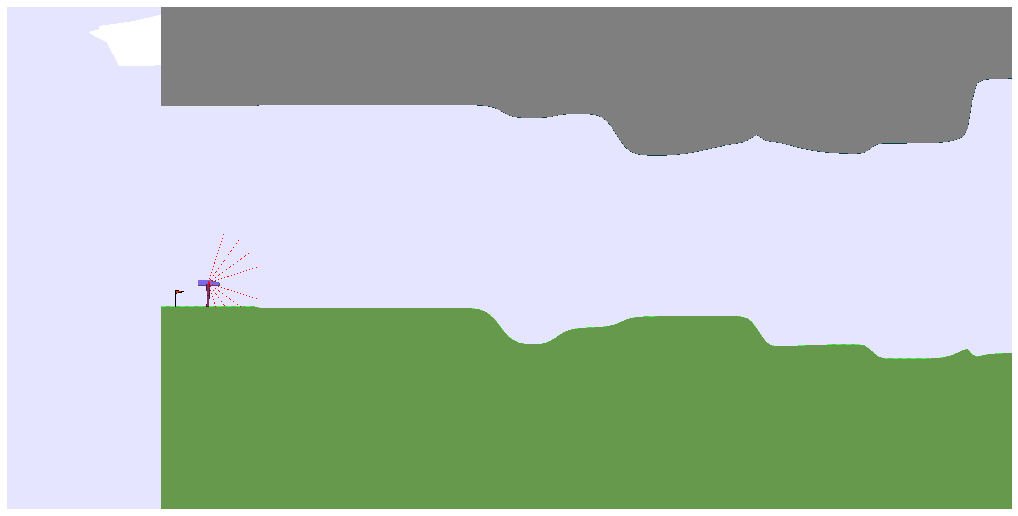

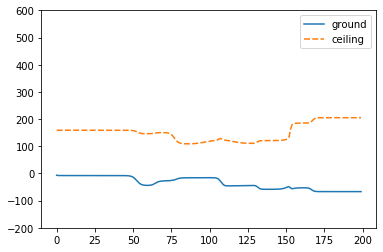

Sample nb 76
Sampled input :
[-0.23467819  0.97894482  0.19671501]
Sampled water level :
0.0


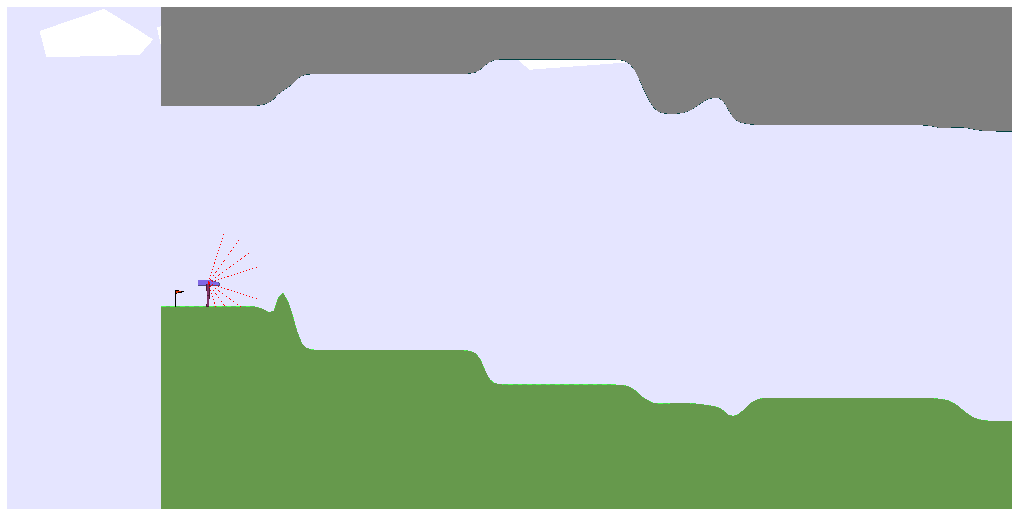

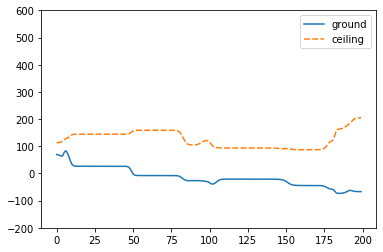

Sample nb 77
Sampled input :
[-0.10895593  0.88428262  0.15265987]
Sampled water level :
0.0


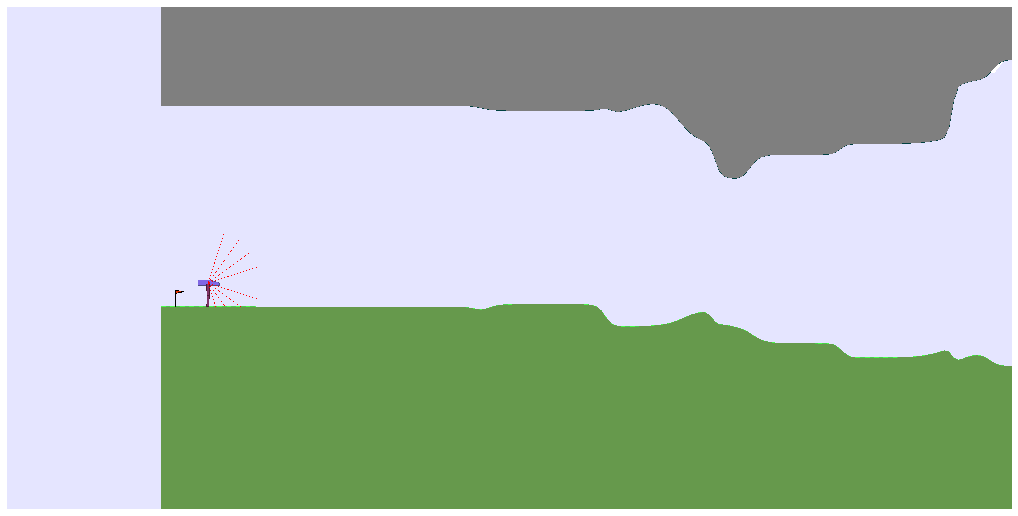

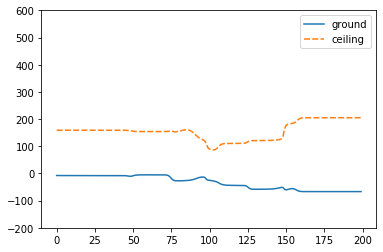

Sample nb 78
Sampled input :
[-0.18840416  0.80868473  0.19907126]
Sampled water level :
0.0


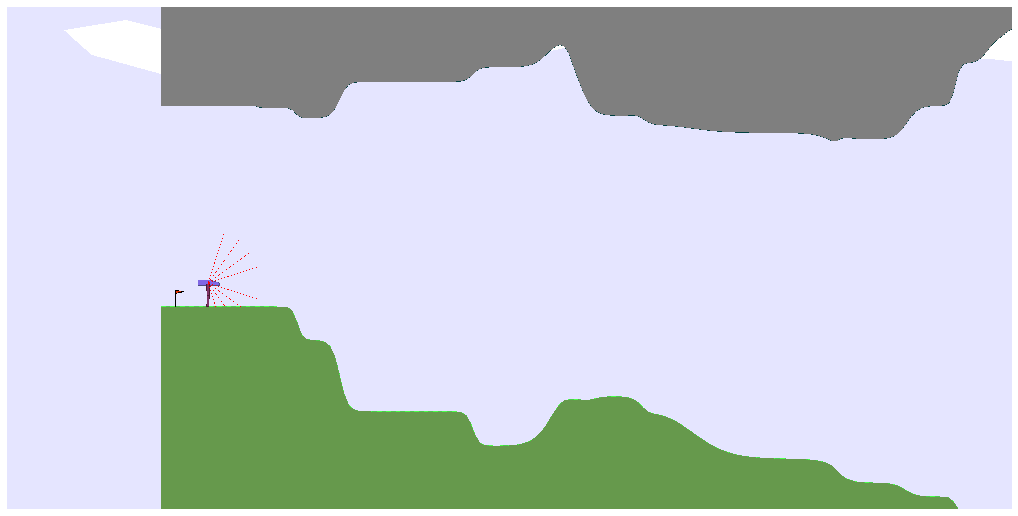

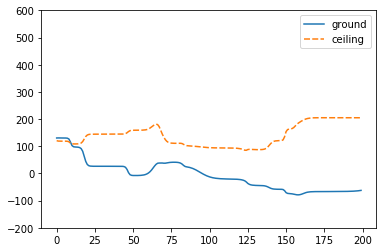

Sample nb 79
Sampled input :
[-0.10552287  0.93024924  0.01309834]
Sampled water level :
0.0


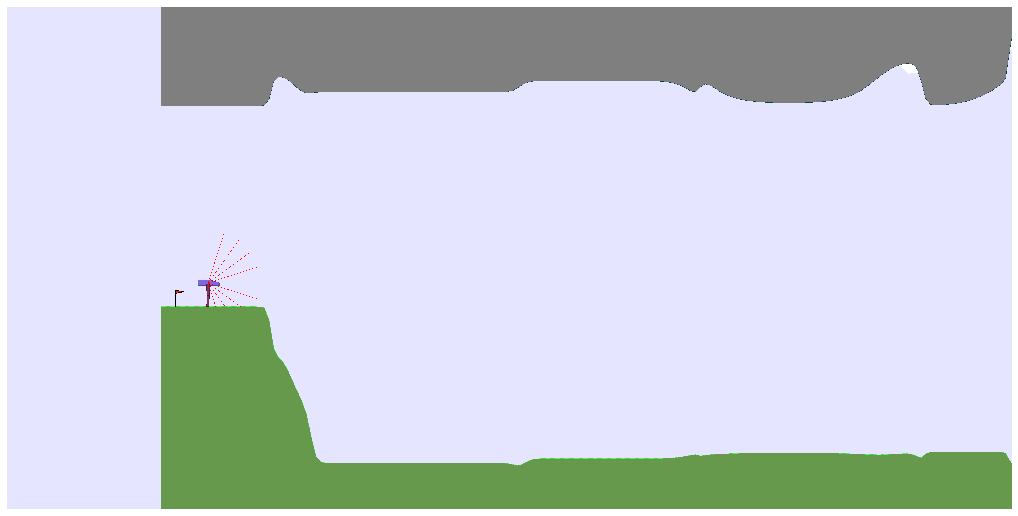

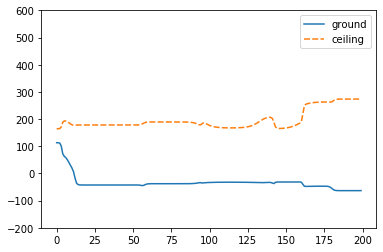

Sample nb 80
Sampled input :
[-0.15202716  0.96118862  0.19582356]
Sampled water level :
0.0


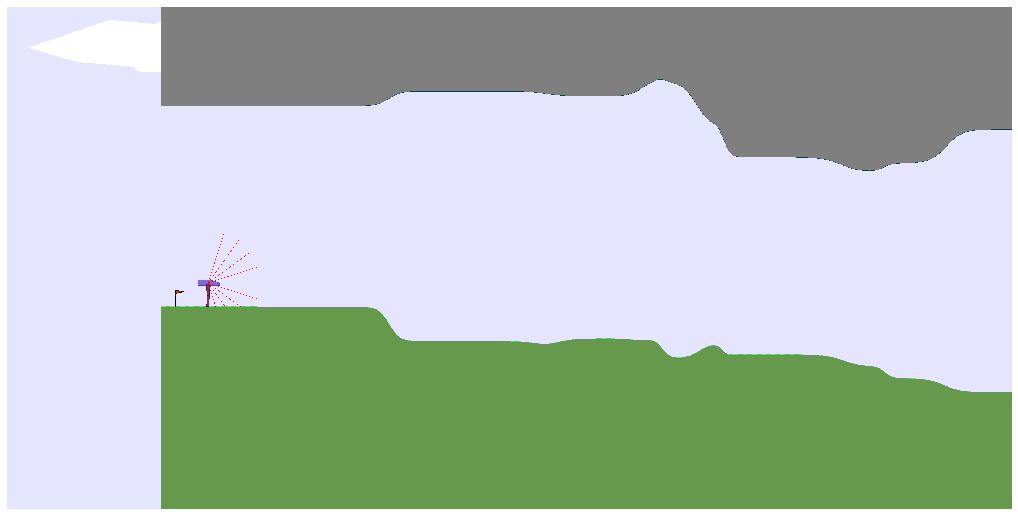

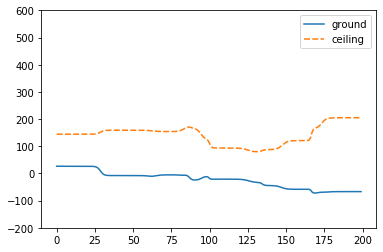

Sample nb 81
Sampled input :
[-0.23132209  0.86998502  0.18858209]
Sampled water level :
0.0


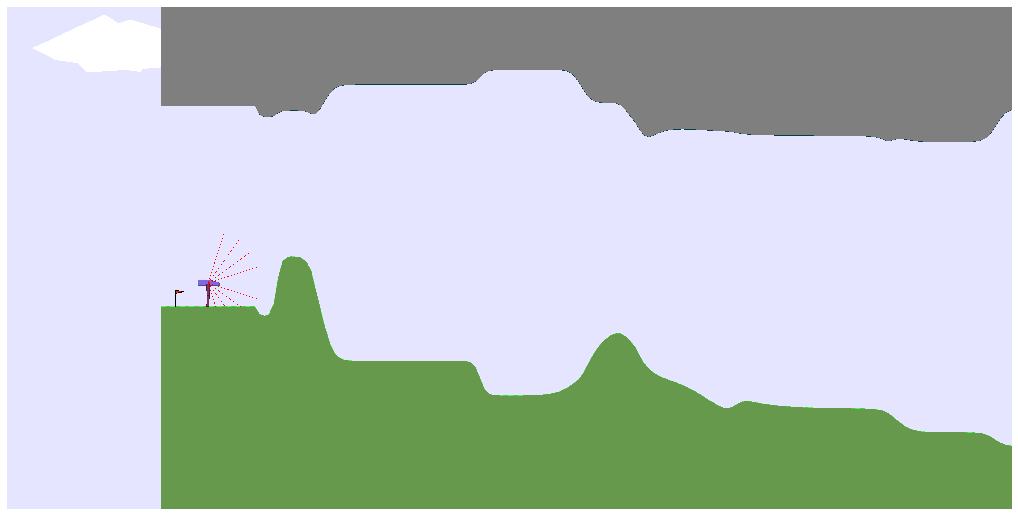

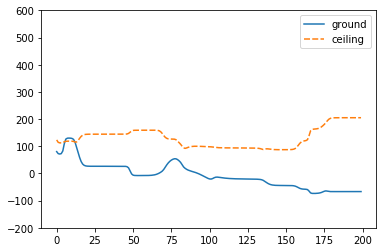

Sample nb 82
Sampled input :
[-0.16331059  0.99228507  0.15096502]
Sampled water level :
0.0


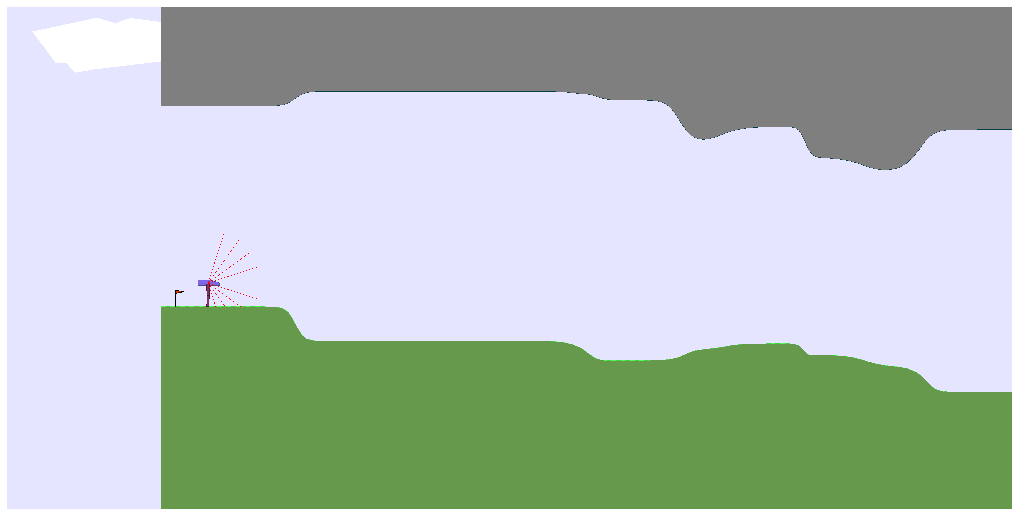

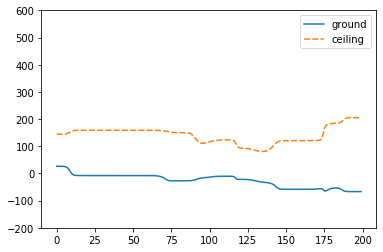

Sample nb 83
Sampled input :
[-0.2212842   0.93110266  0.19594808]
Sampled water level :
0.0


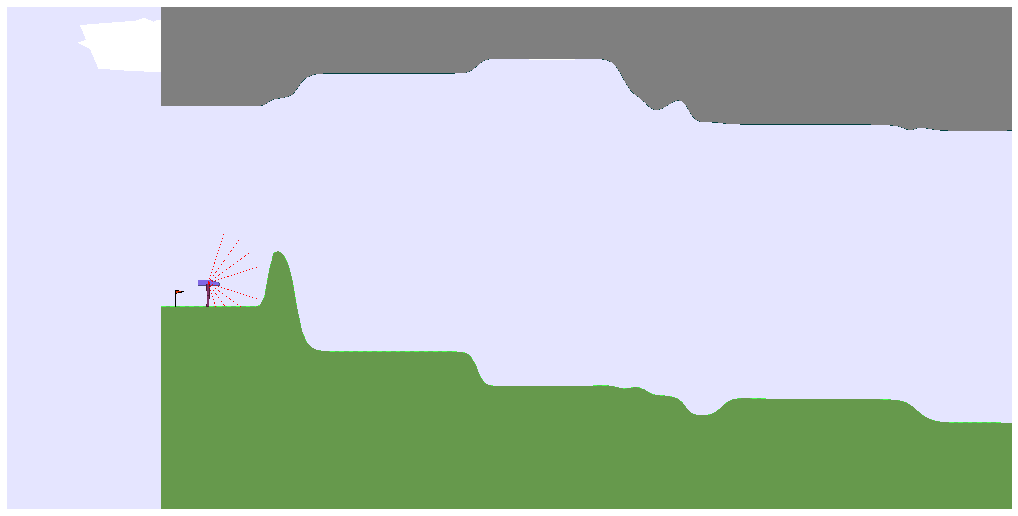

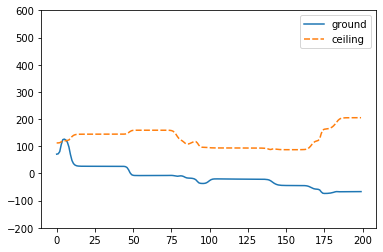

Sample nb 84
Sampled input :
[-0.1067979   0.95394815  0.03258318]
Sampled water level :
0.0


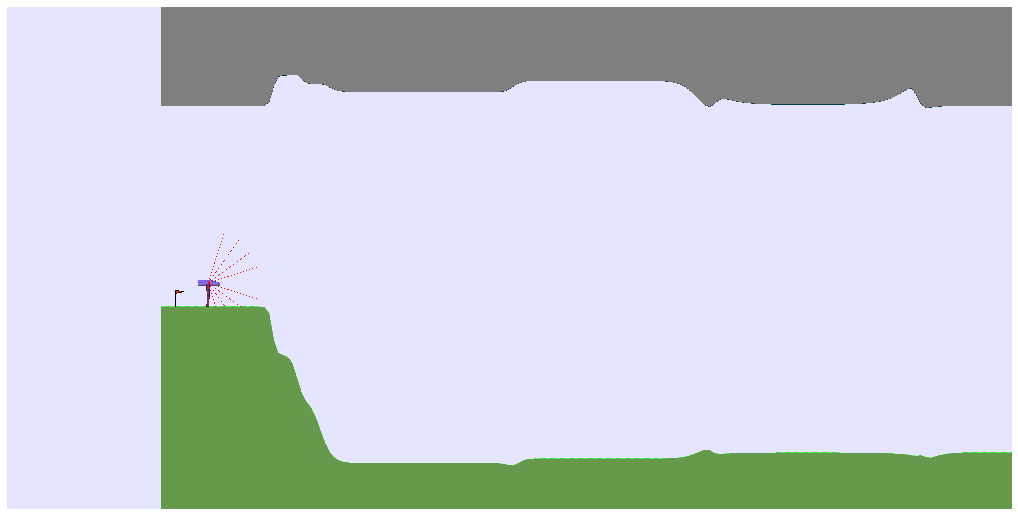

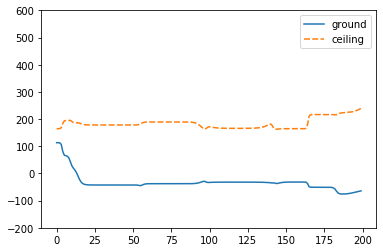

Sample nb 85
Sampled input :
[-0.1277685   0.8378713   0.01079403]
Sampled water level :
0.0


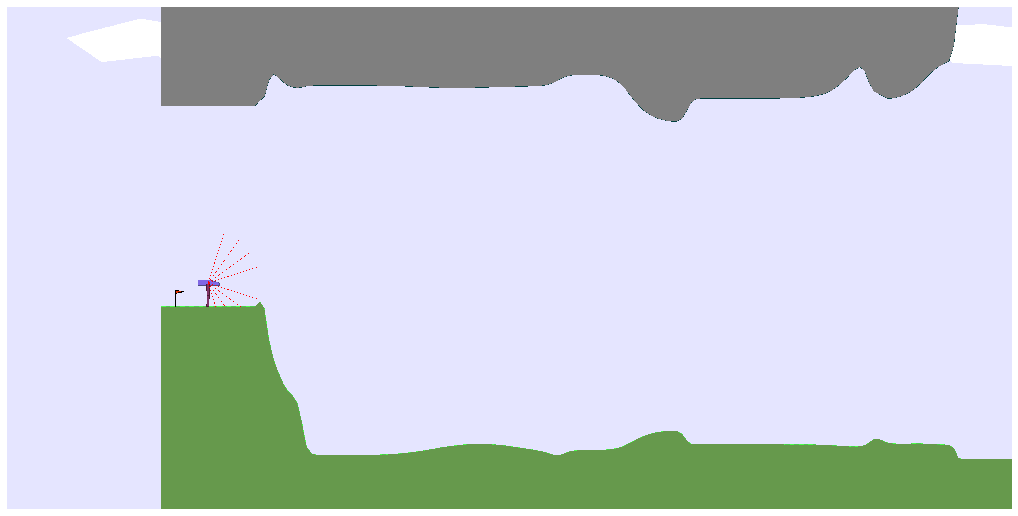

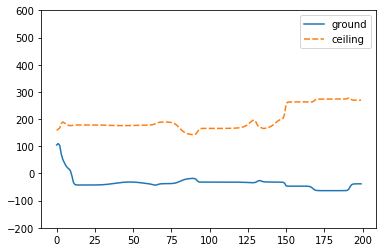

Sample nb 86
Sampled input :
[-0.07247647  0.80825234  0.05763652]
Sampled water level :
0.0


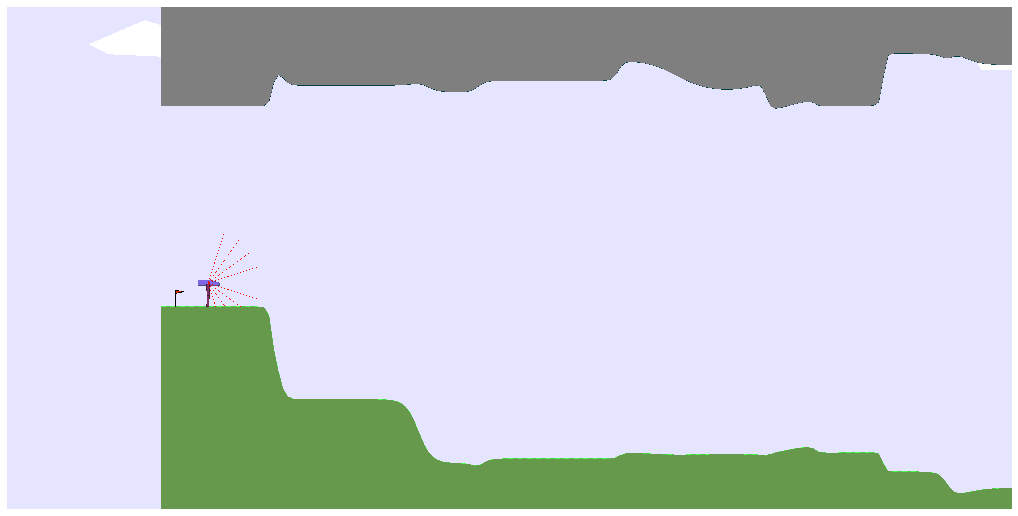

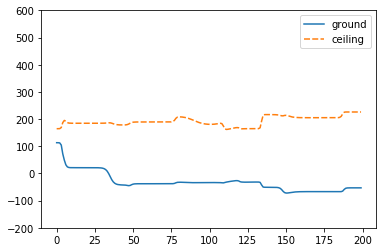

Sample nb 87
Sampled input :
[-0.11383161  0.8504044   0.09897099]
Sampled water level :
0.0


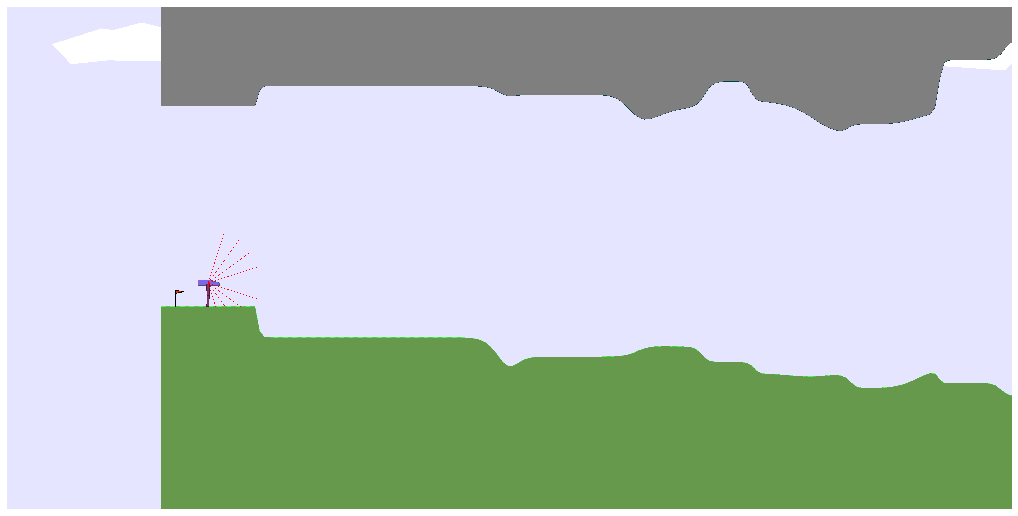

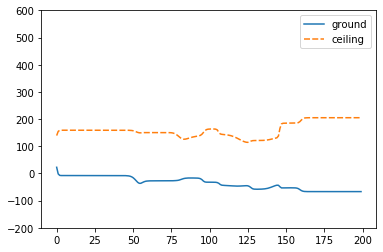

Sample nb 88
Sampled input :
[-0.07368802  0.94429493  0.03950445]
Sampled water level :
0.0


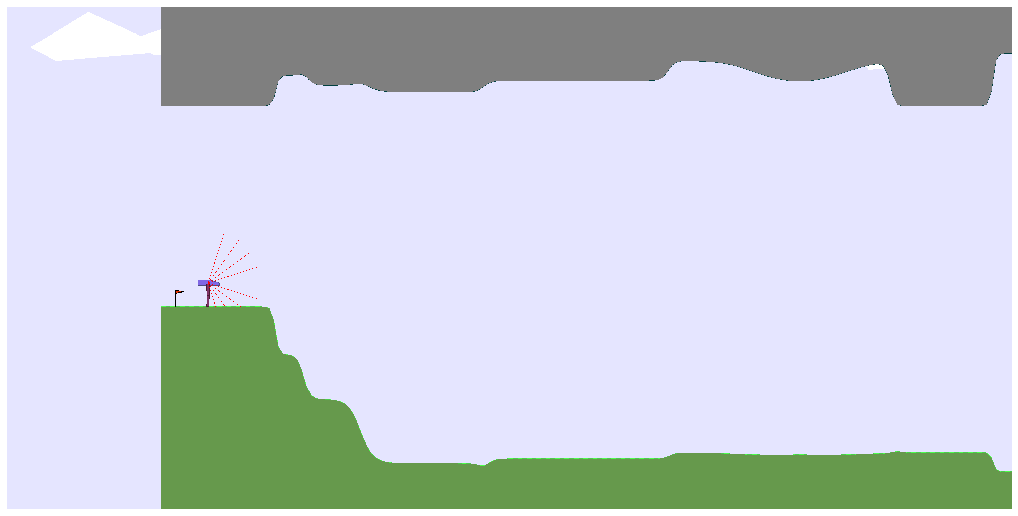

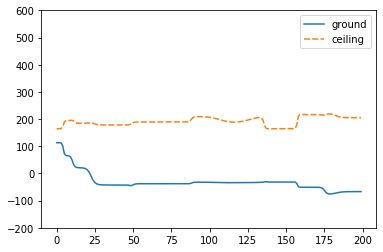

Sample nb 89
Sampled input :
[-0.22298128  0.85956628  0.07279   ]
Sampled water level :
0.0


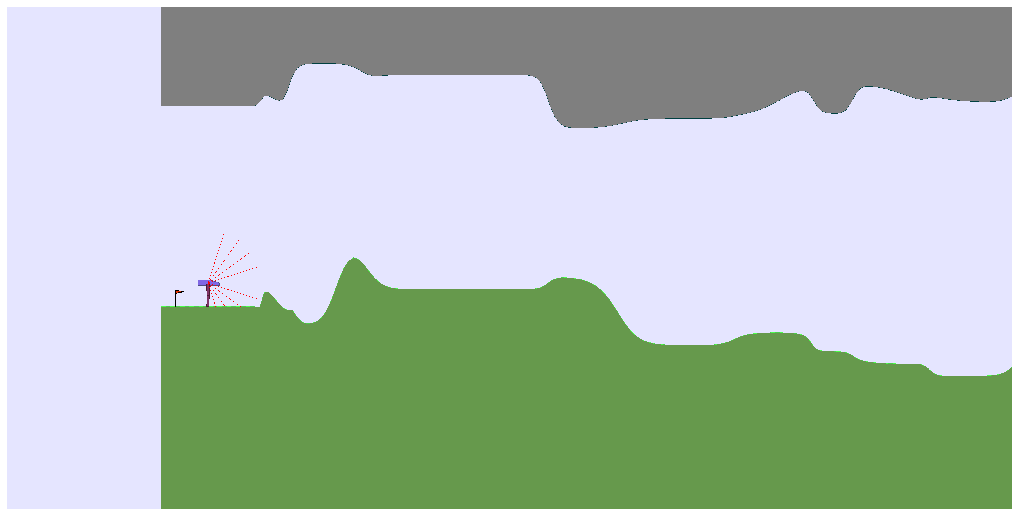

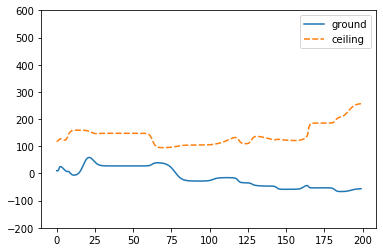

Sample nb 90
Sampled input :
[-0.06295432  0.81009054  0.16179744]
Sampled water level :
0.0


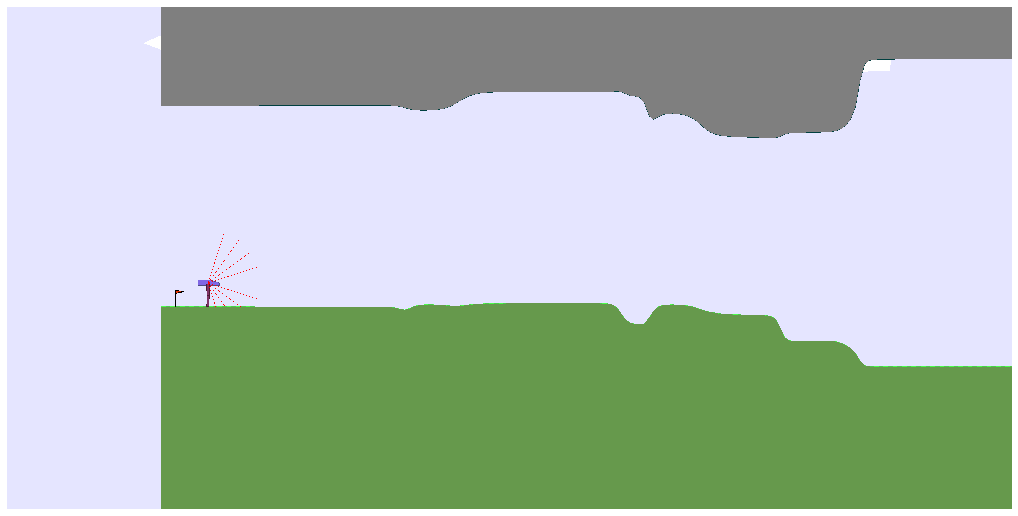

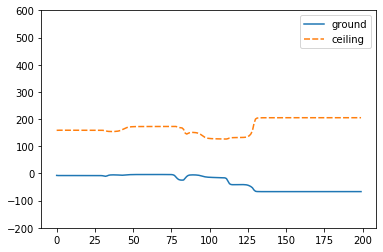

Sample nb 91
Sampled input :
[-0.08620416  0.85244591  0.00357952]
Sampled water level :
0.0


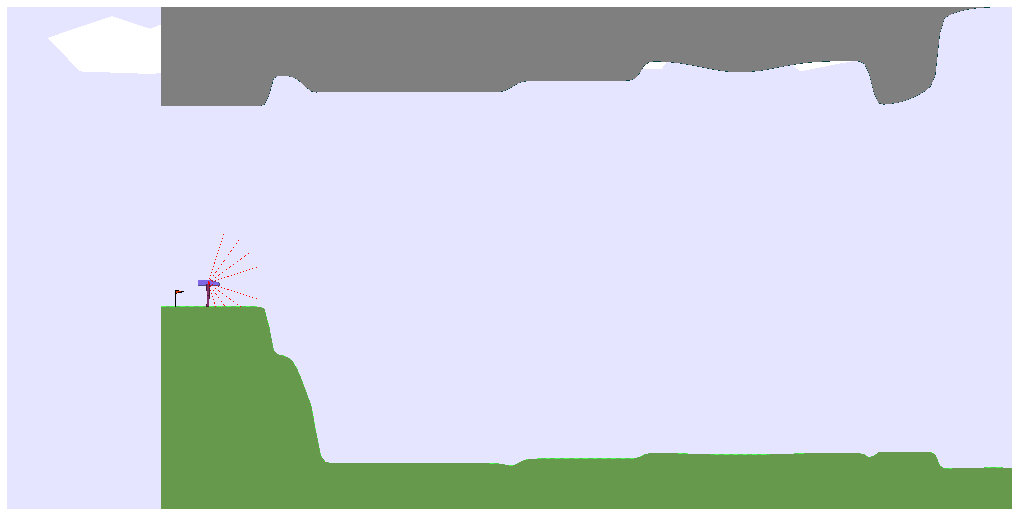

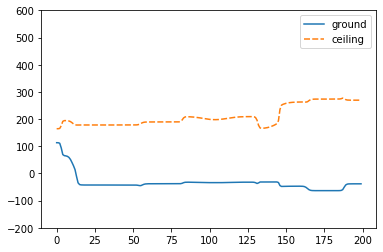

Sample nb 92
Sampled input :
[-0.23392749  0.83386182  0.03477002]
Sampled water level :
0.0


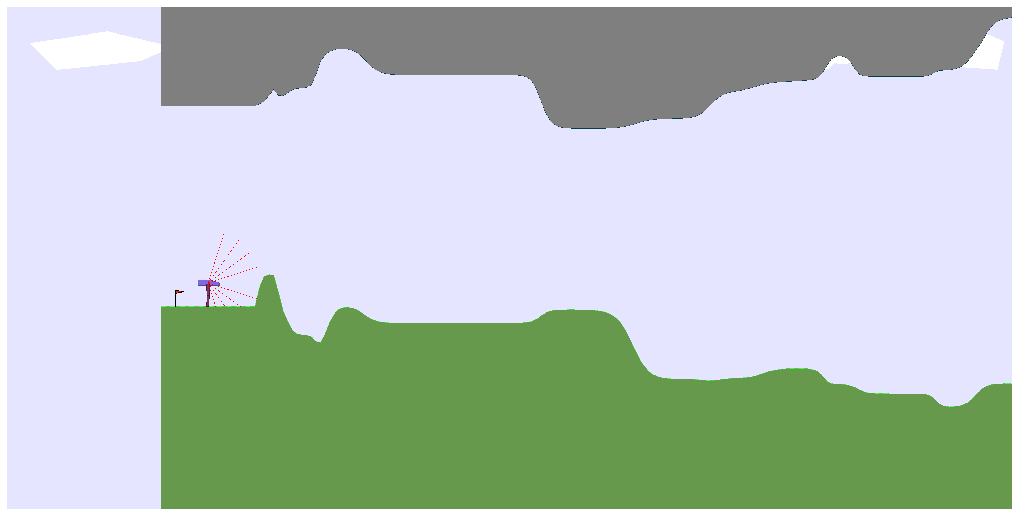

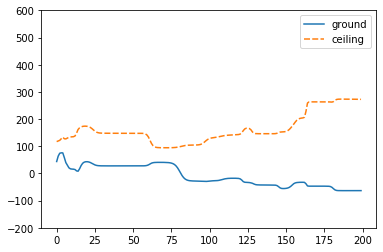

Sample nb 93
Sampled input :
[-0.11600591  0.80634899  0.11276943]
Sampled water level :
0.0


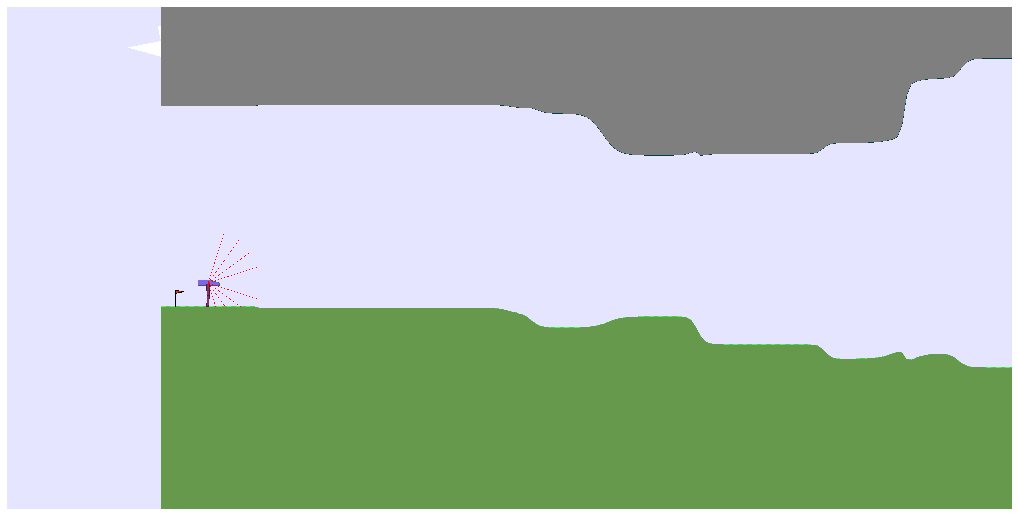

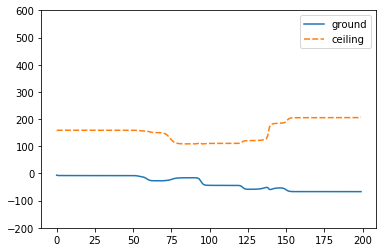

Sample nb 94
Sampled input :
[-0.13533991  0.88604434  0.02996501]
Sampled water level :
0.0


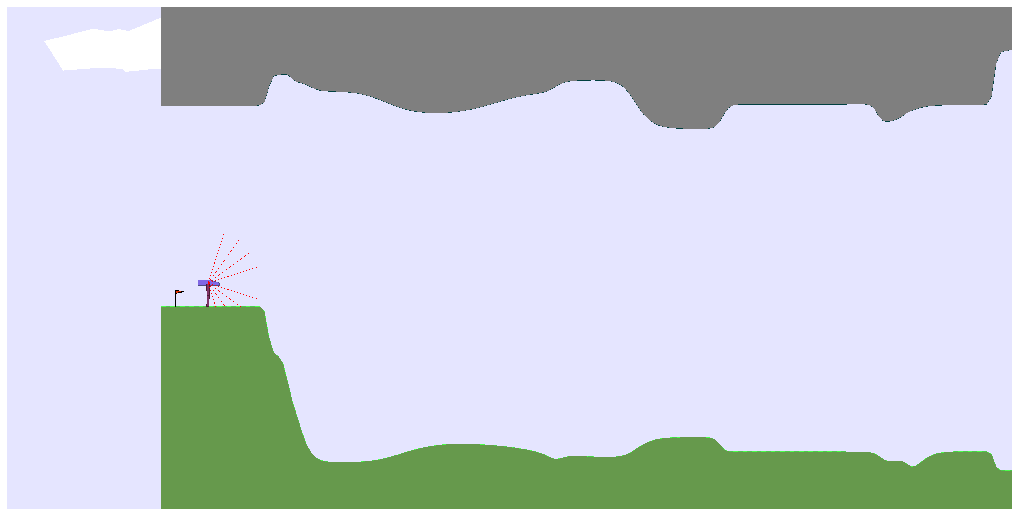

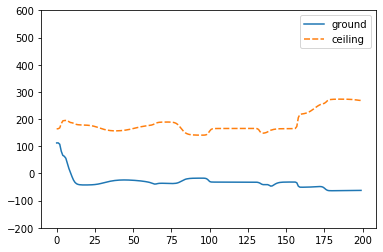

Sample nb 95
Sampled input :
[-0.17258964  0.86015102  0.02321455]
Sampled water level :
0.0


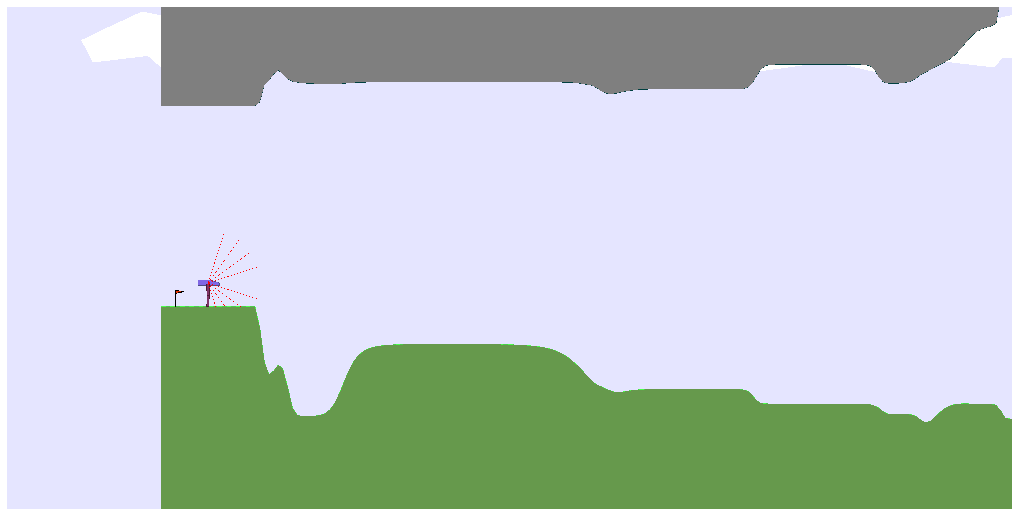

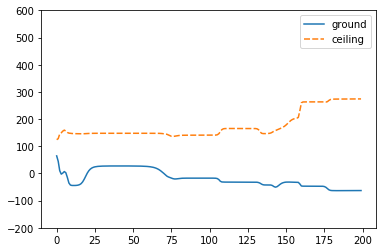

Sample nb 96
Sampled input :
[-0.21605693  0.86920325  0.03785081]
Sampled water level :
0.0


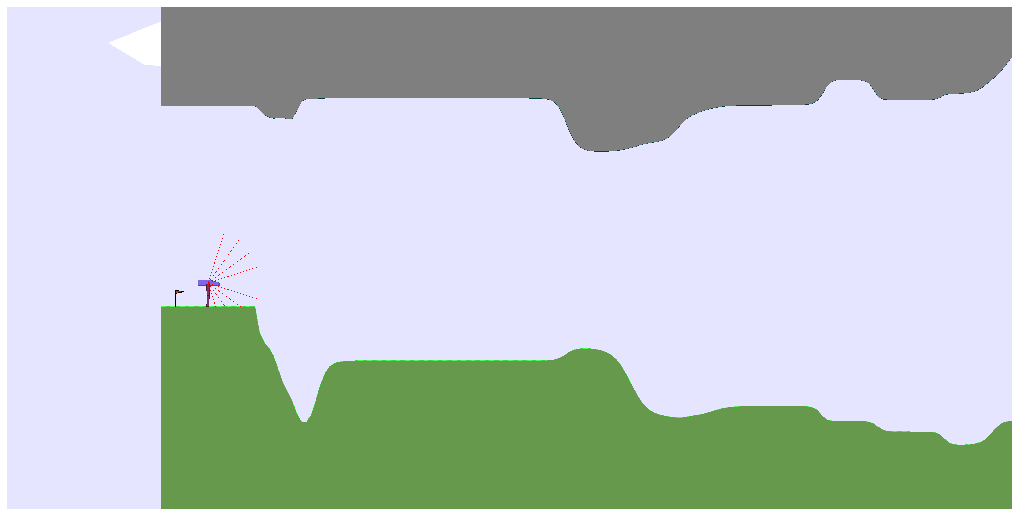

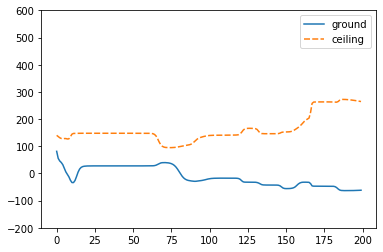

Sample nb 97
Sampled input :
[-0.08508856  0.95153019  0.08389402]
Sampled water level :
0.0


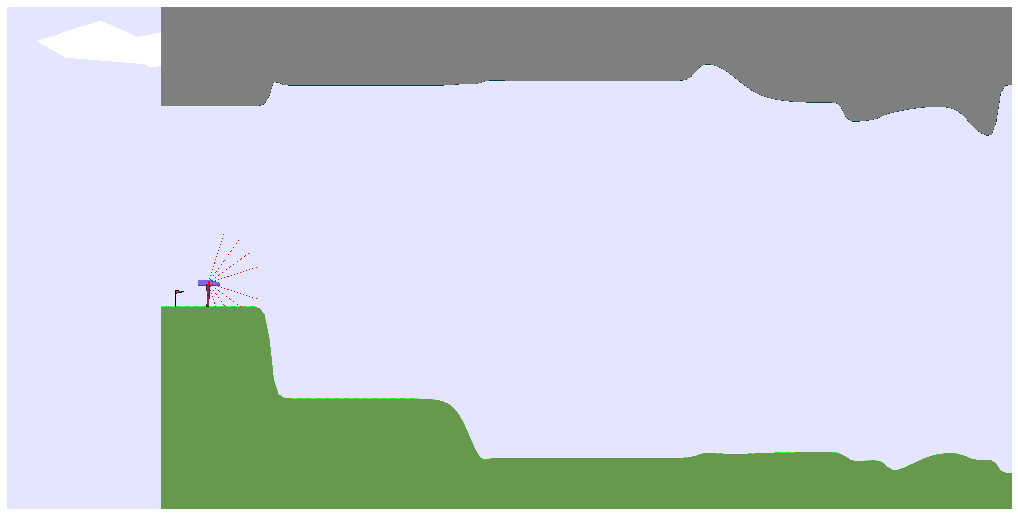

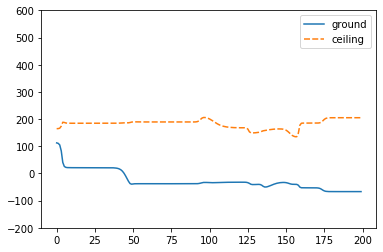

Sample nb 98
Sampled input :
[-0.13617795  0.97963117  0.14827341]
Sampled water level :
0.0


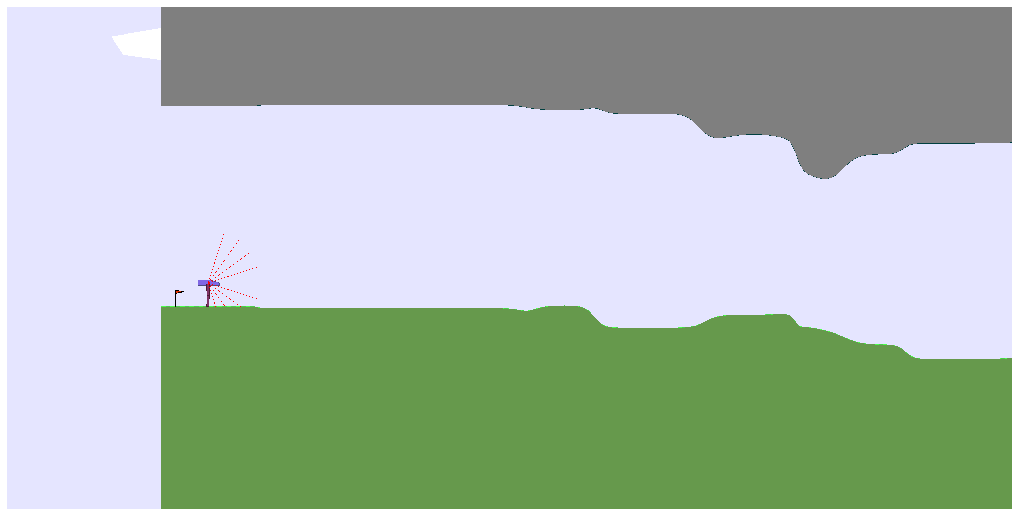

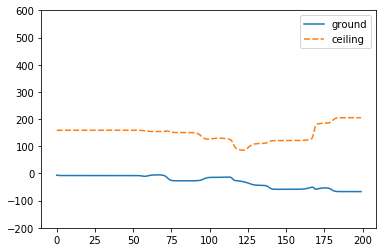

Sample nb 99
Sampled input :
[-0.17505848  0.83526537  0.03413702]
Sampled water level :
0.0


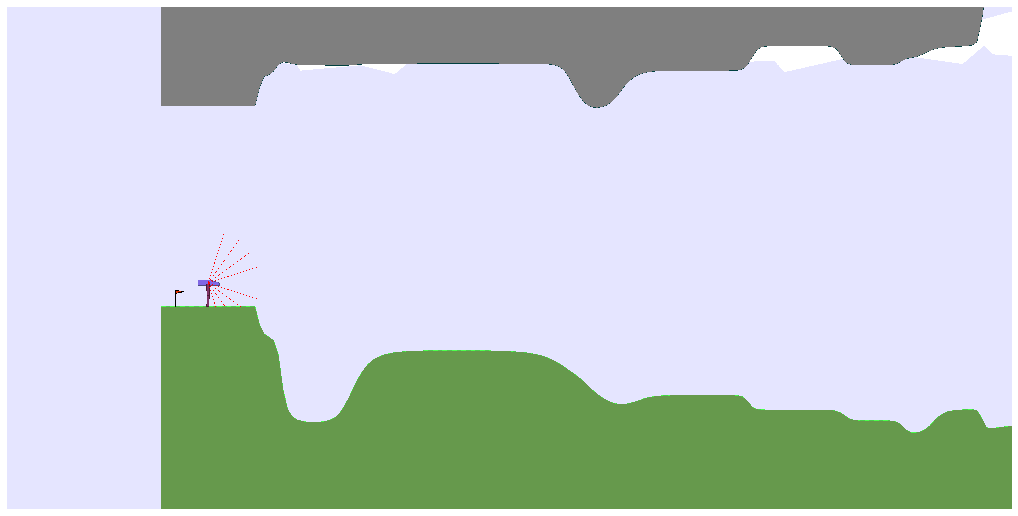

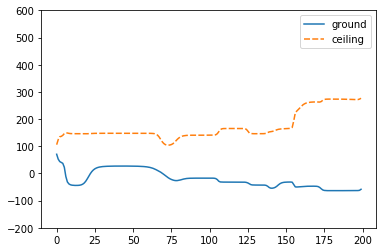

In [10]:
perform_experiment(env, input_sampler, 
                   {"size": 3, "min": [-0.25, 0.8, 0.0], "max": [-0.05, 1.0, 0.2]},
                   {"size": 1, "min": 0.0, "max": 0.0},
                    nb_of_samples = 100)